<a href="https://colab.research.google.com/github/Marc86316/DataCamp/blob/main/Courses/Sampling_in_Python/Sampling_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this chapter, you’ll discover how to quantify the accuracy of sample statistics using relative errors, and measure variation in your estimates by generating sampling distributions.


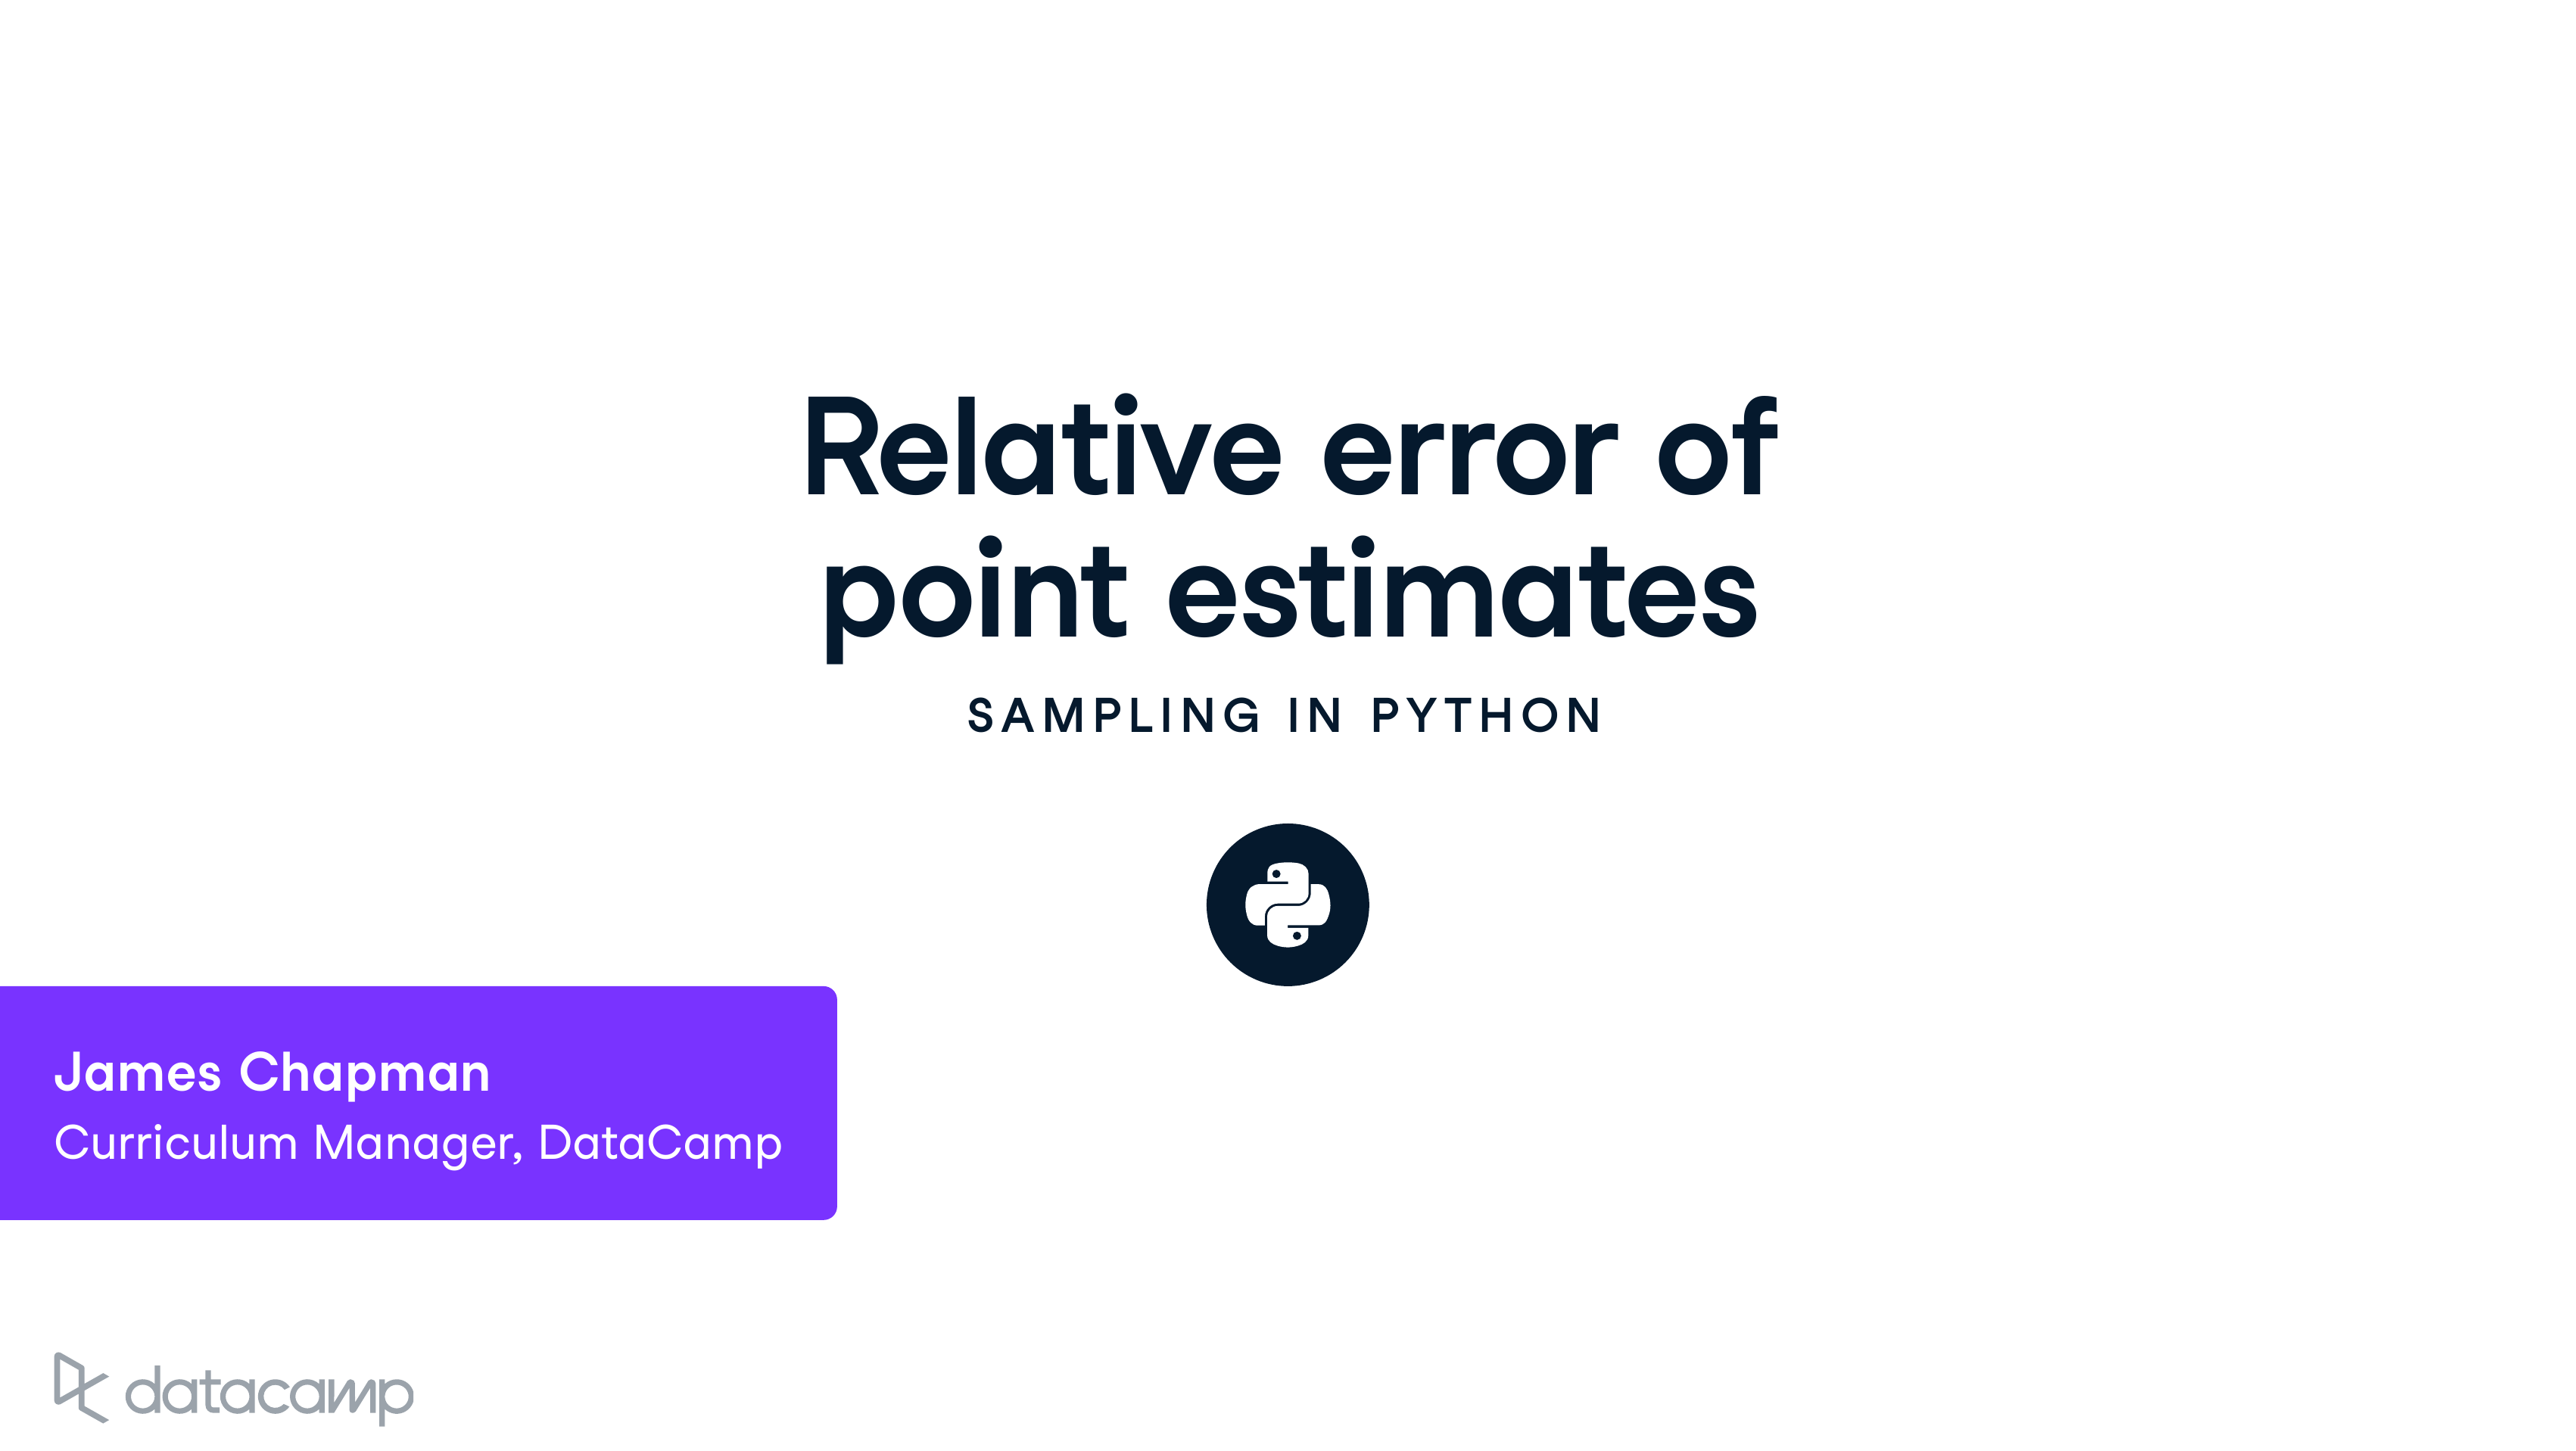
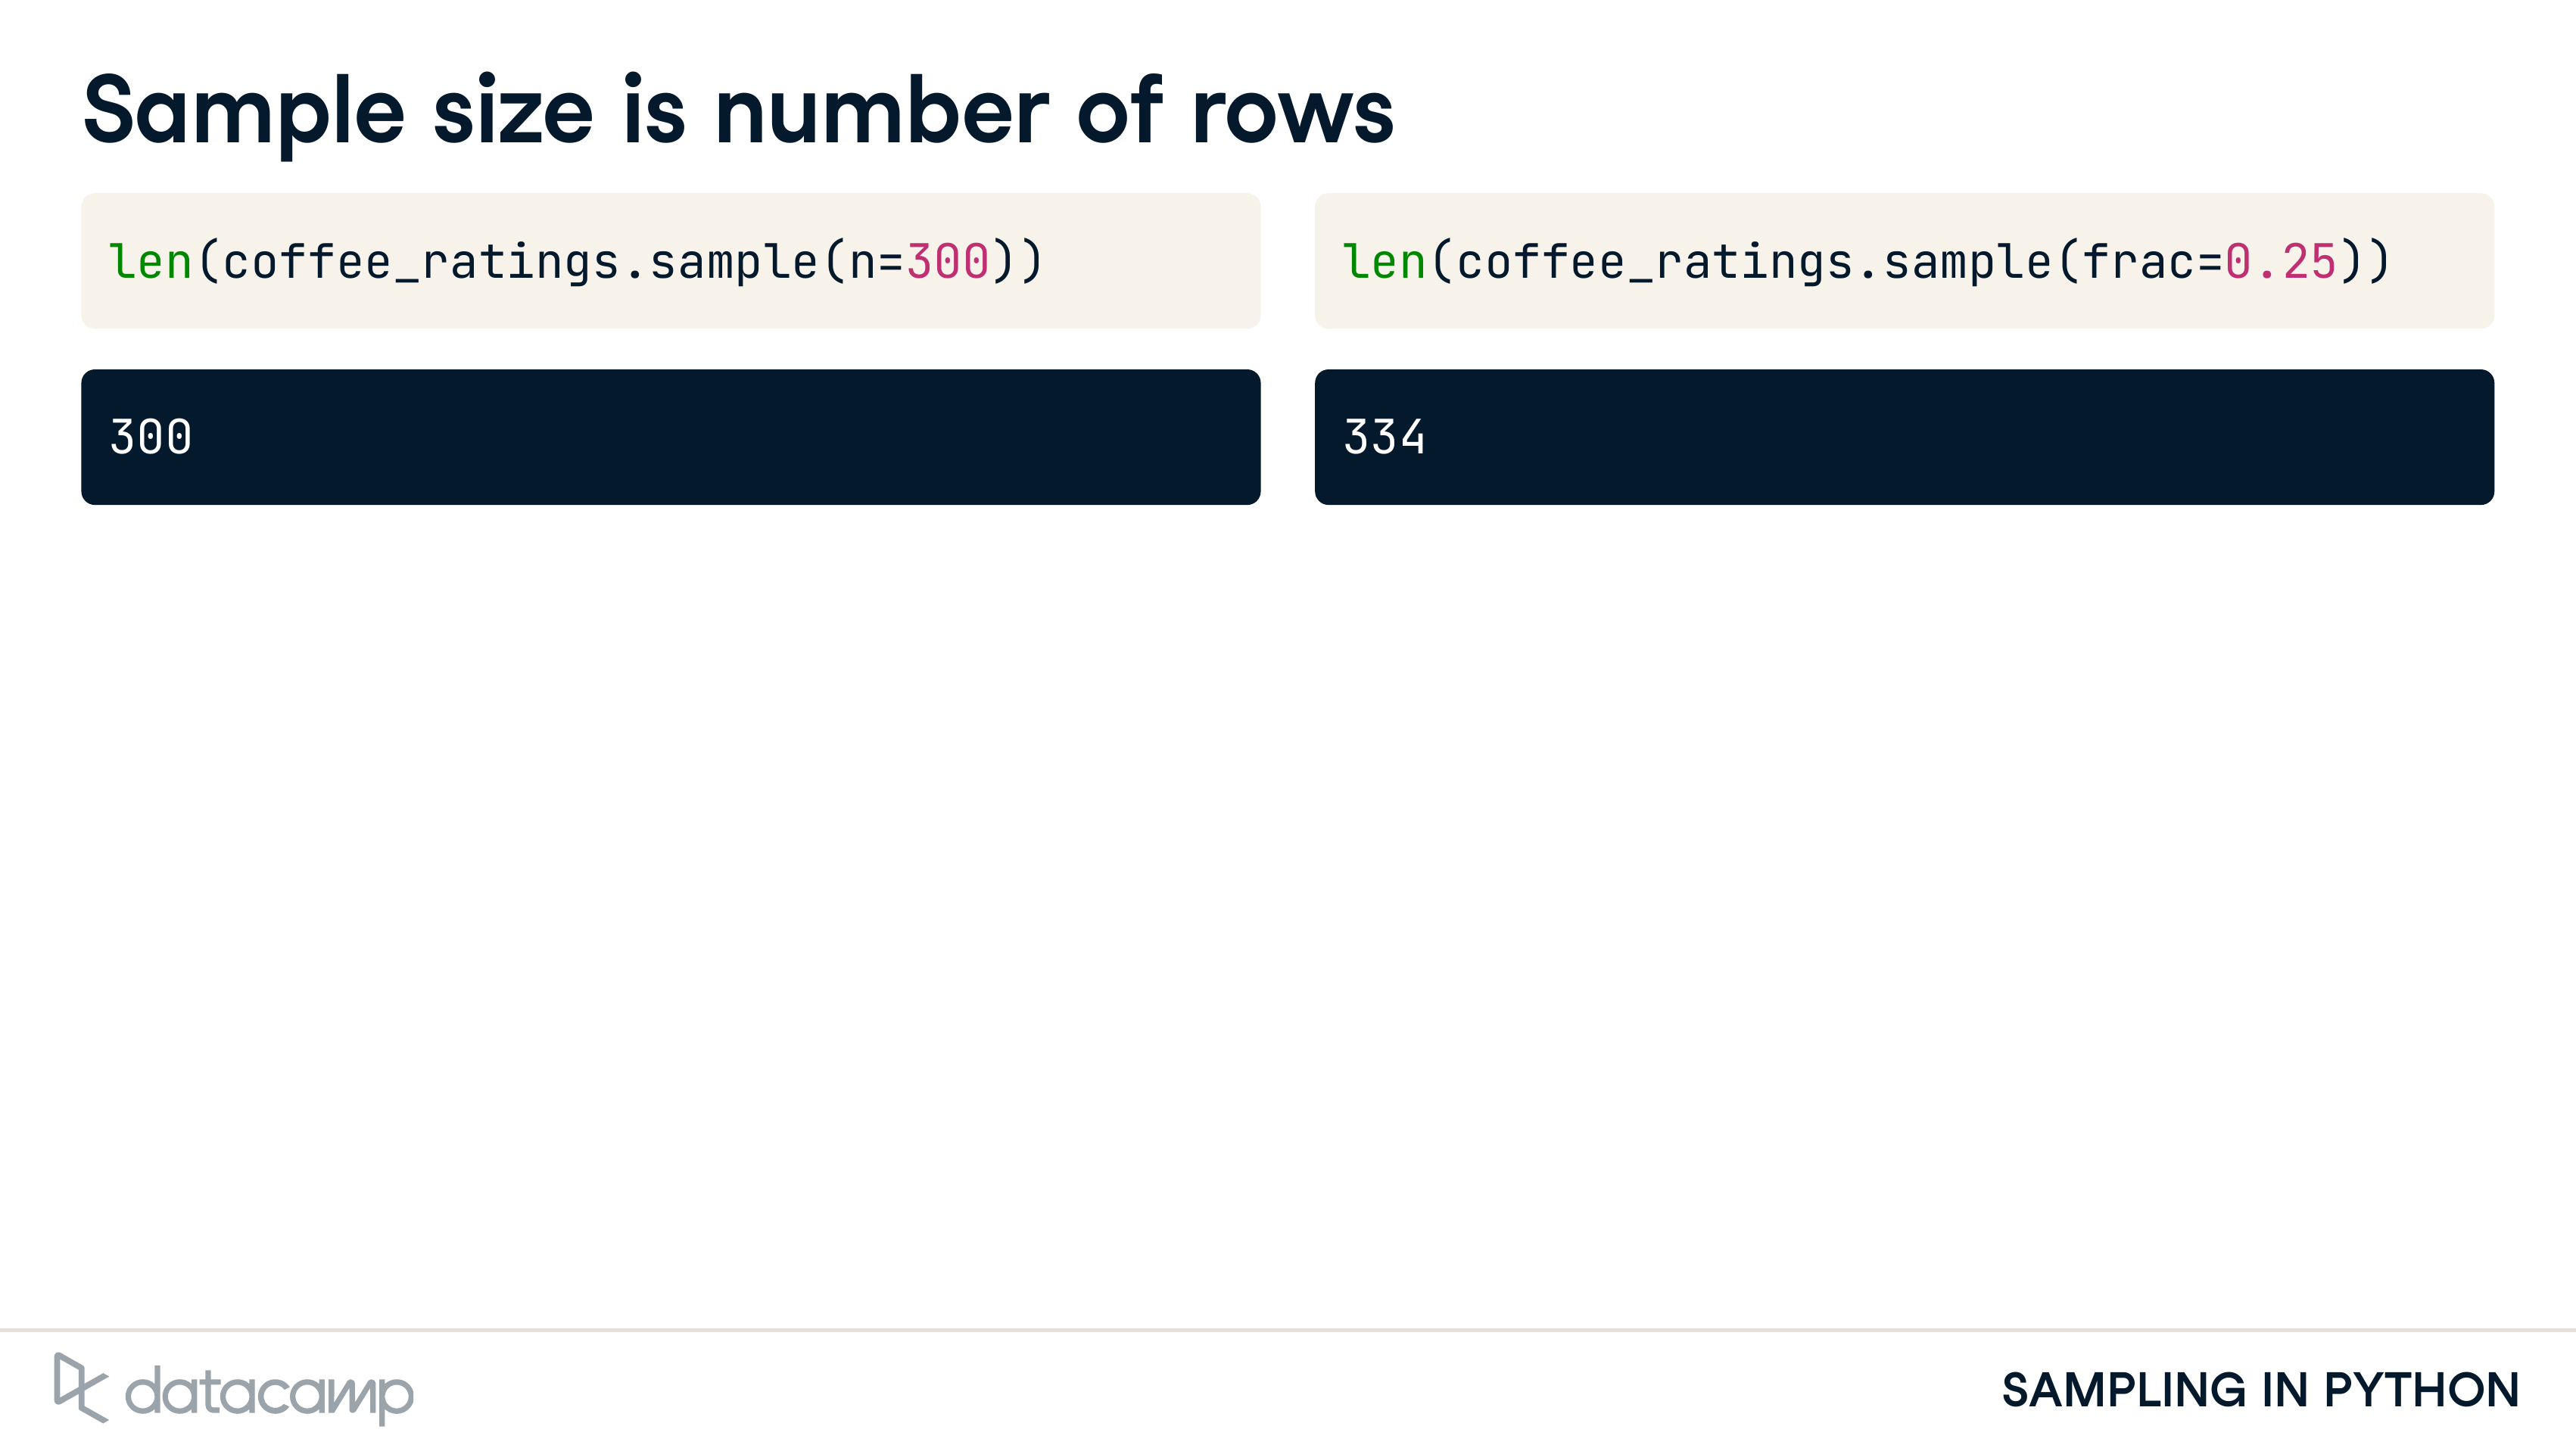
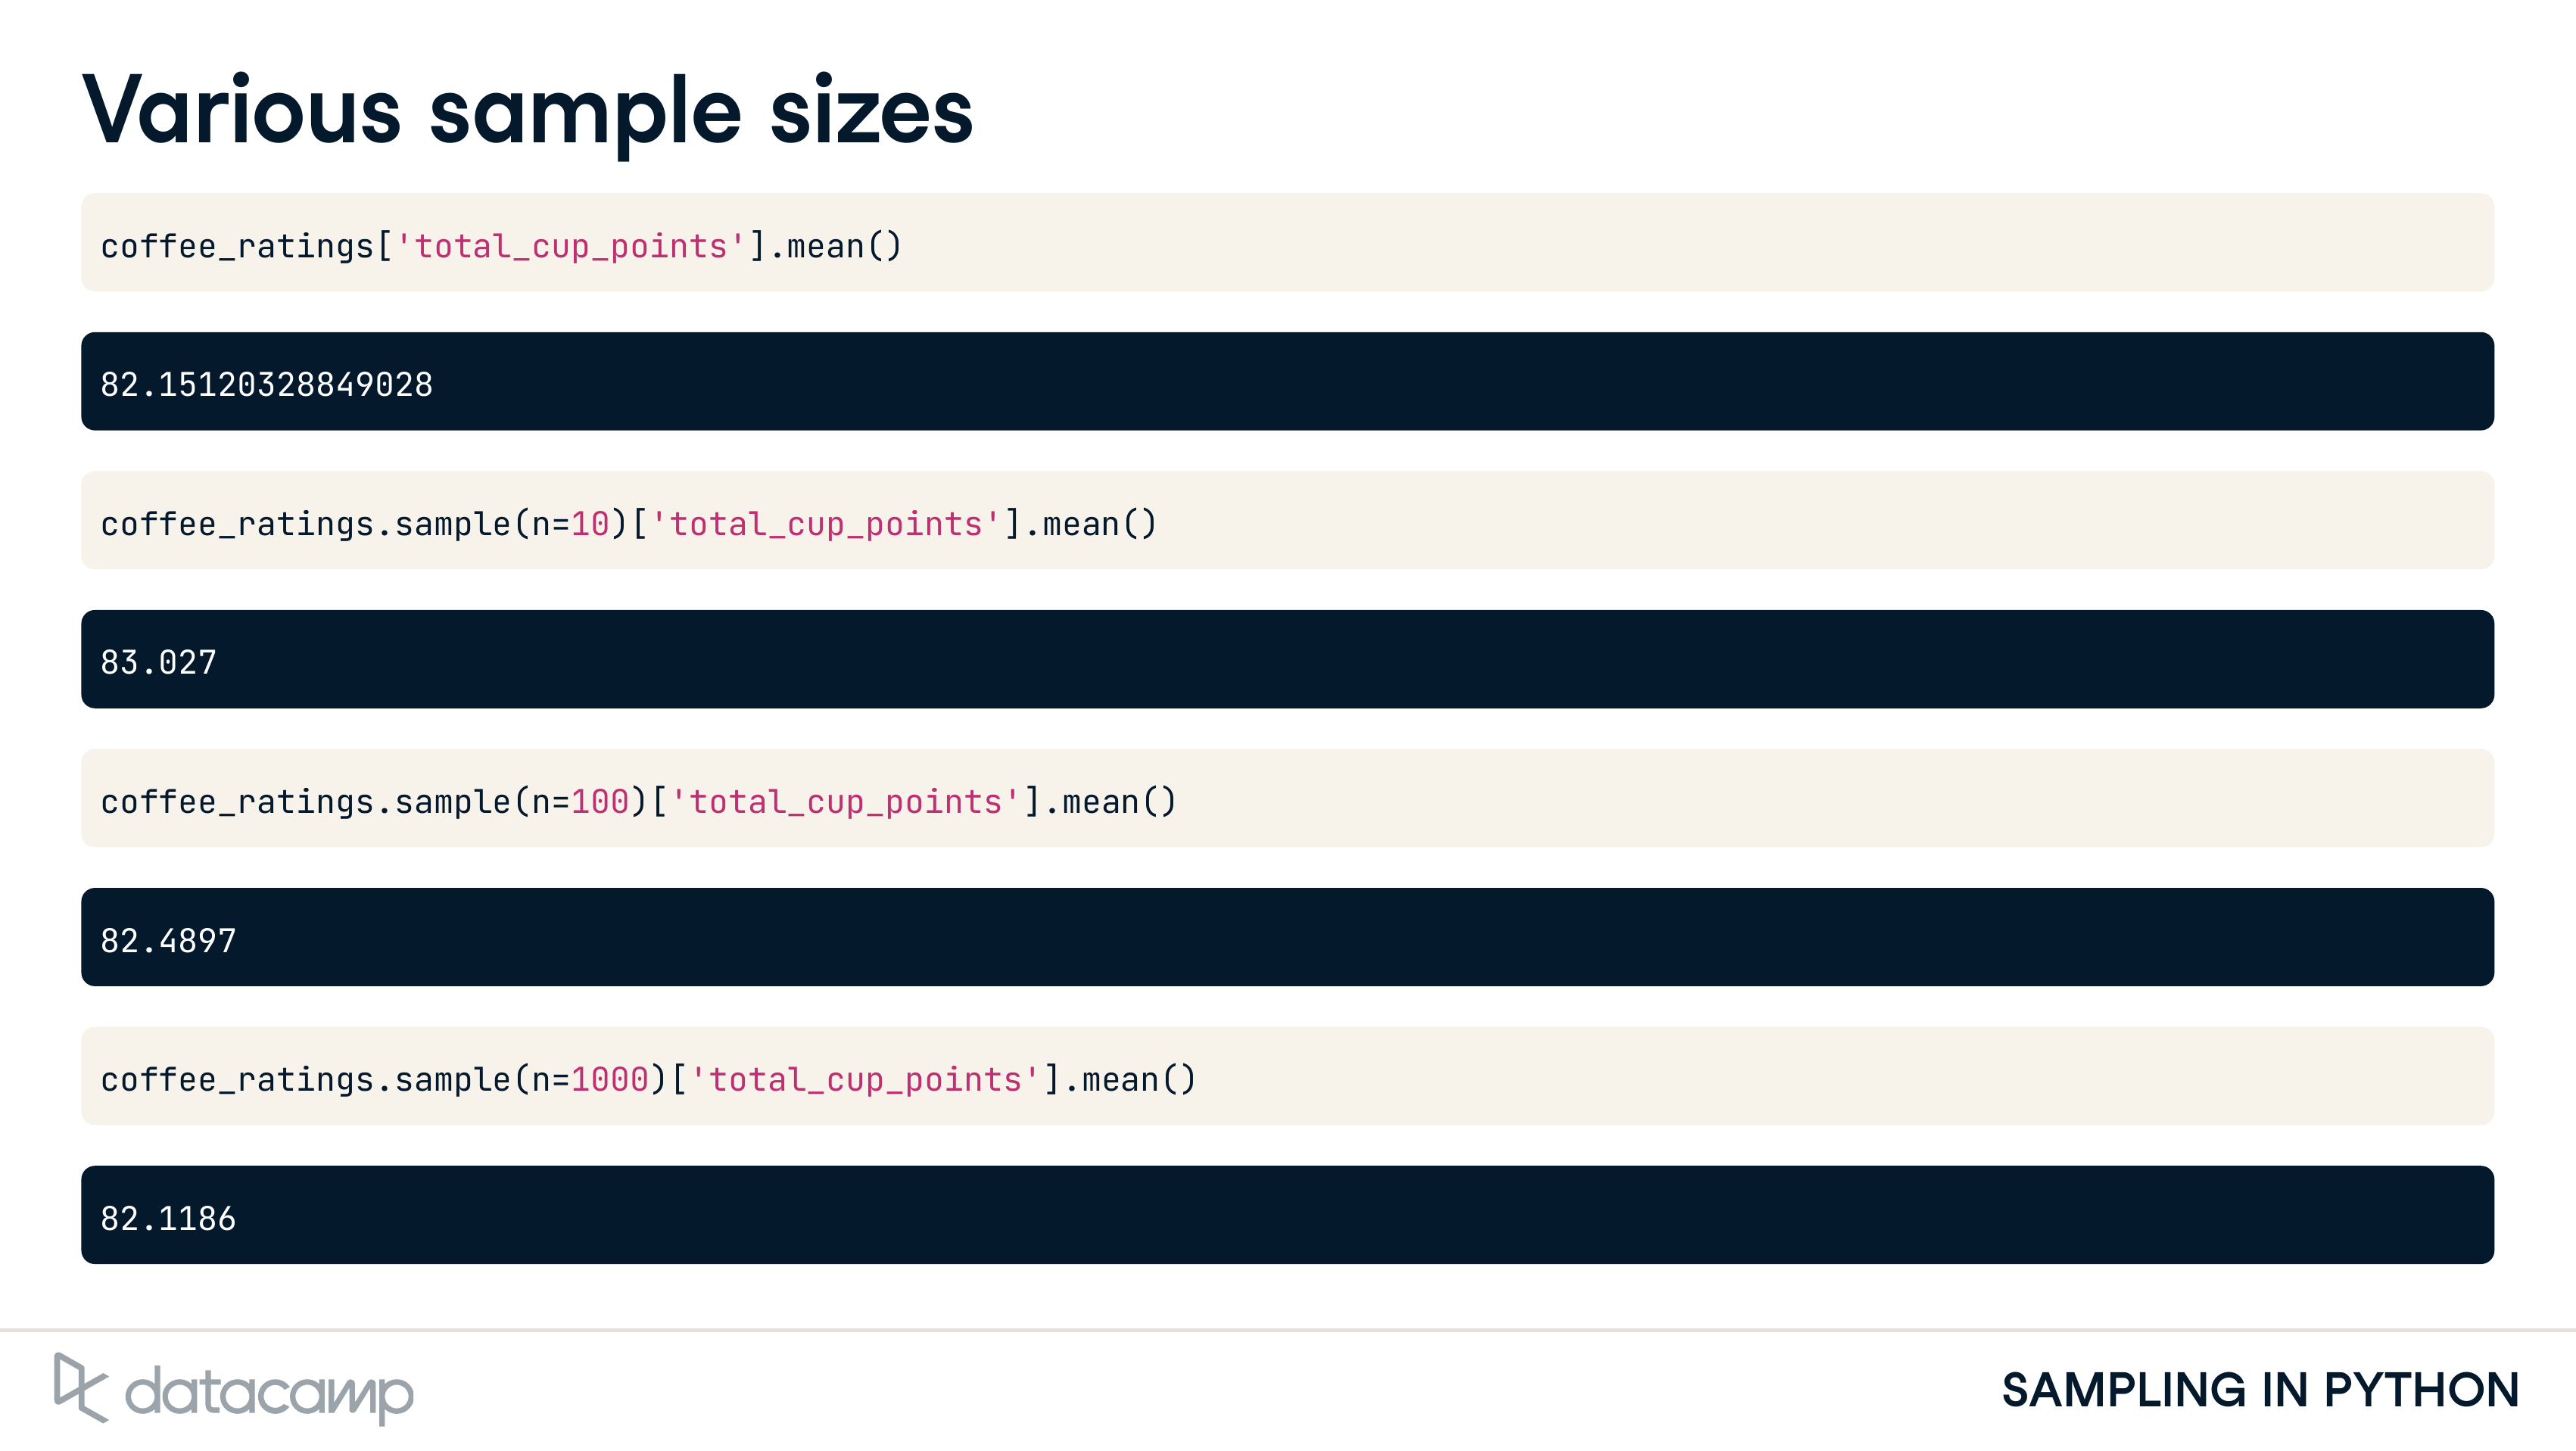
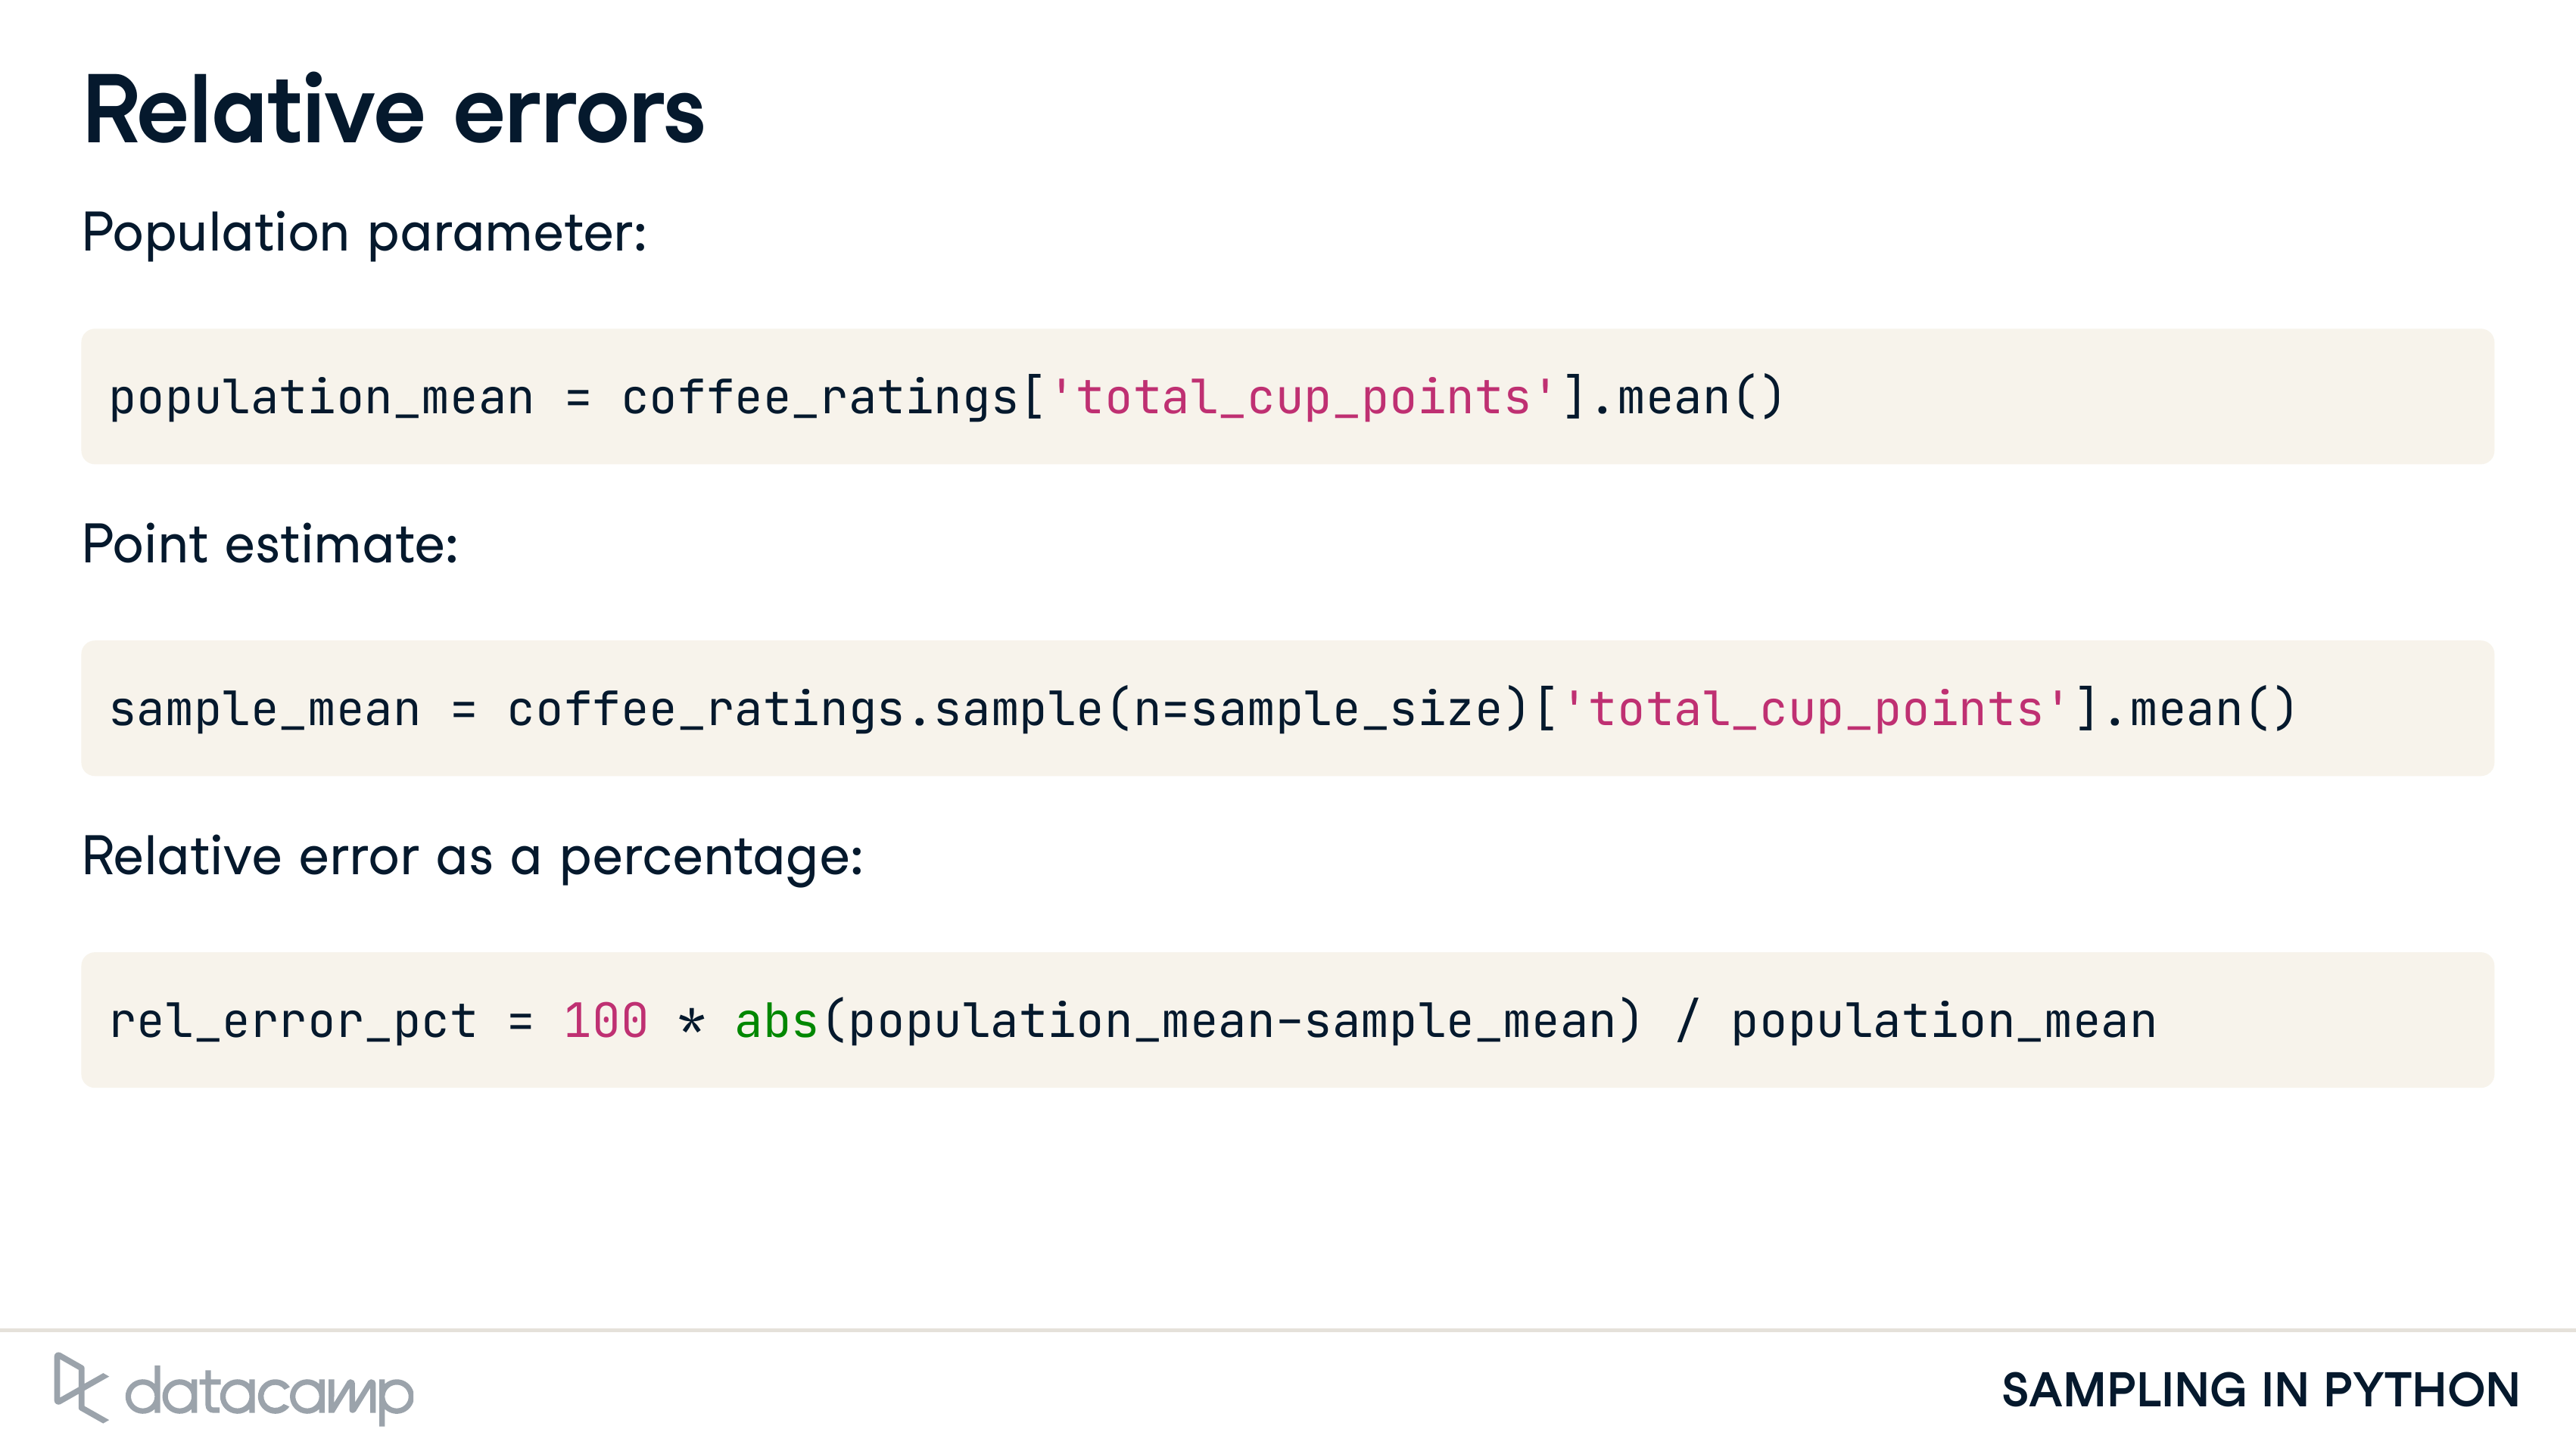
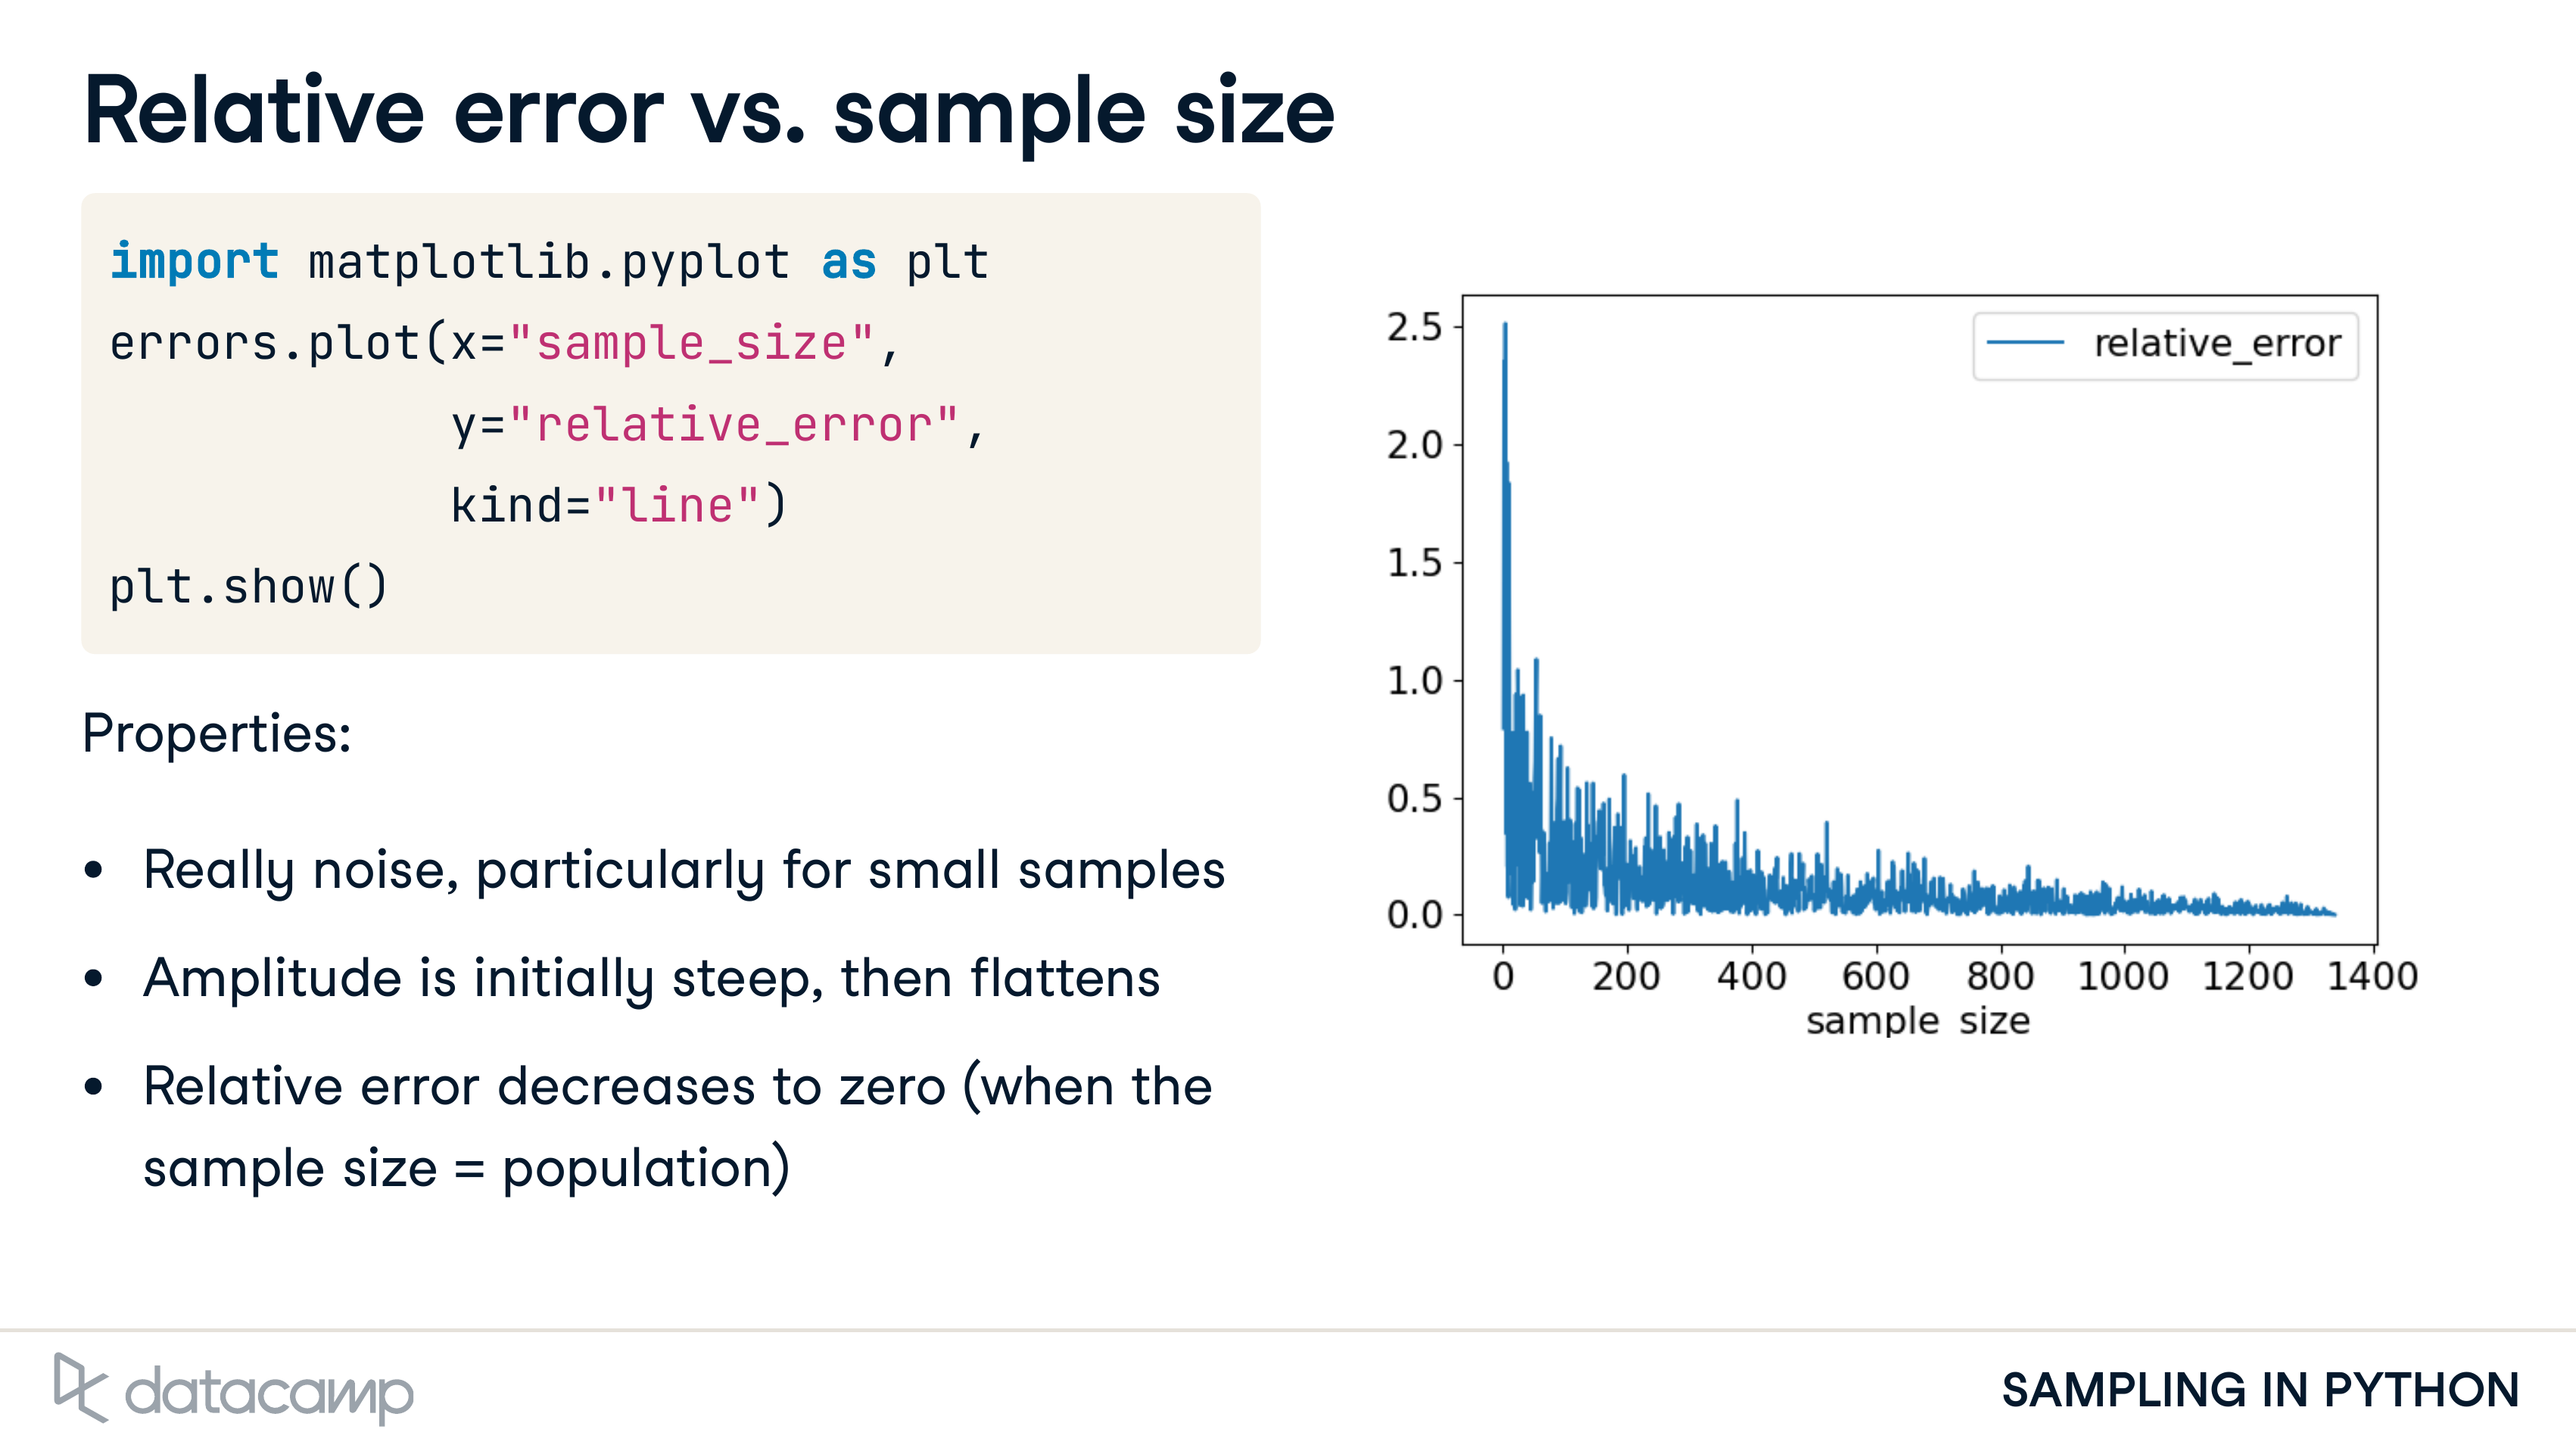
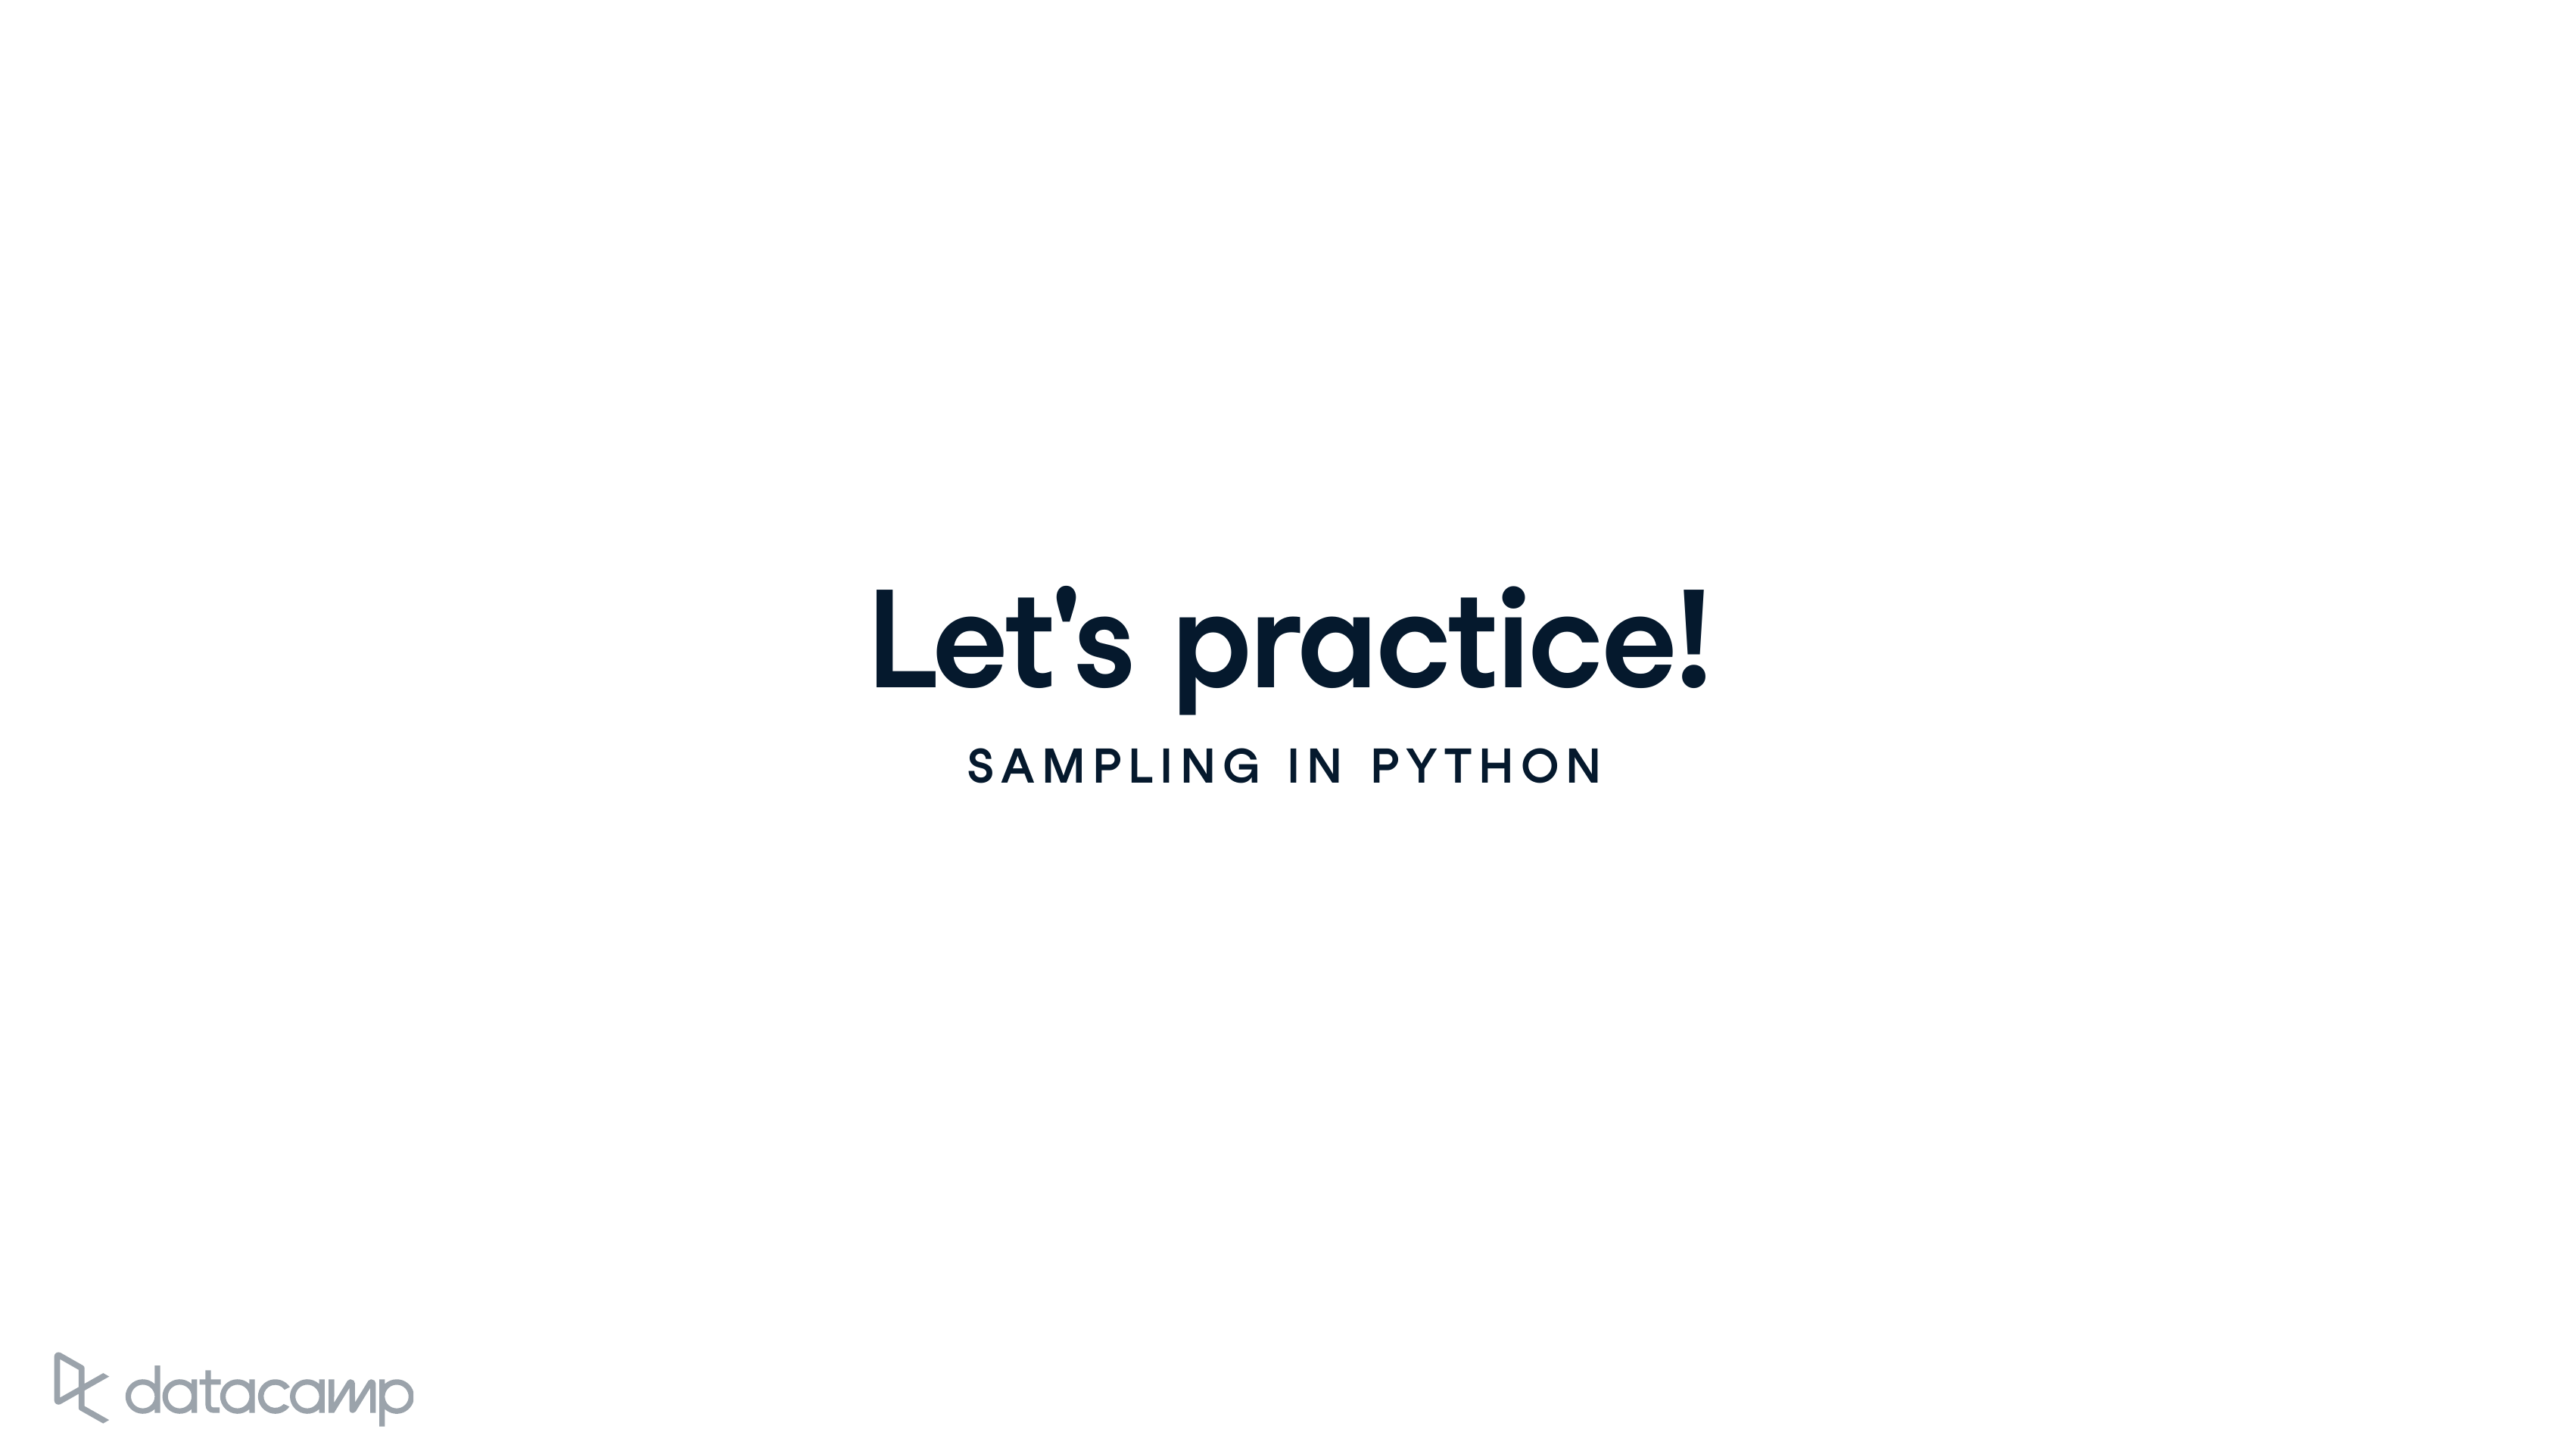
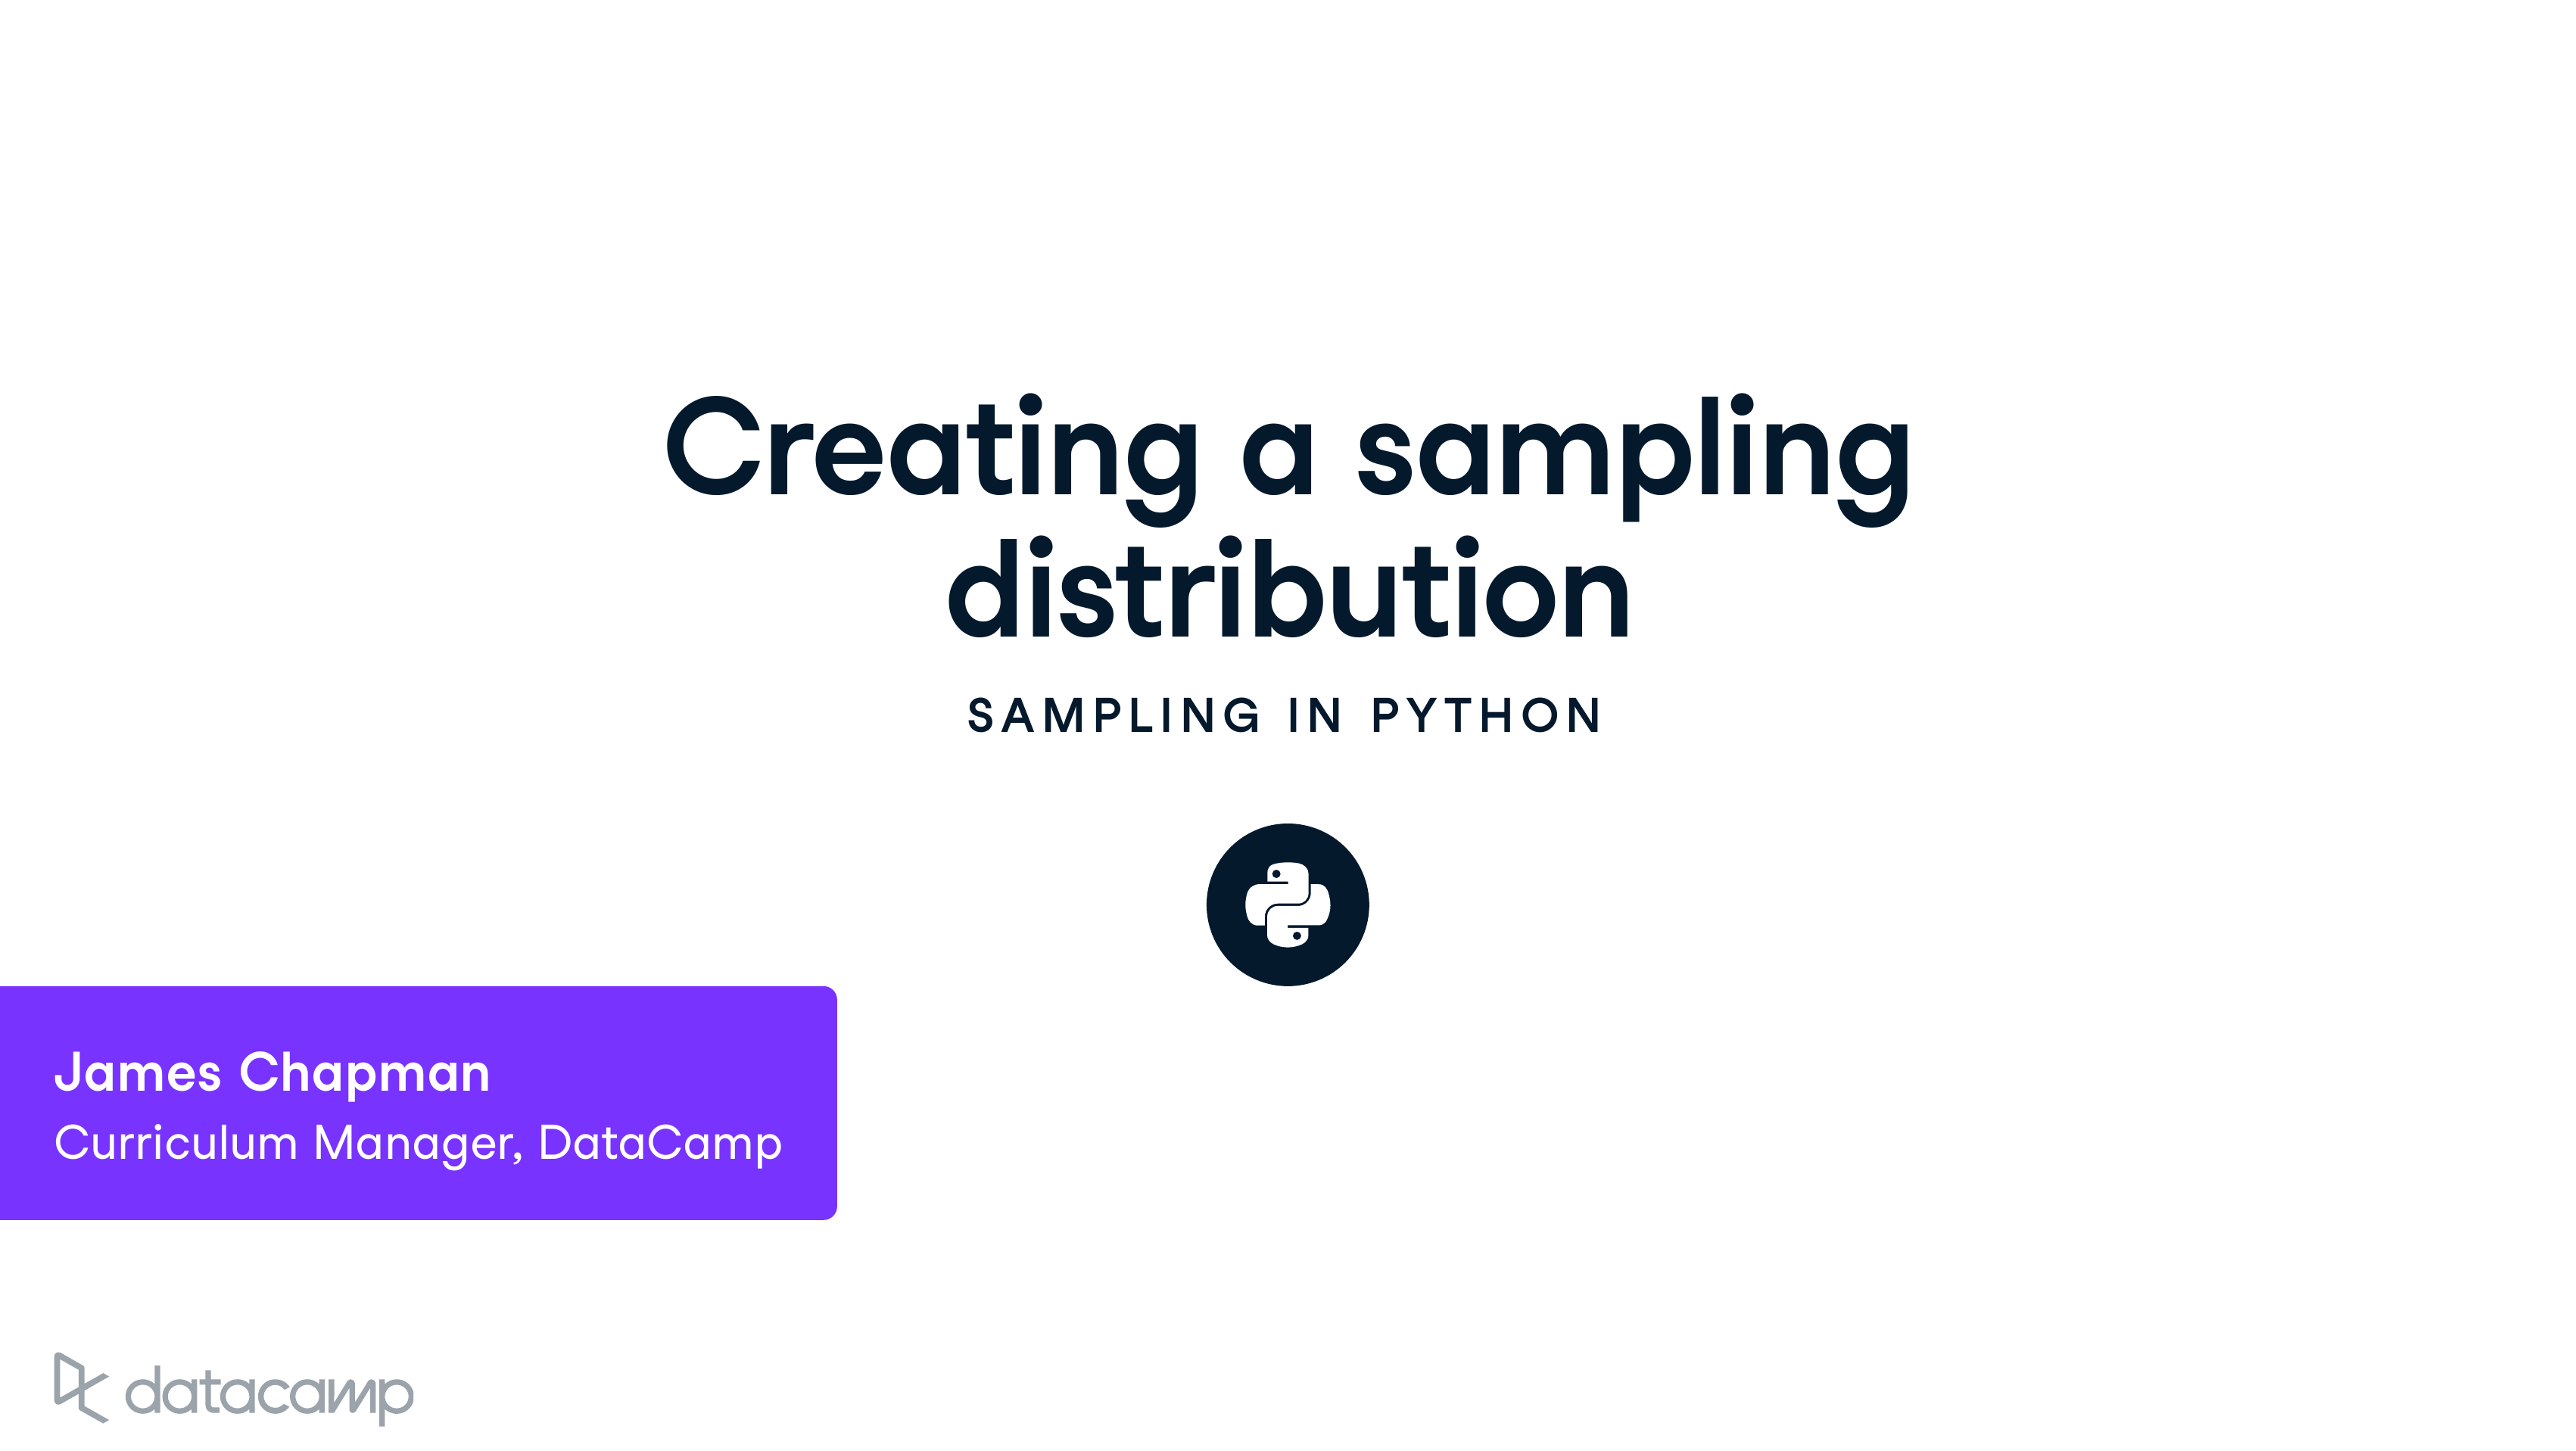
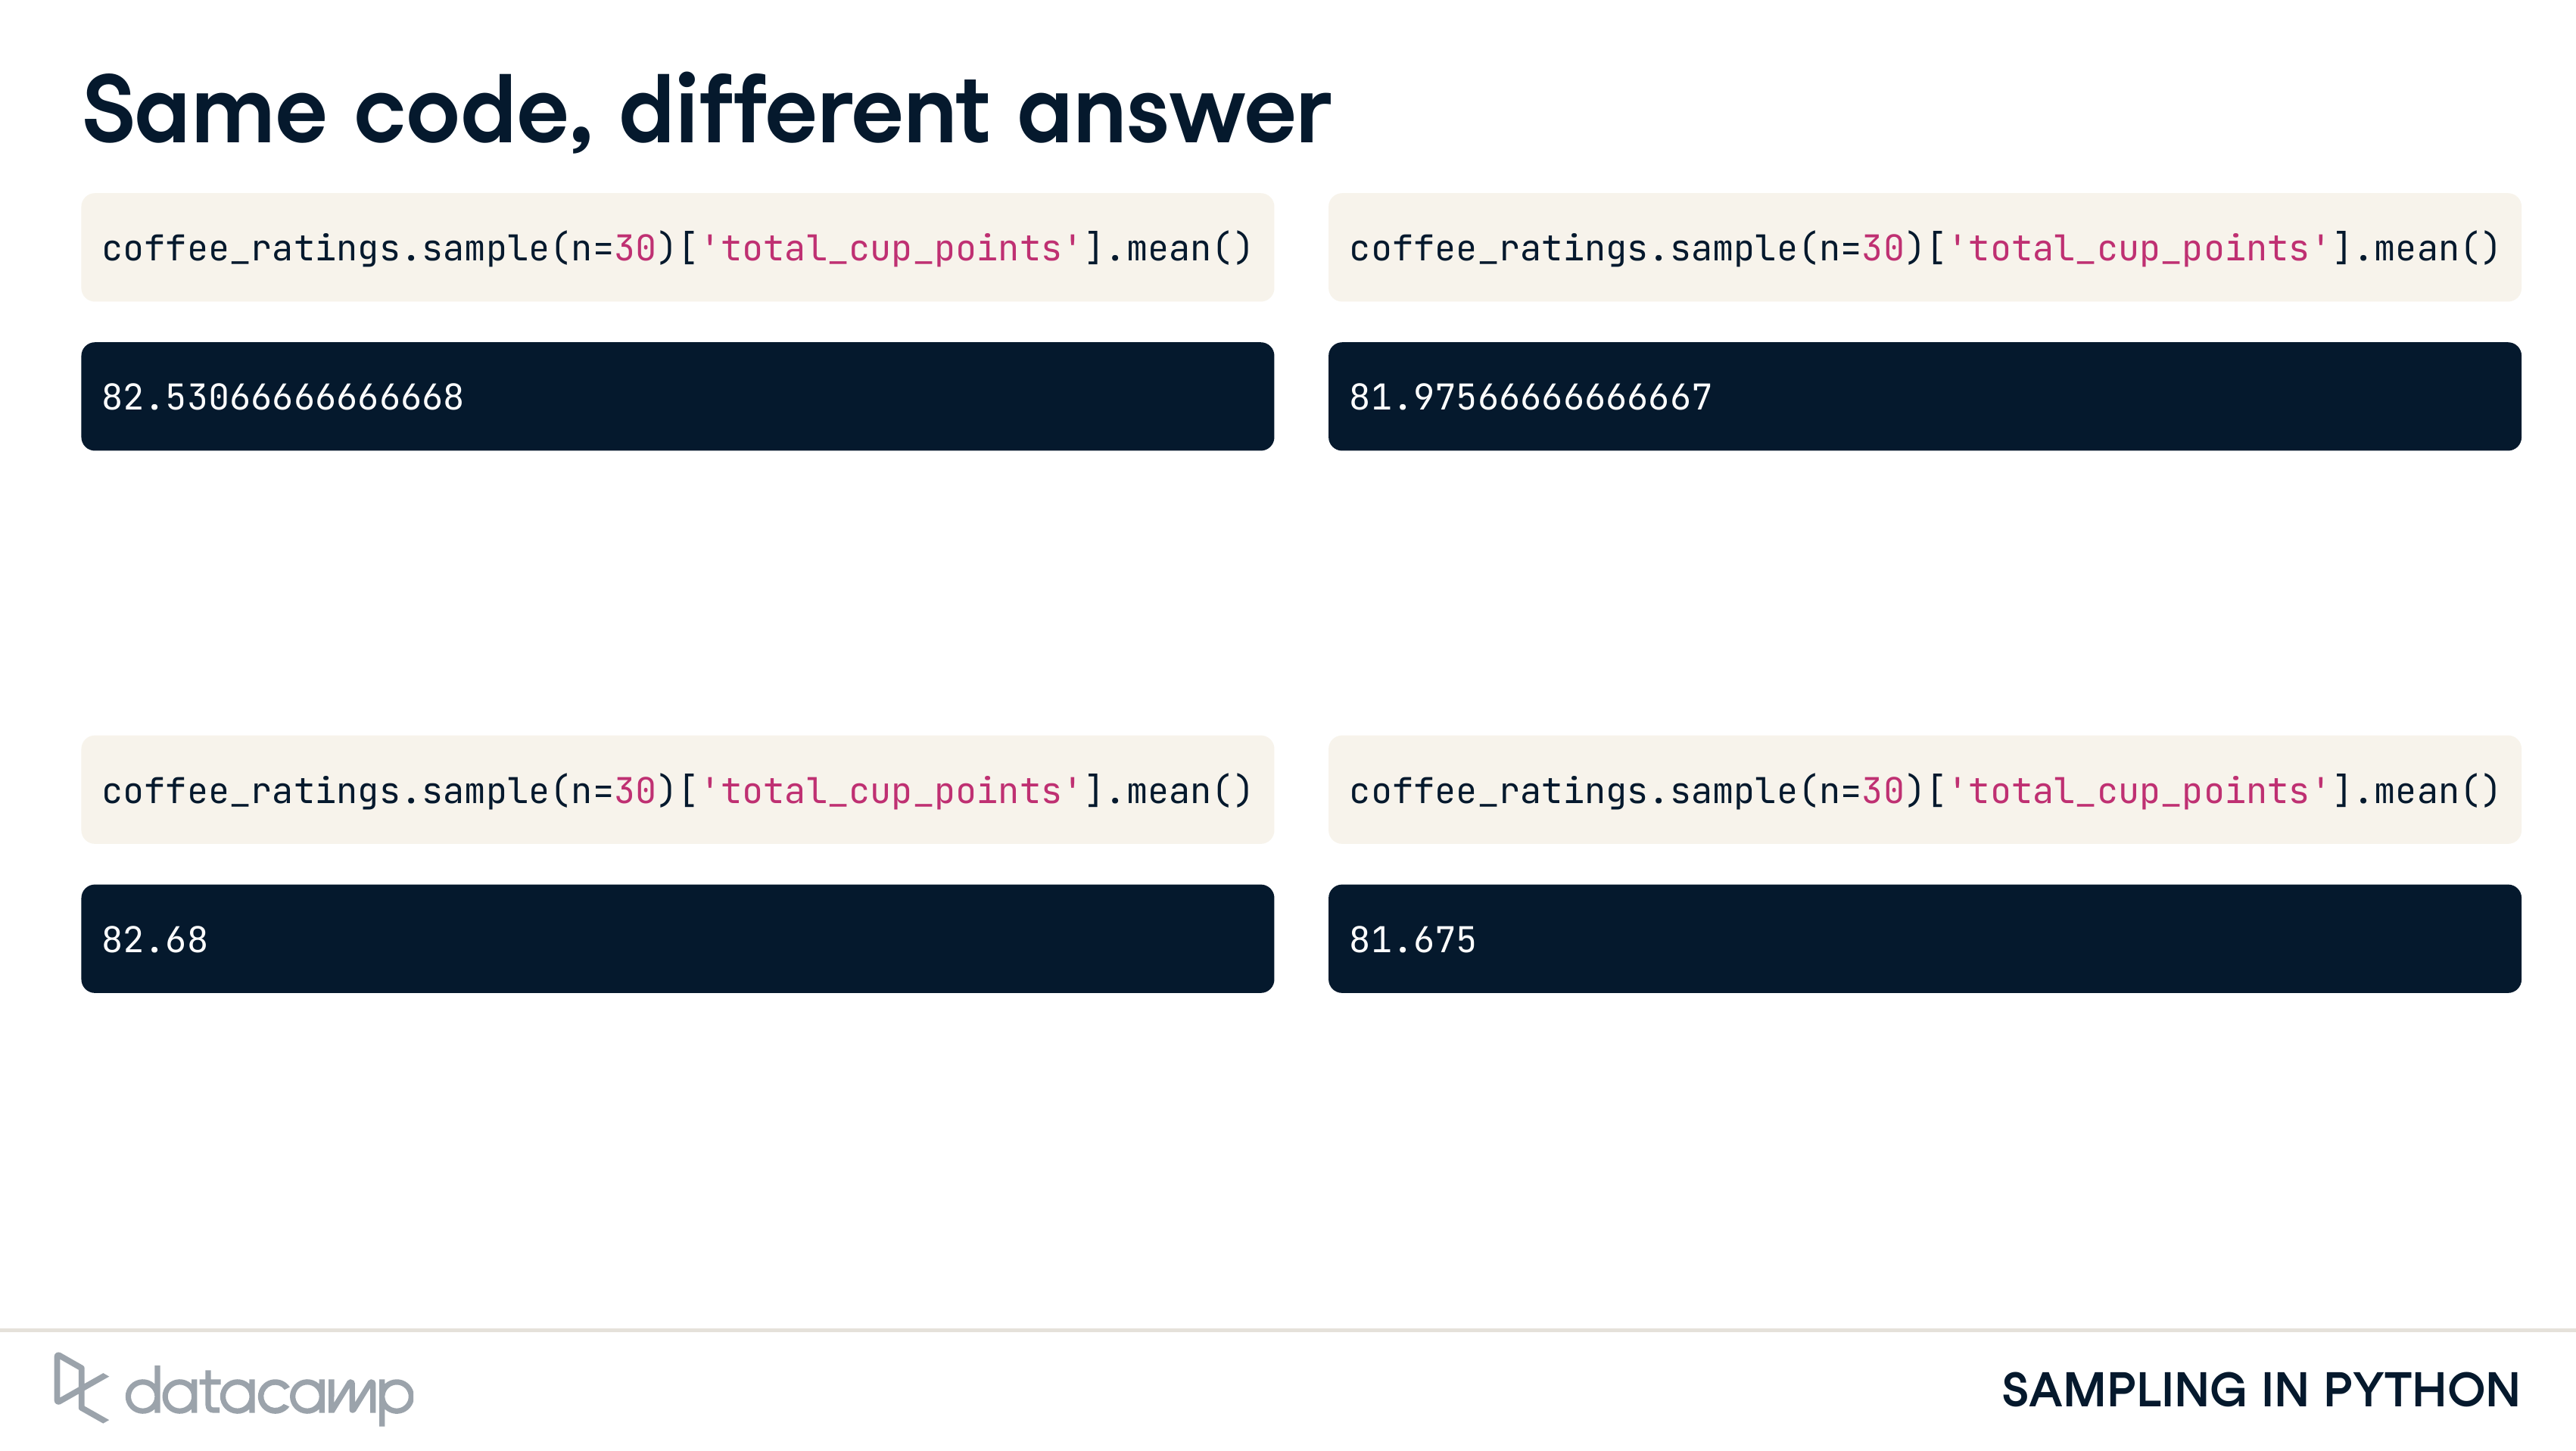
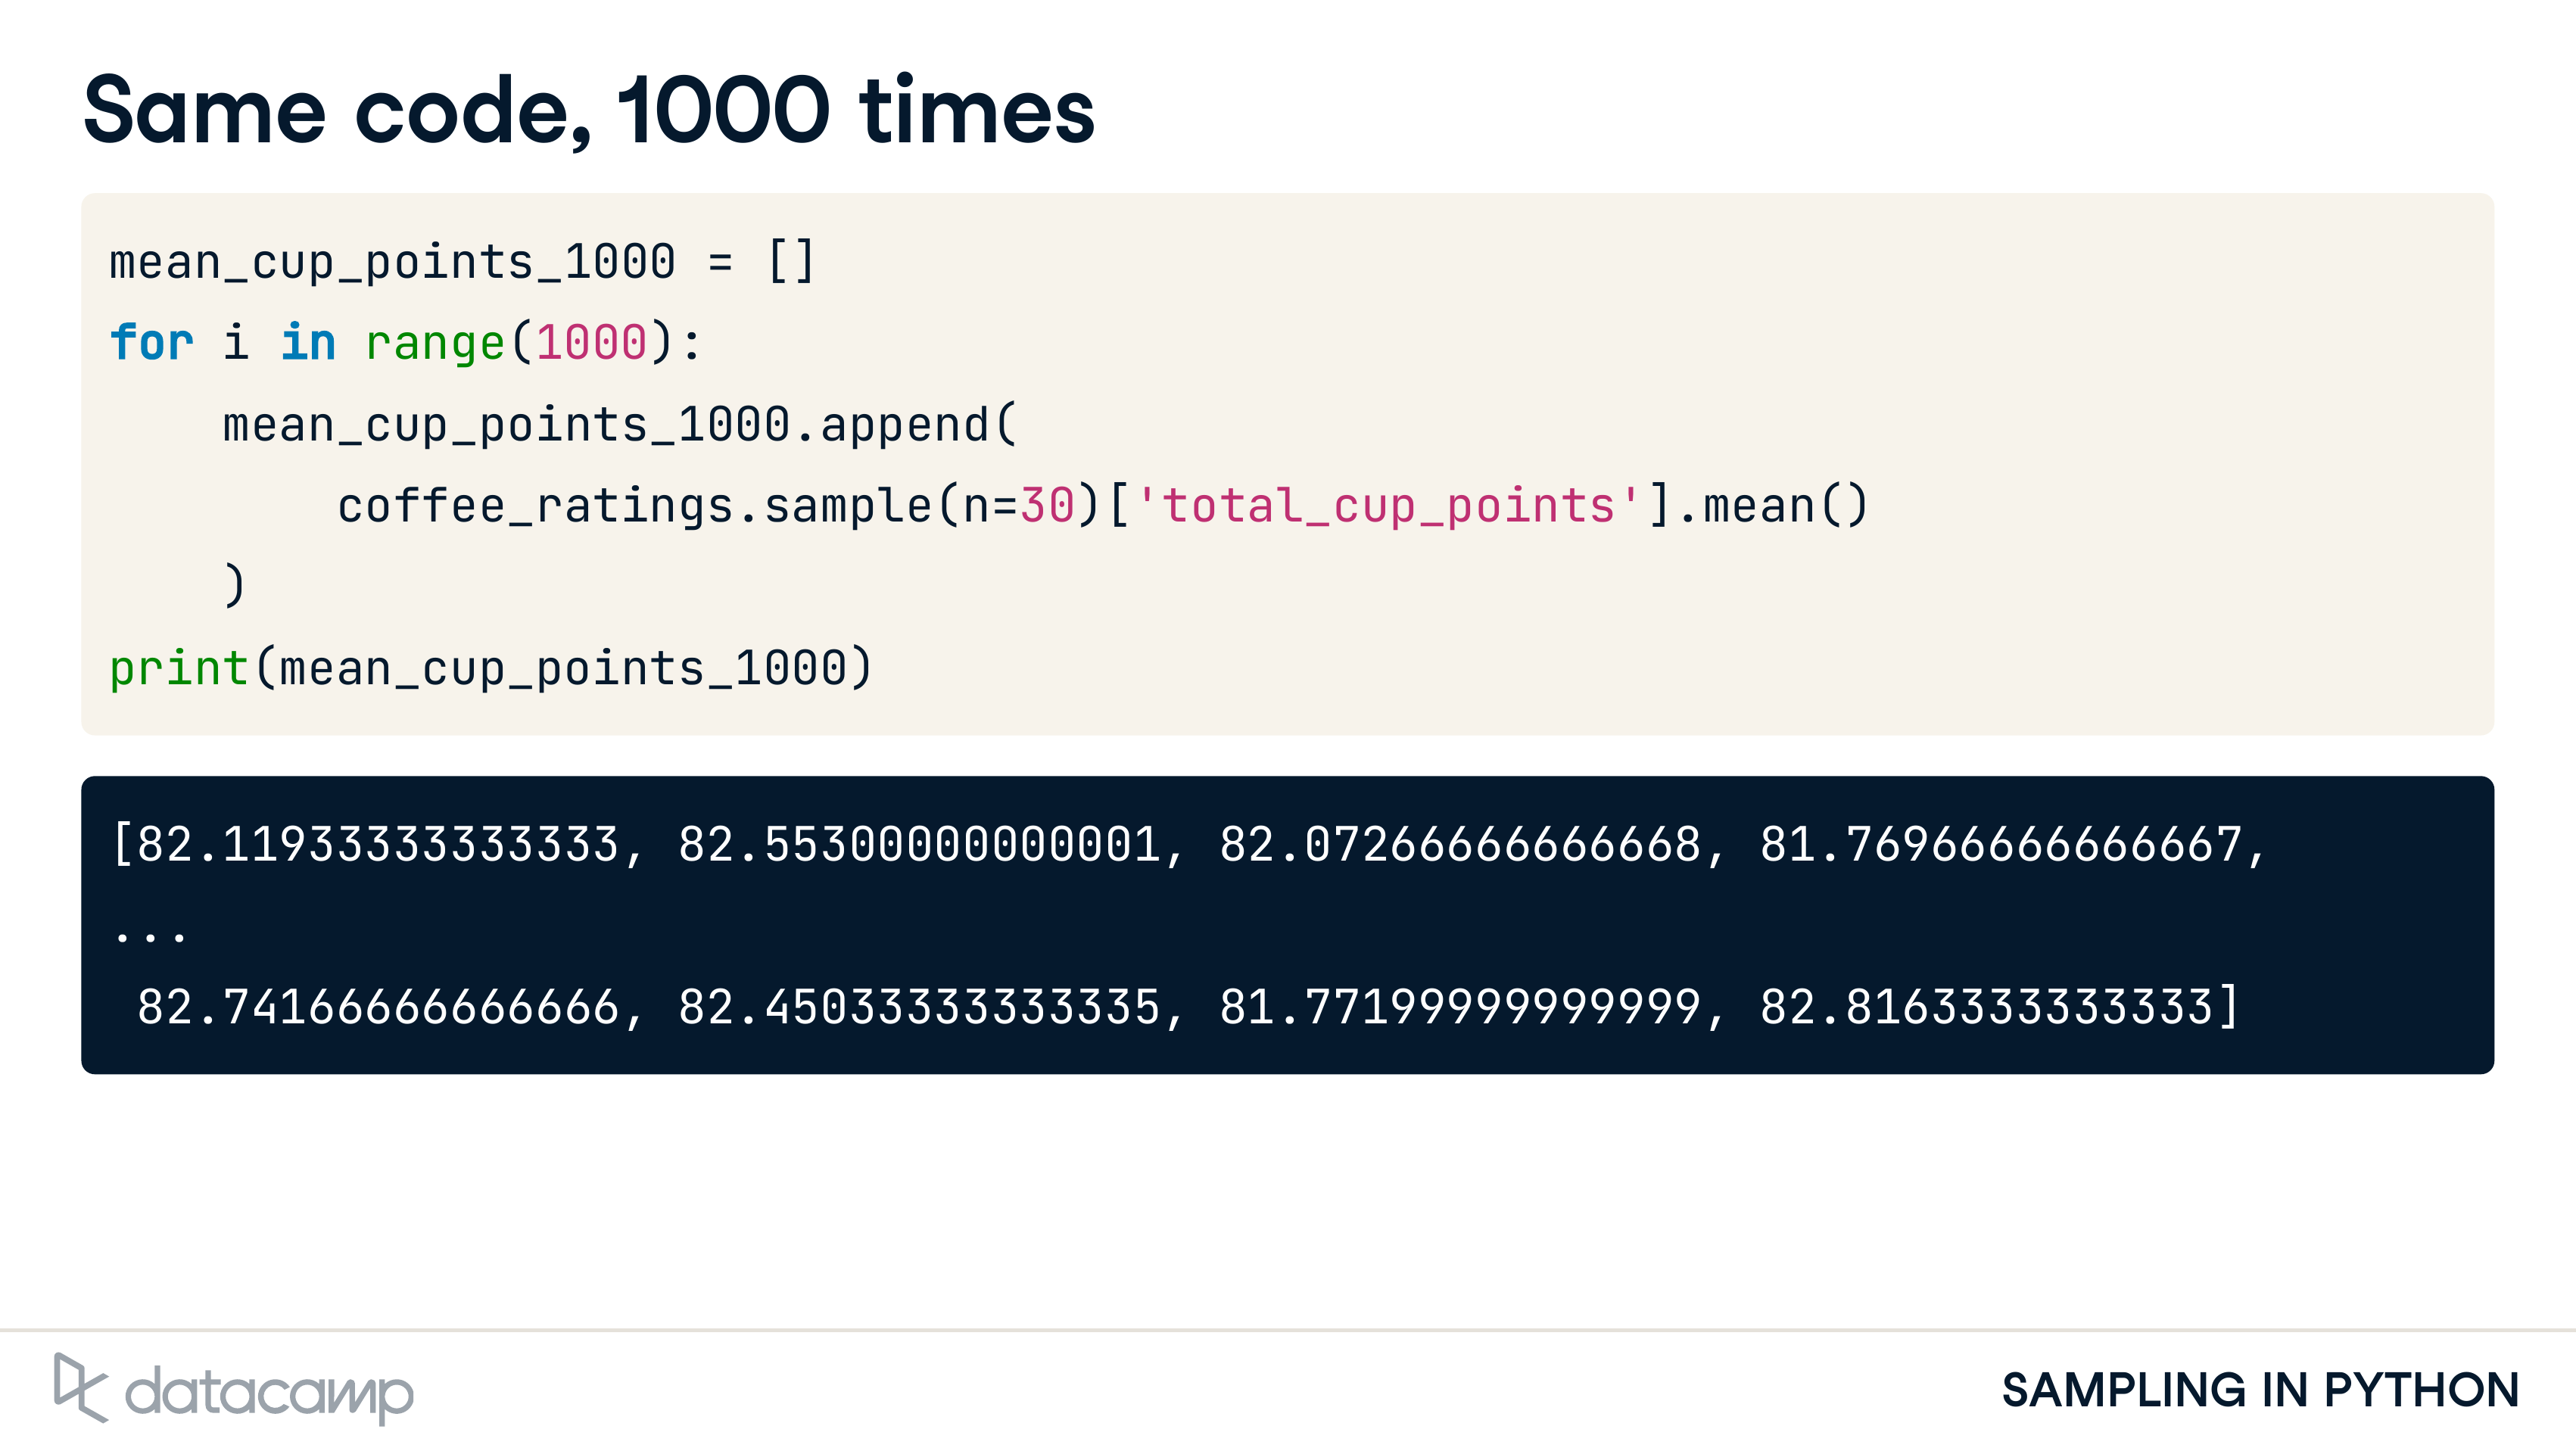
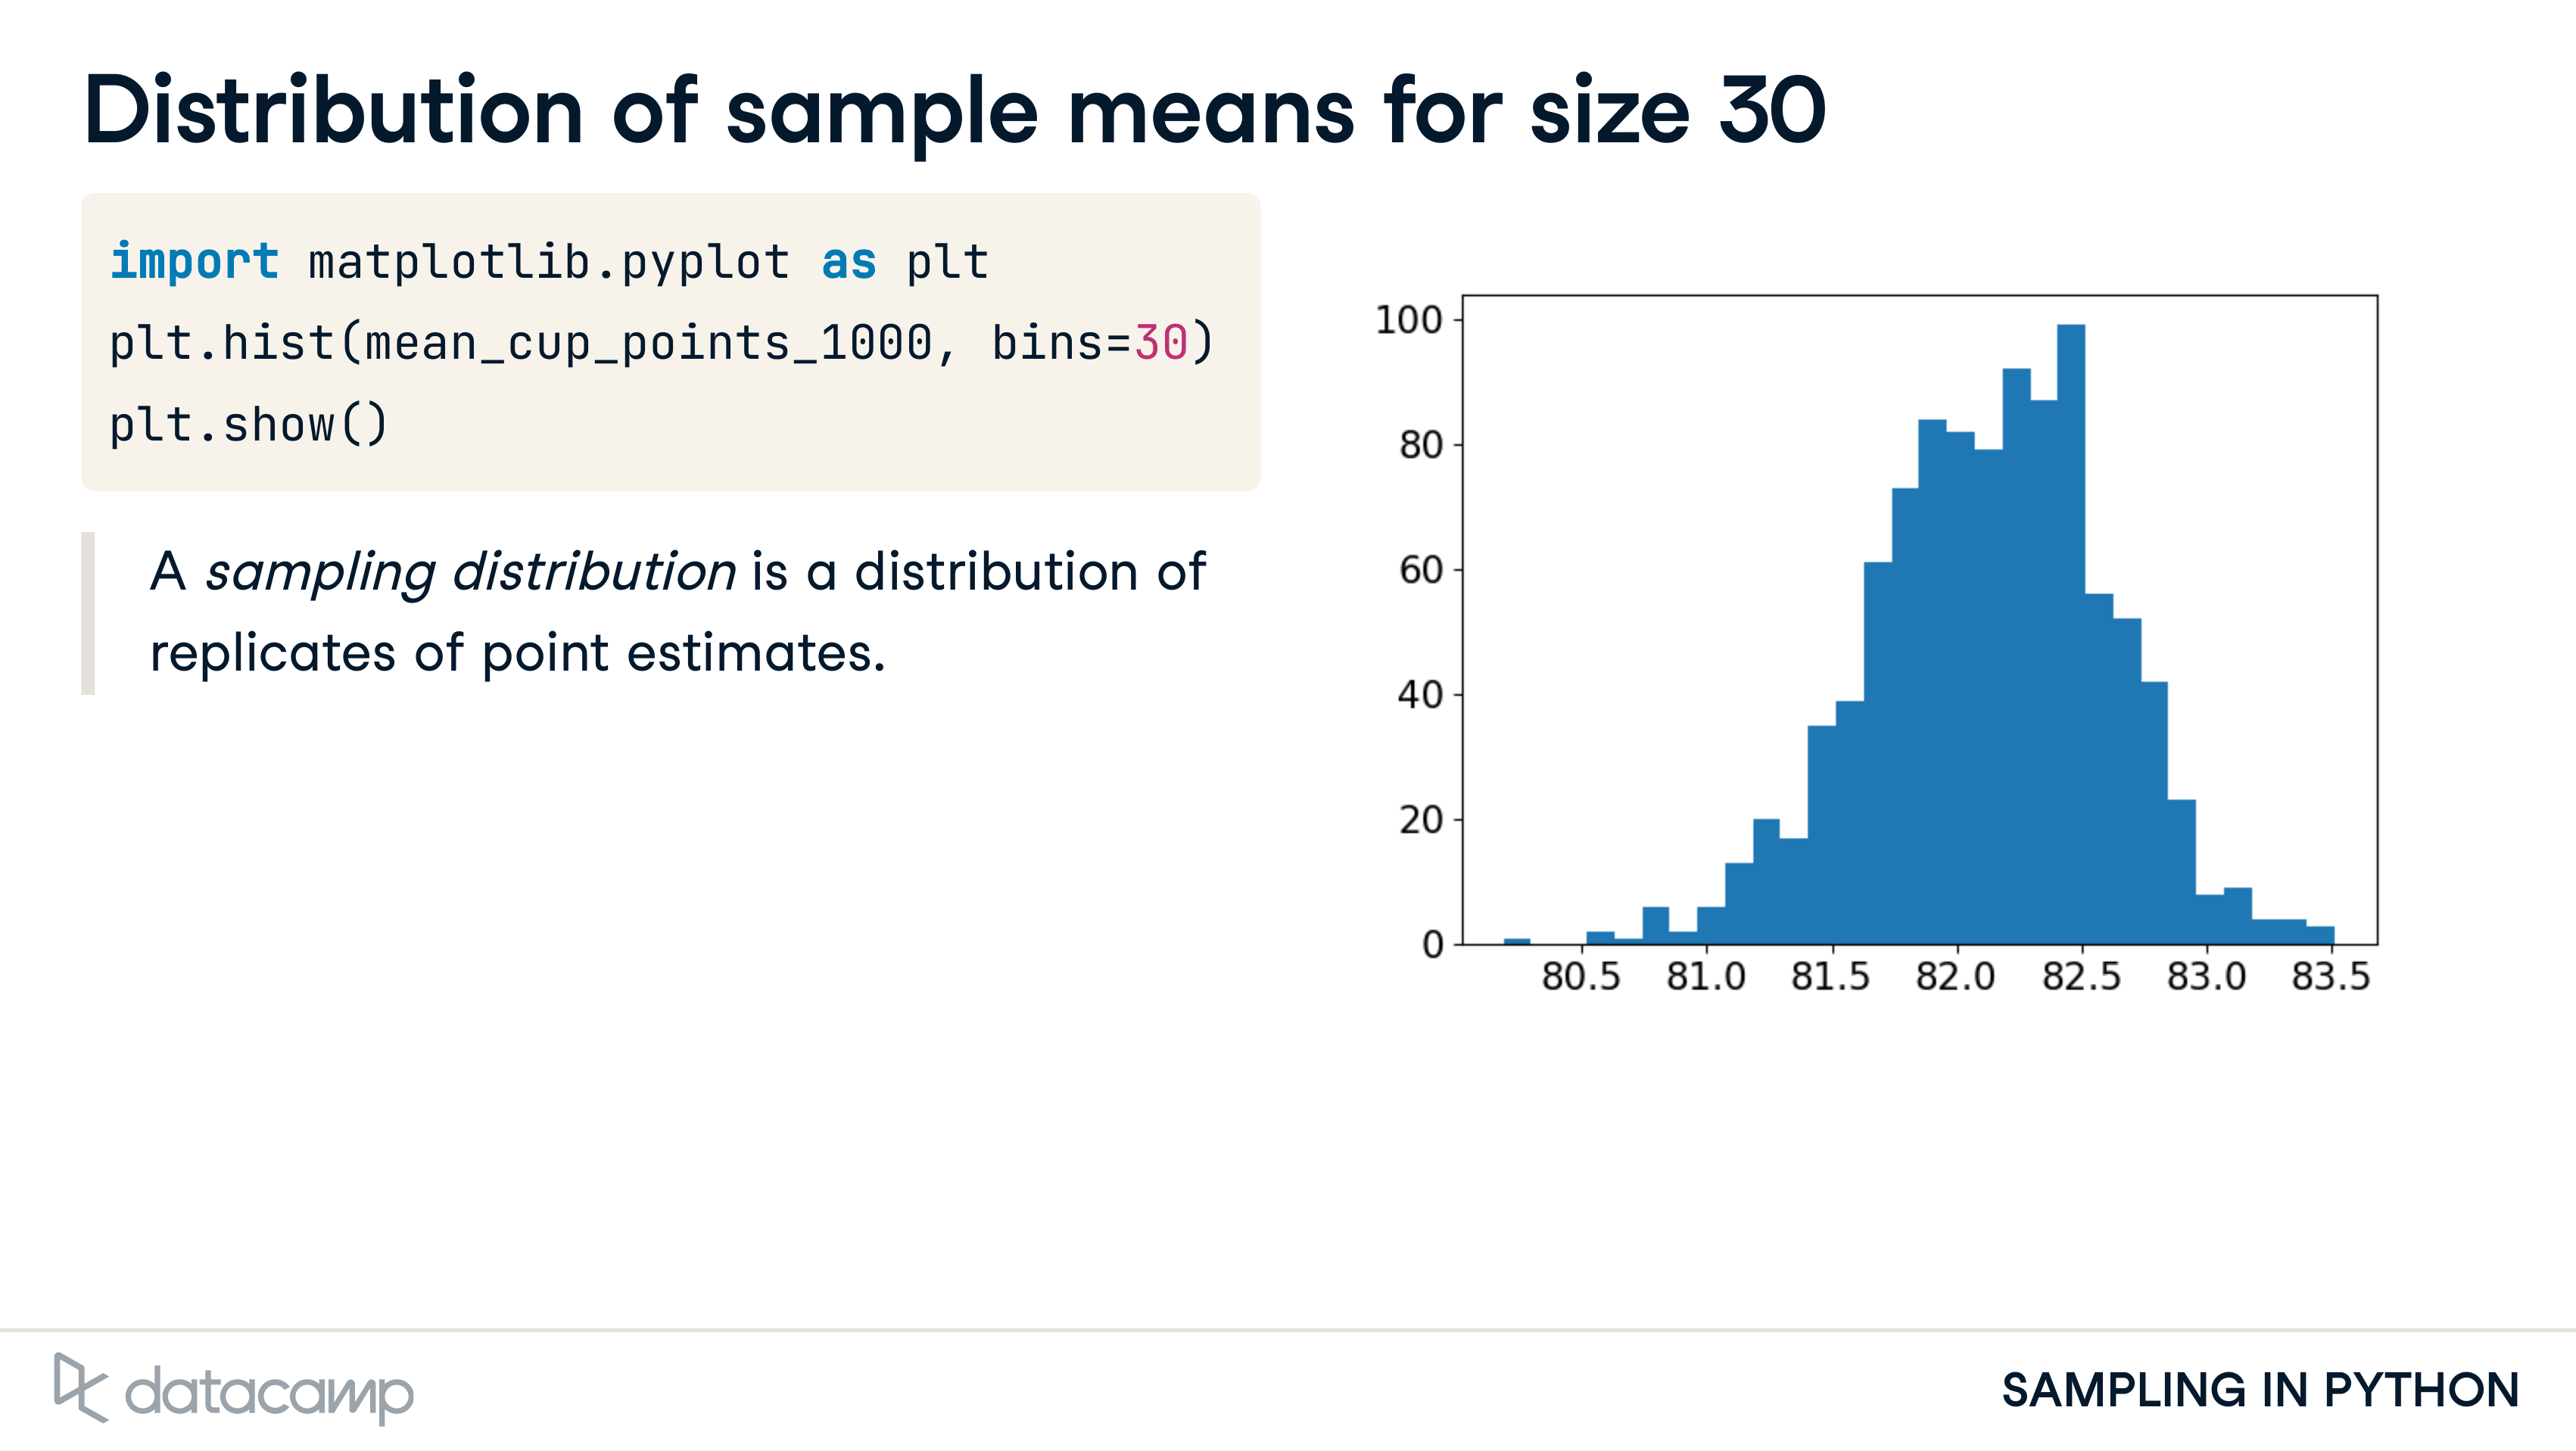
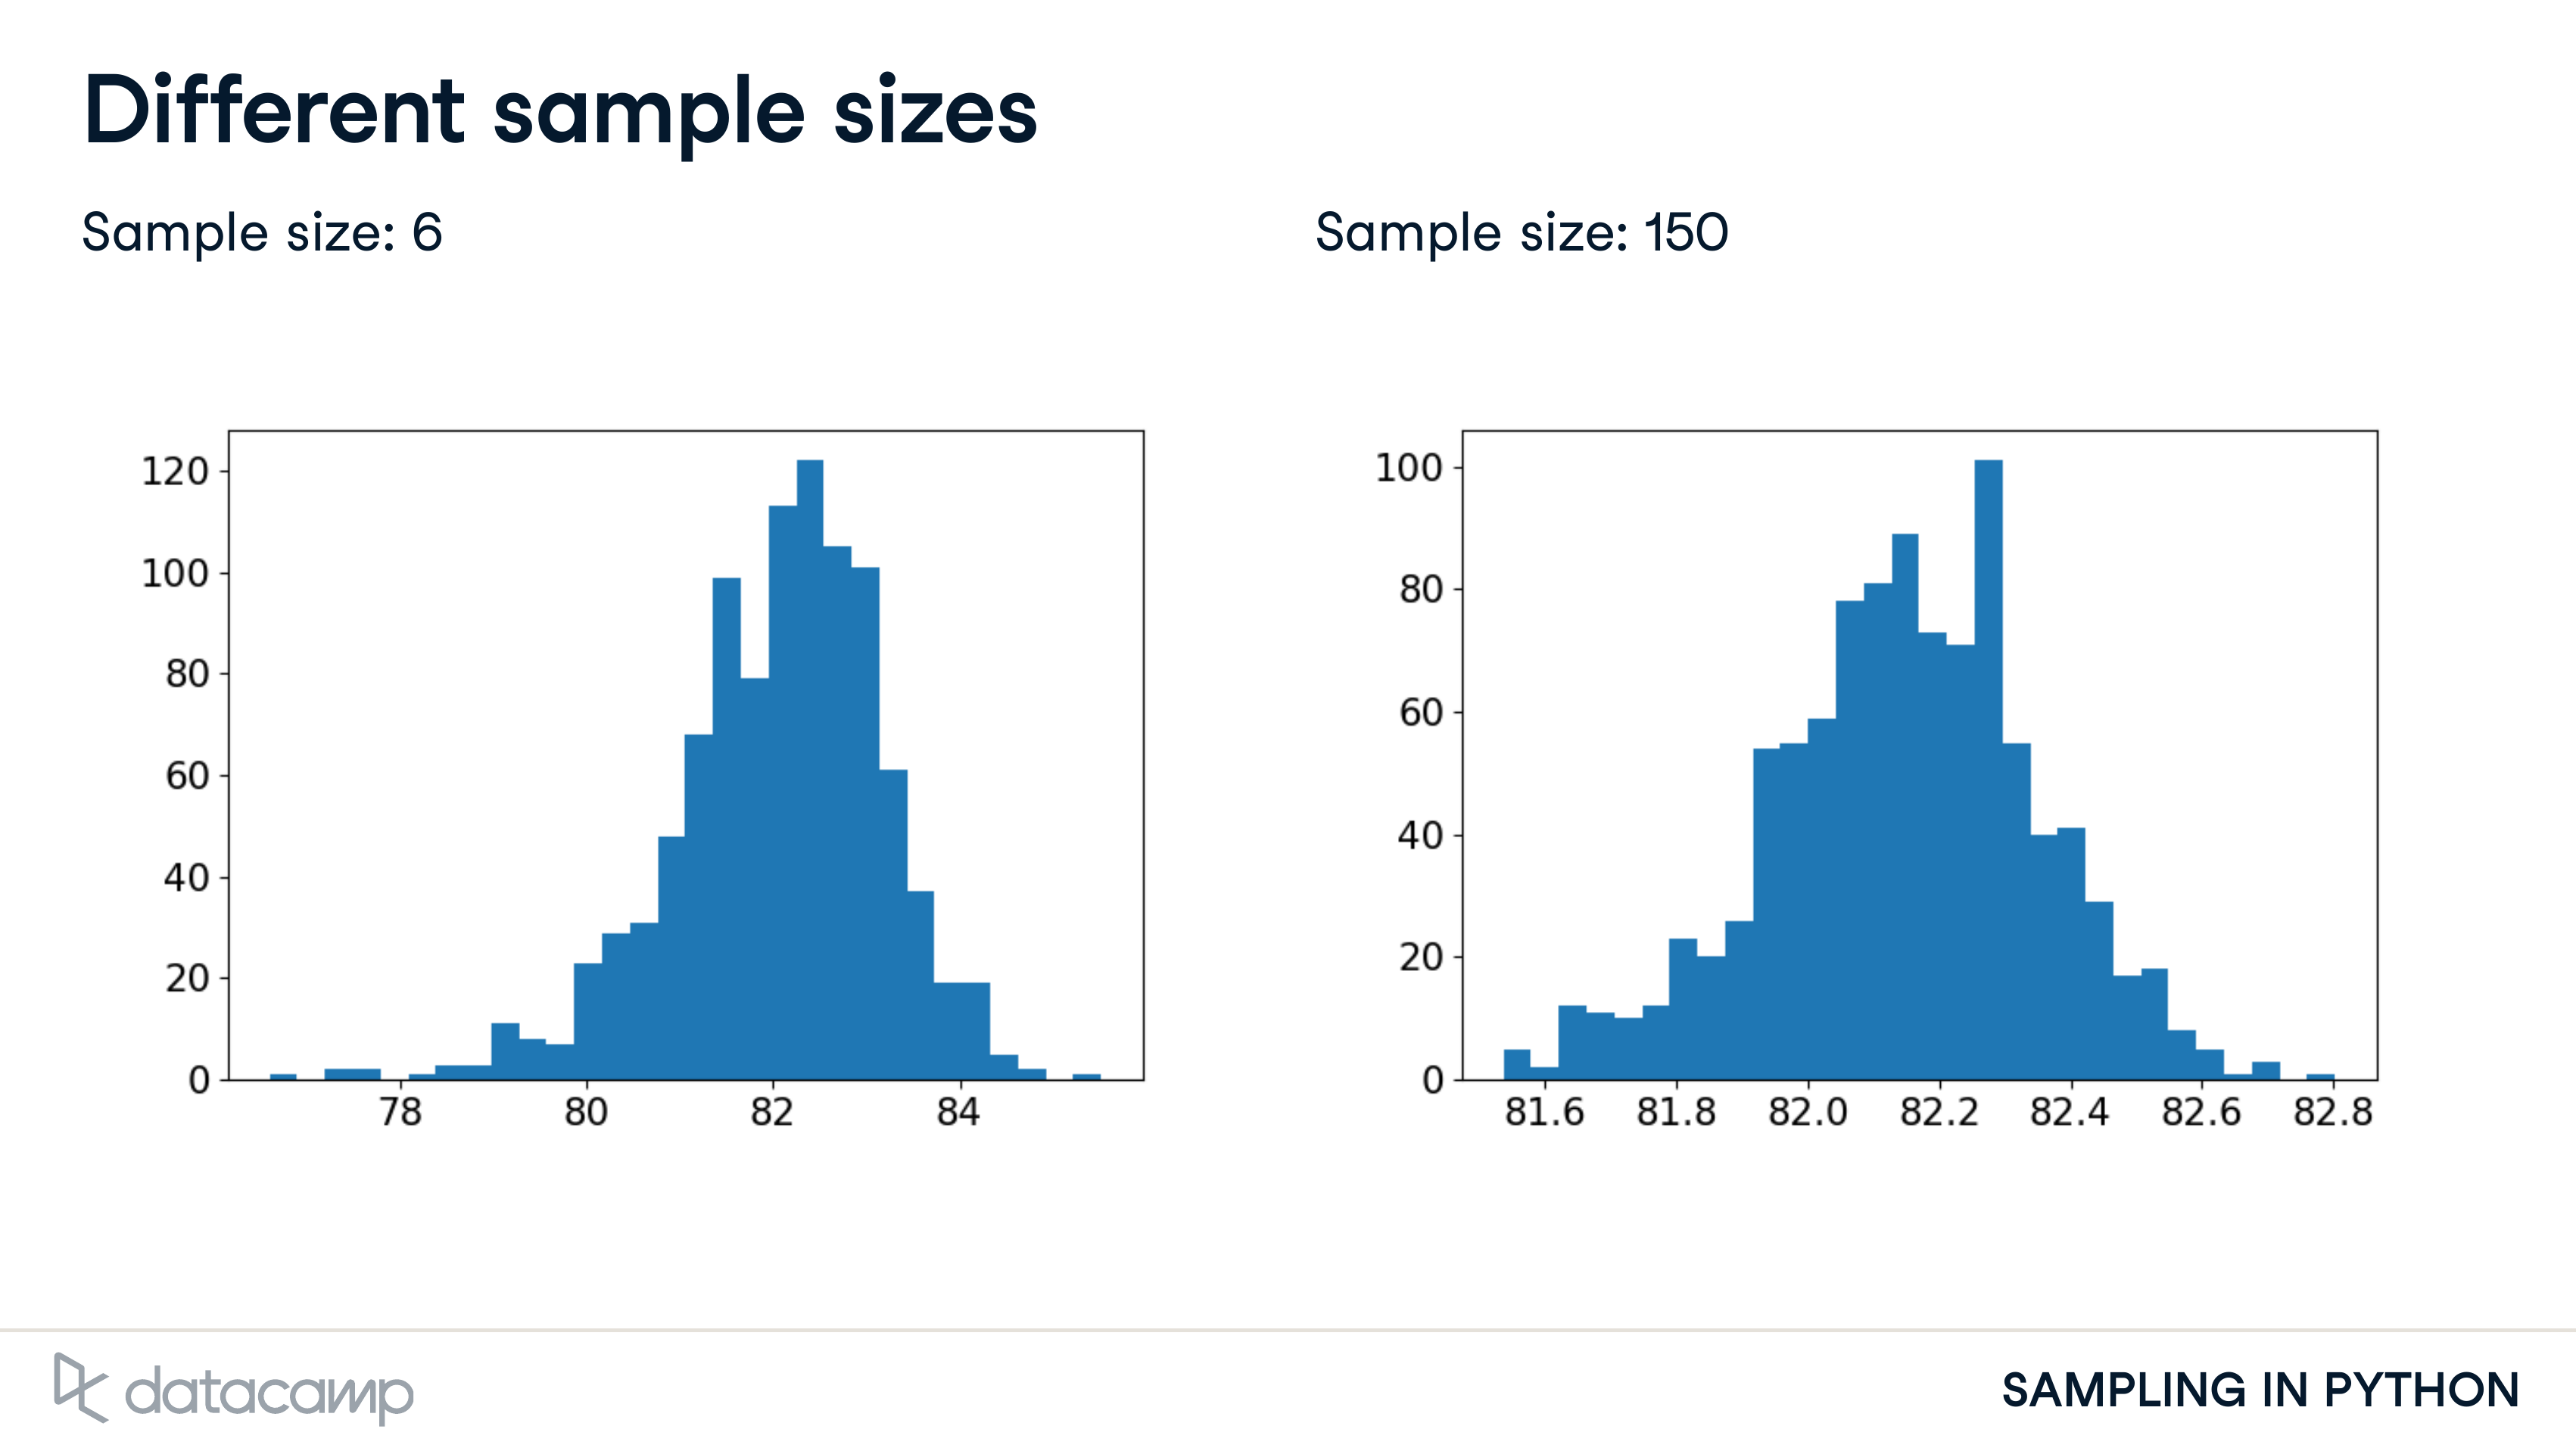
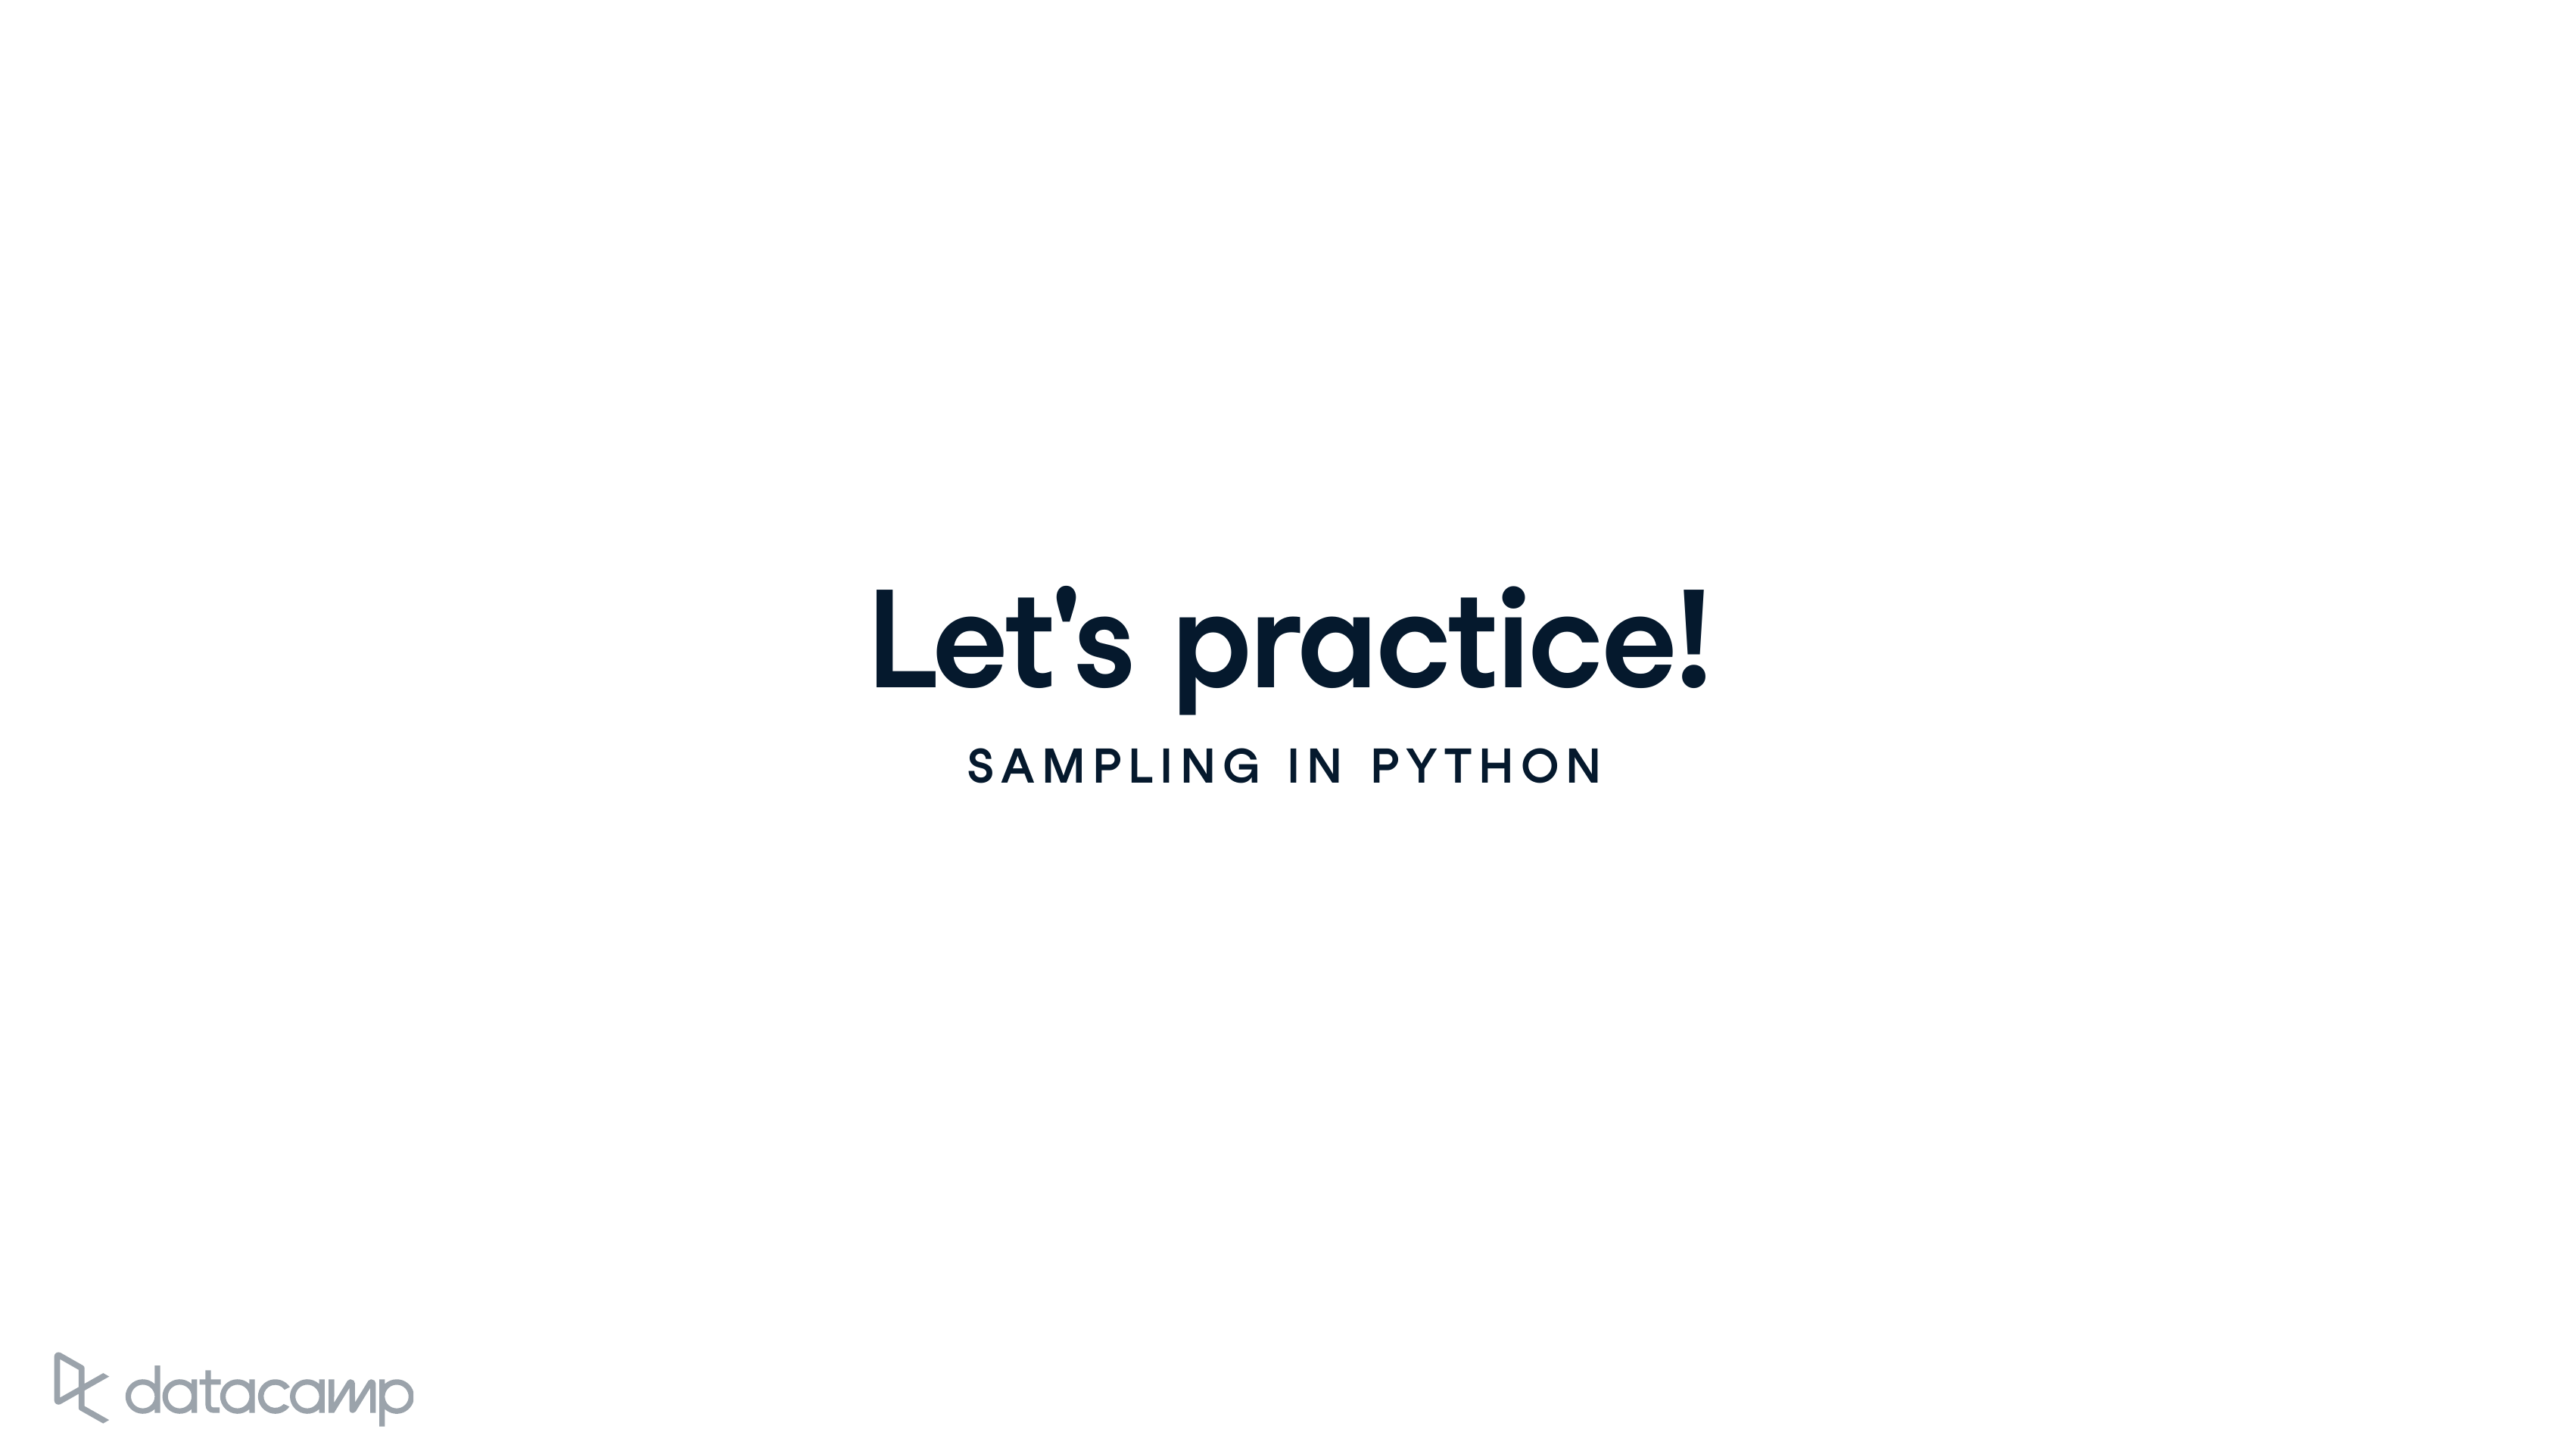
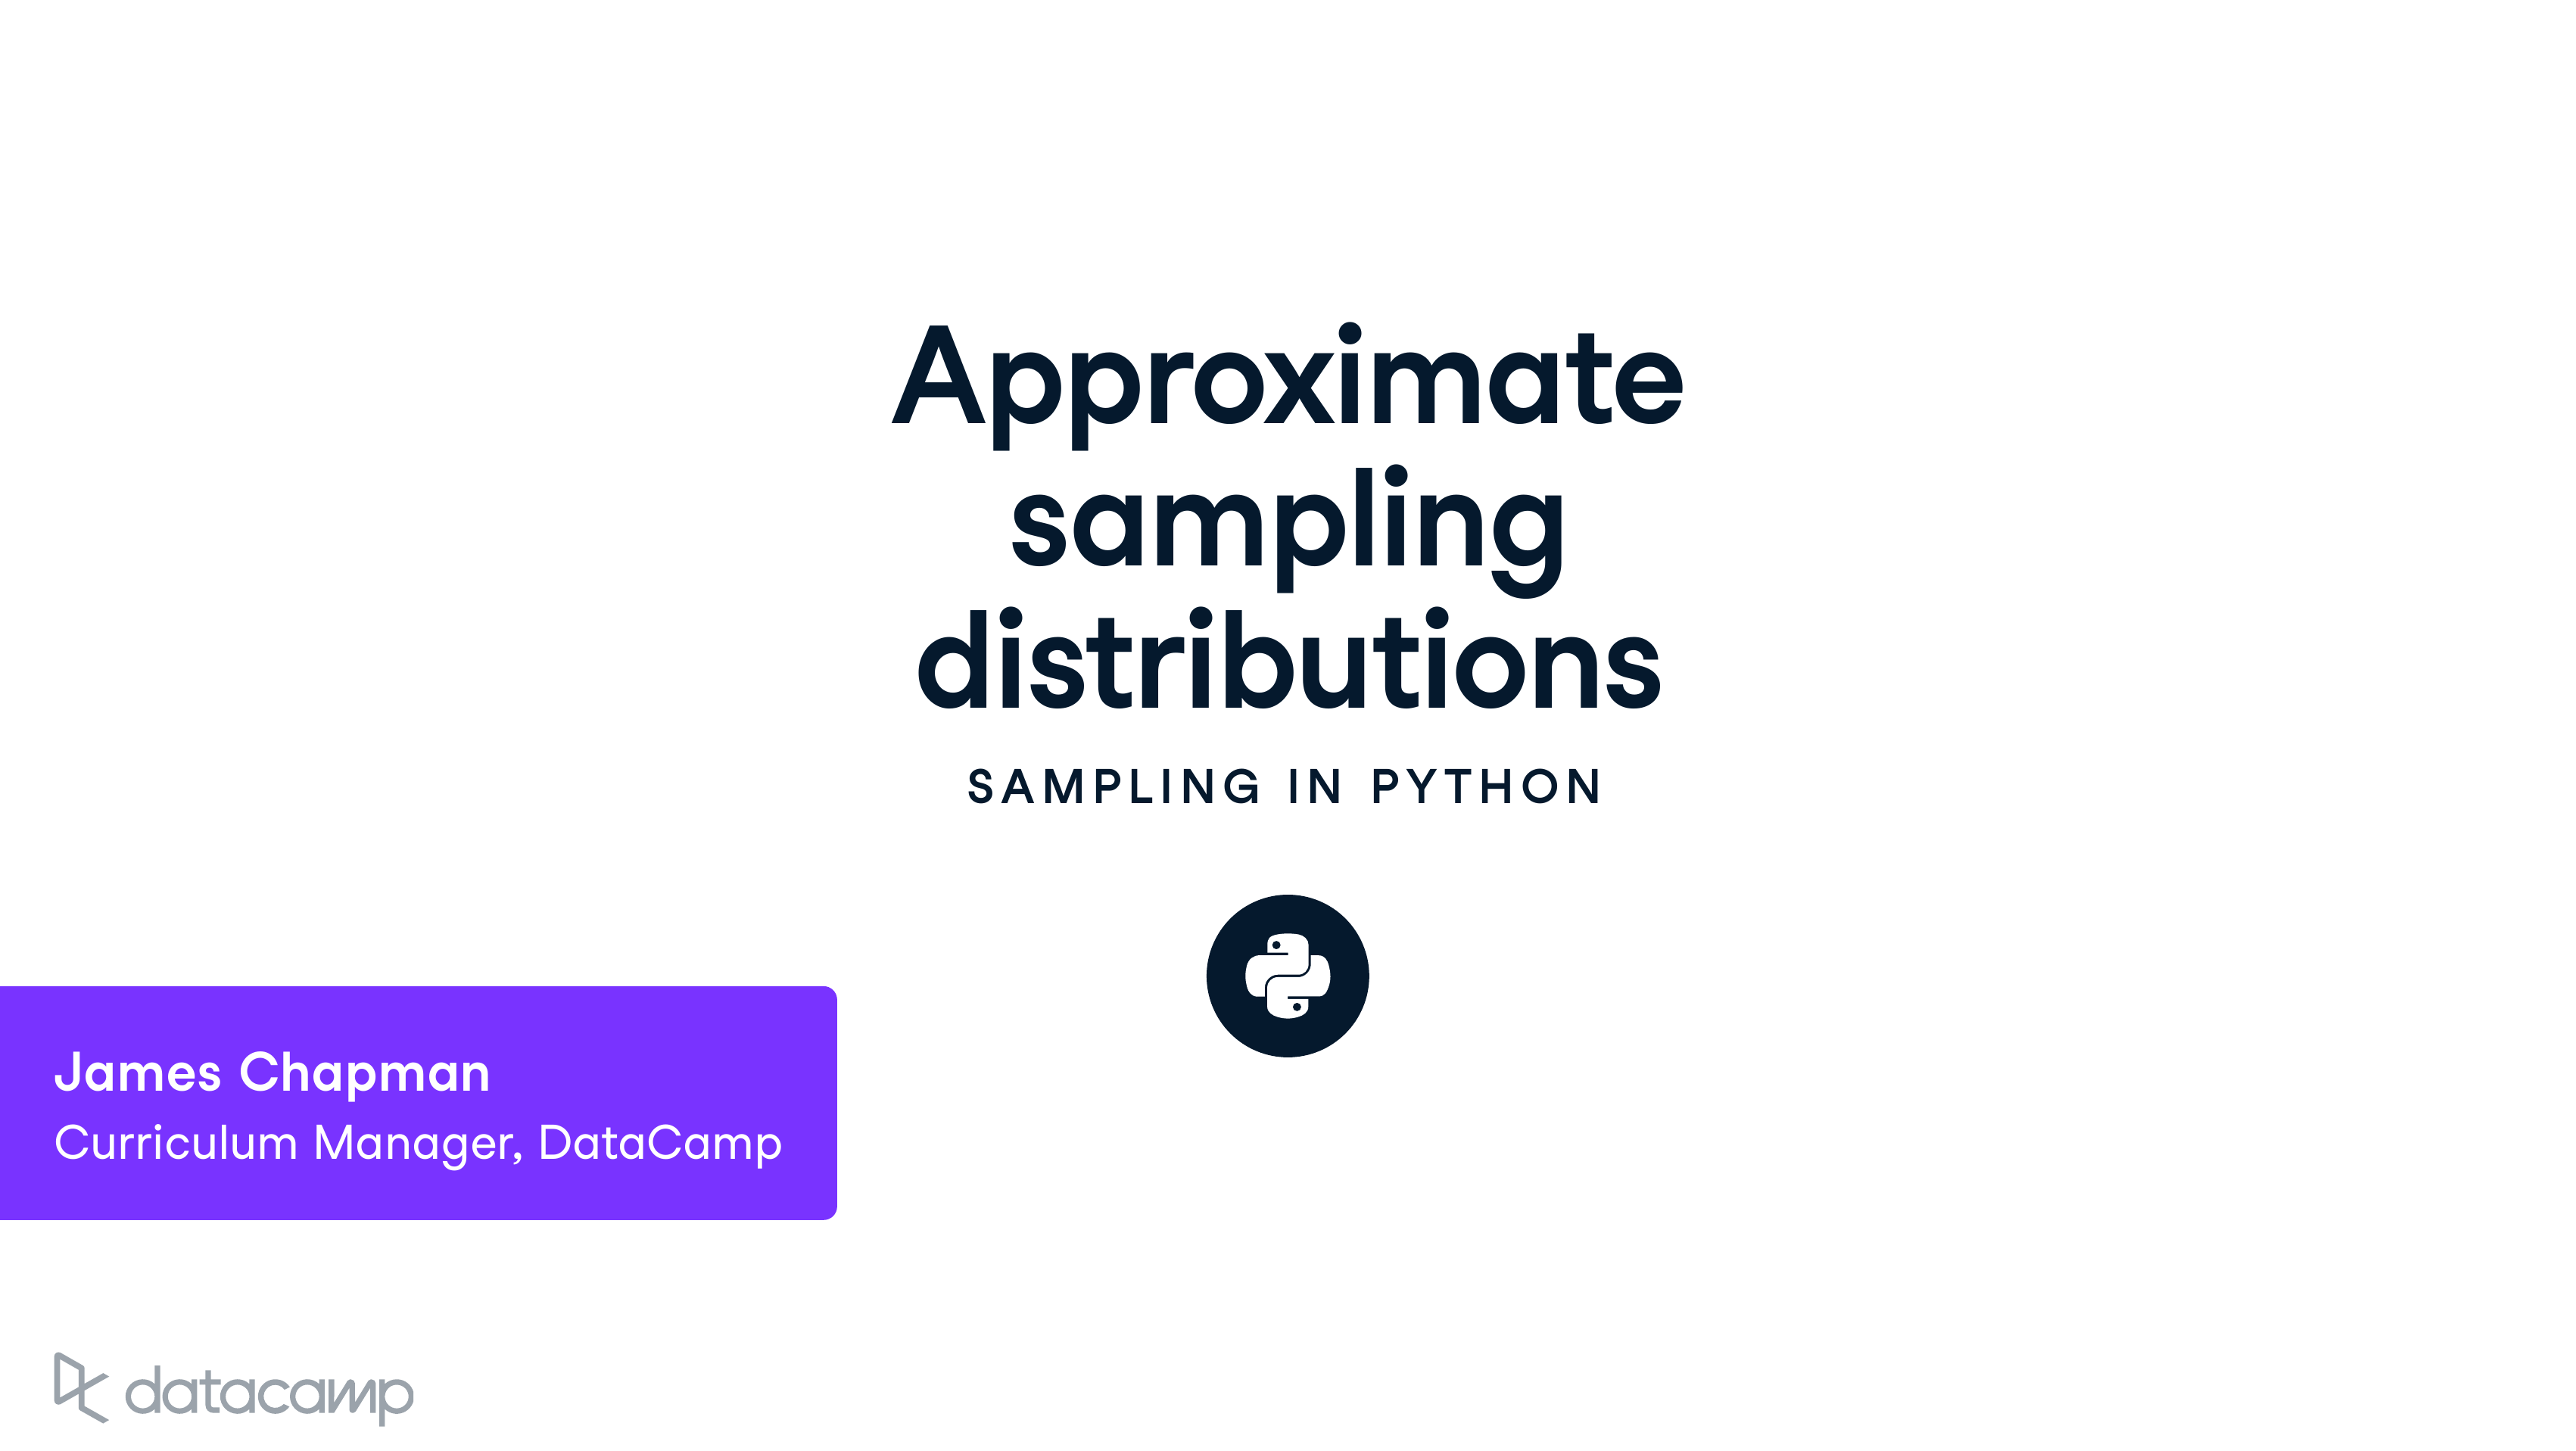
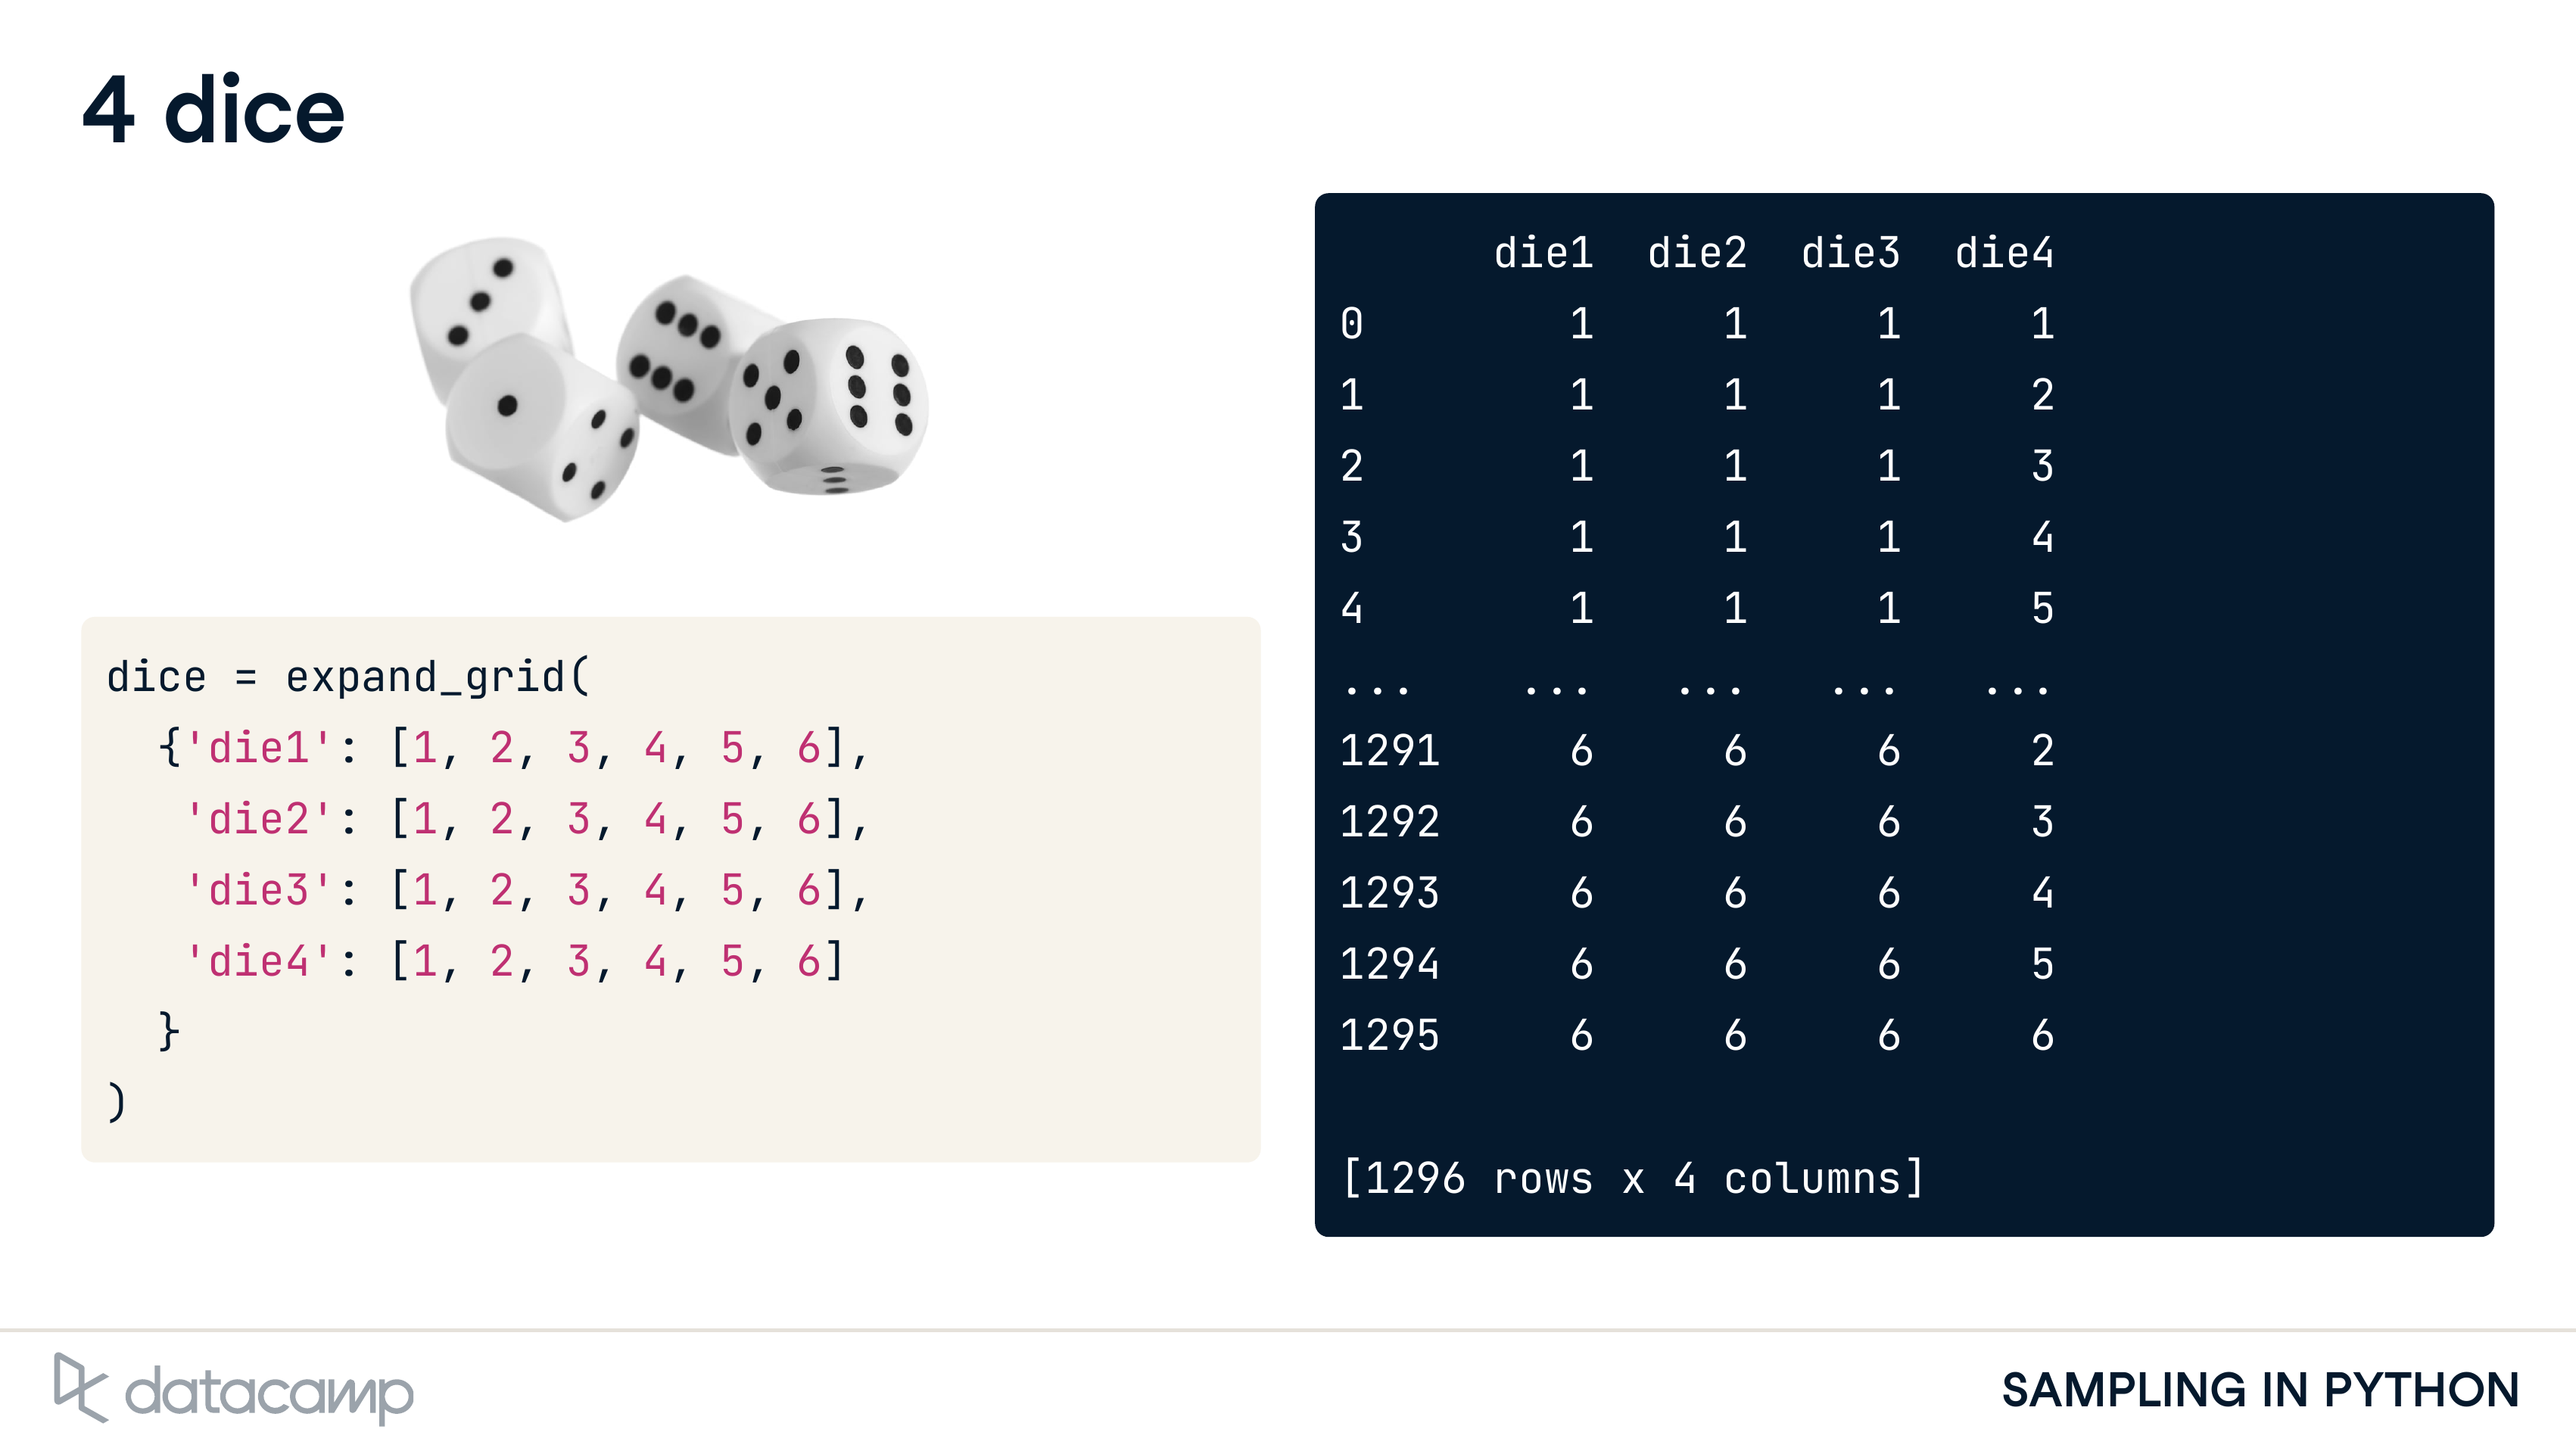
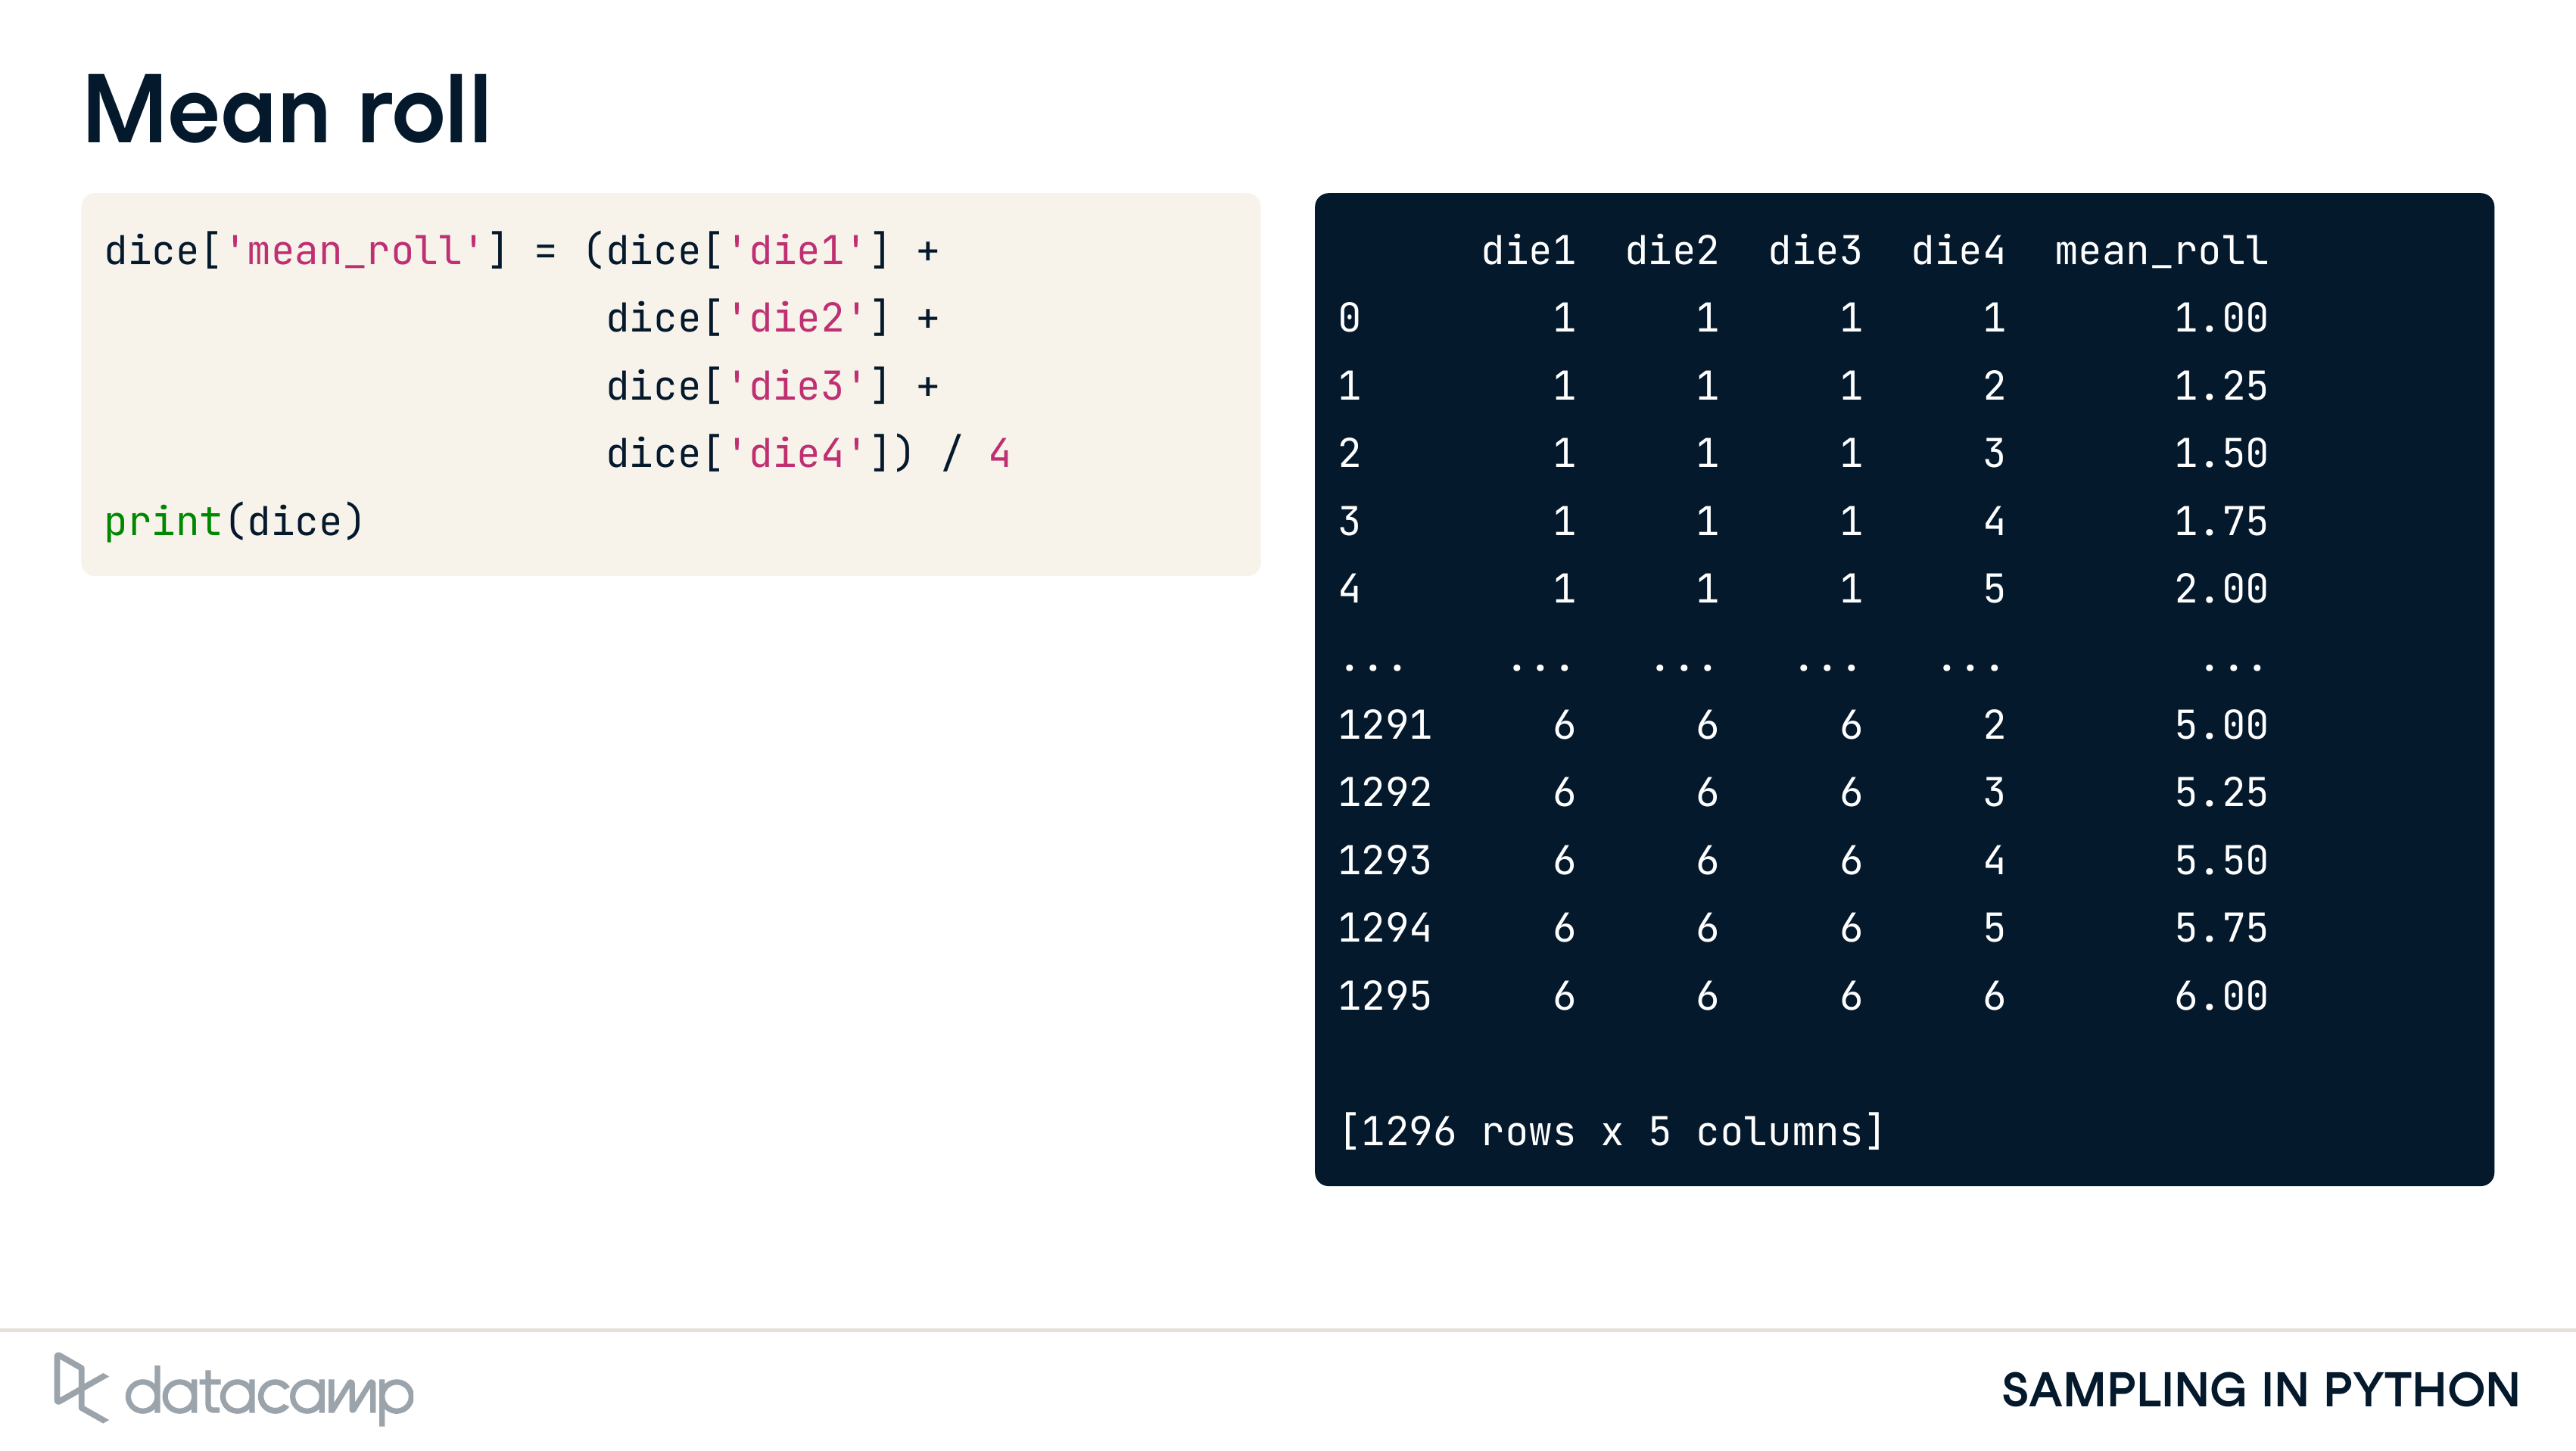
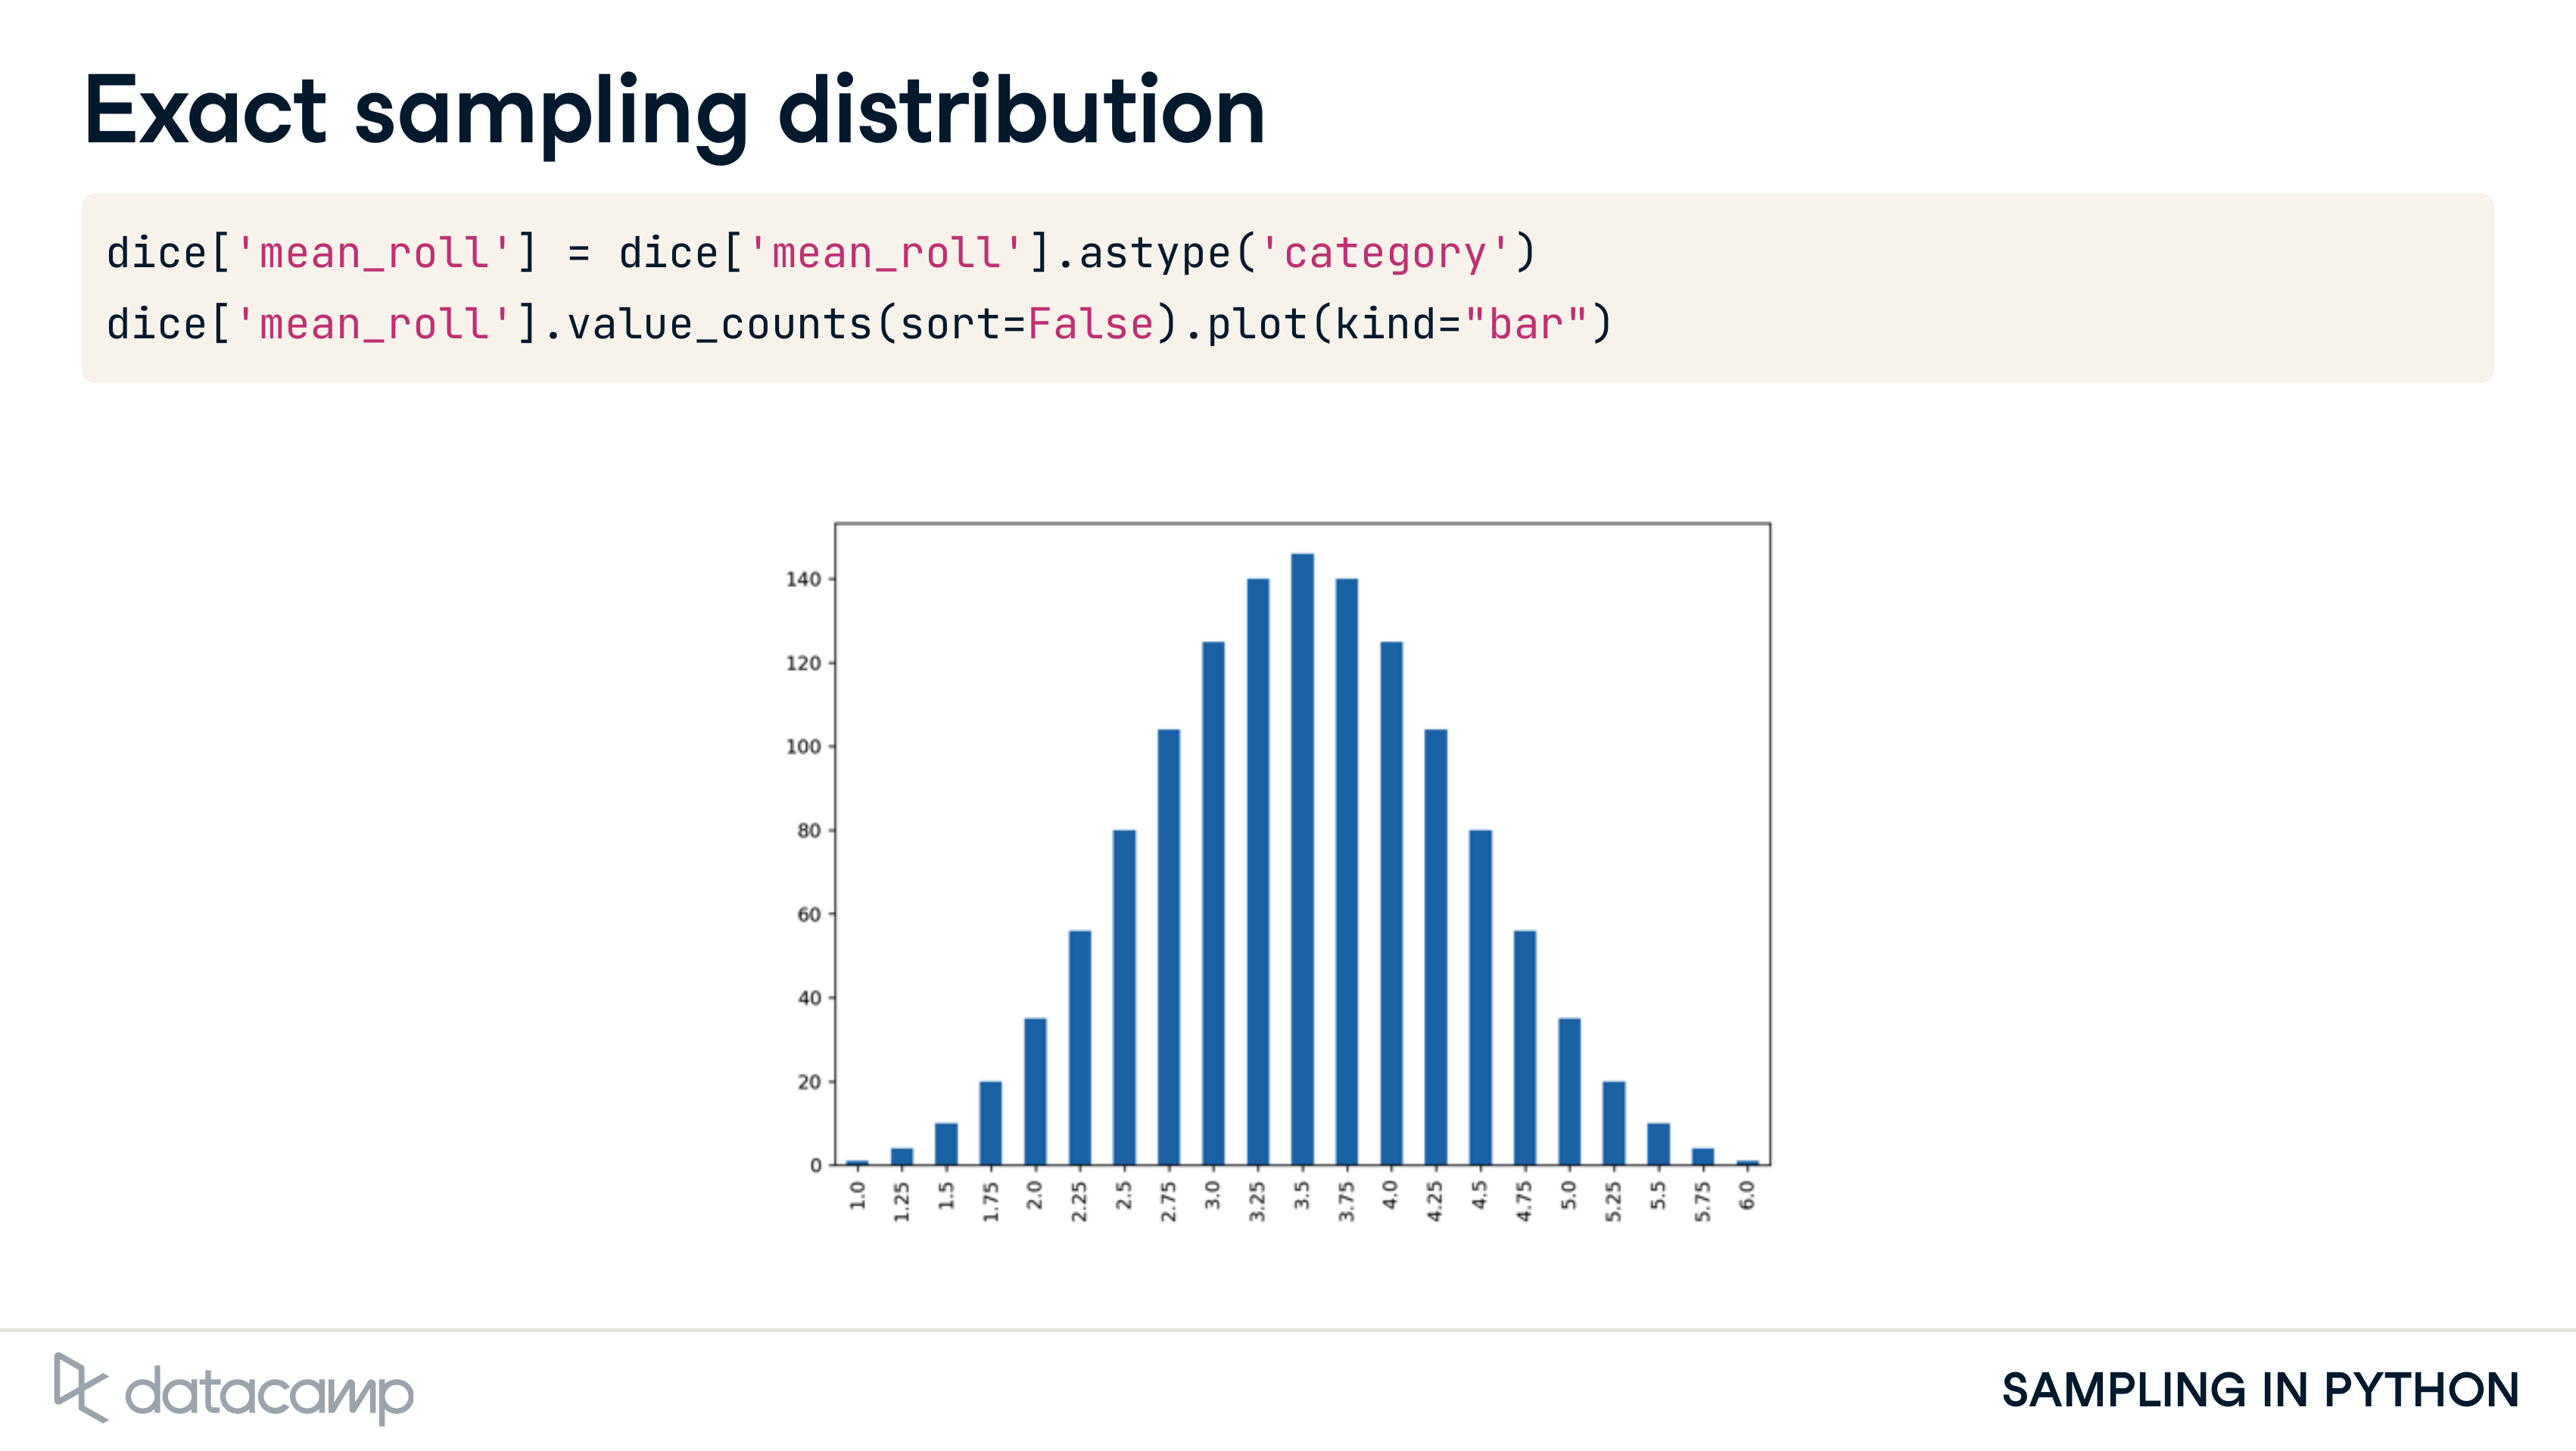
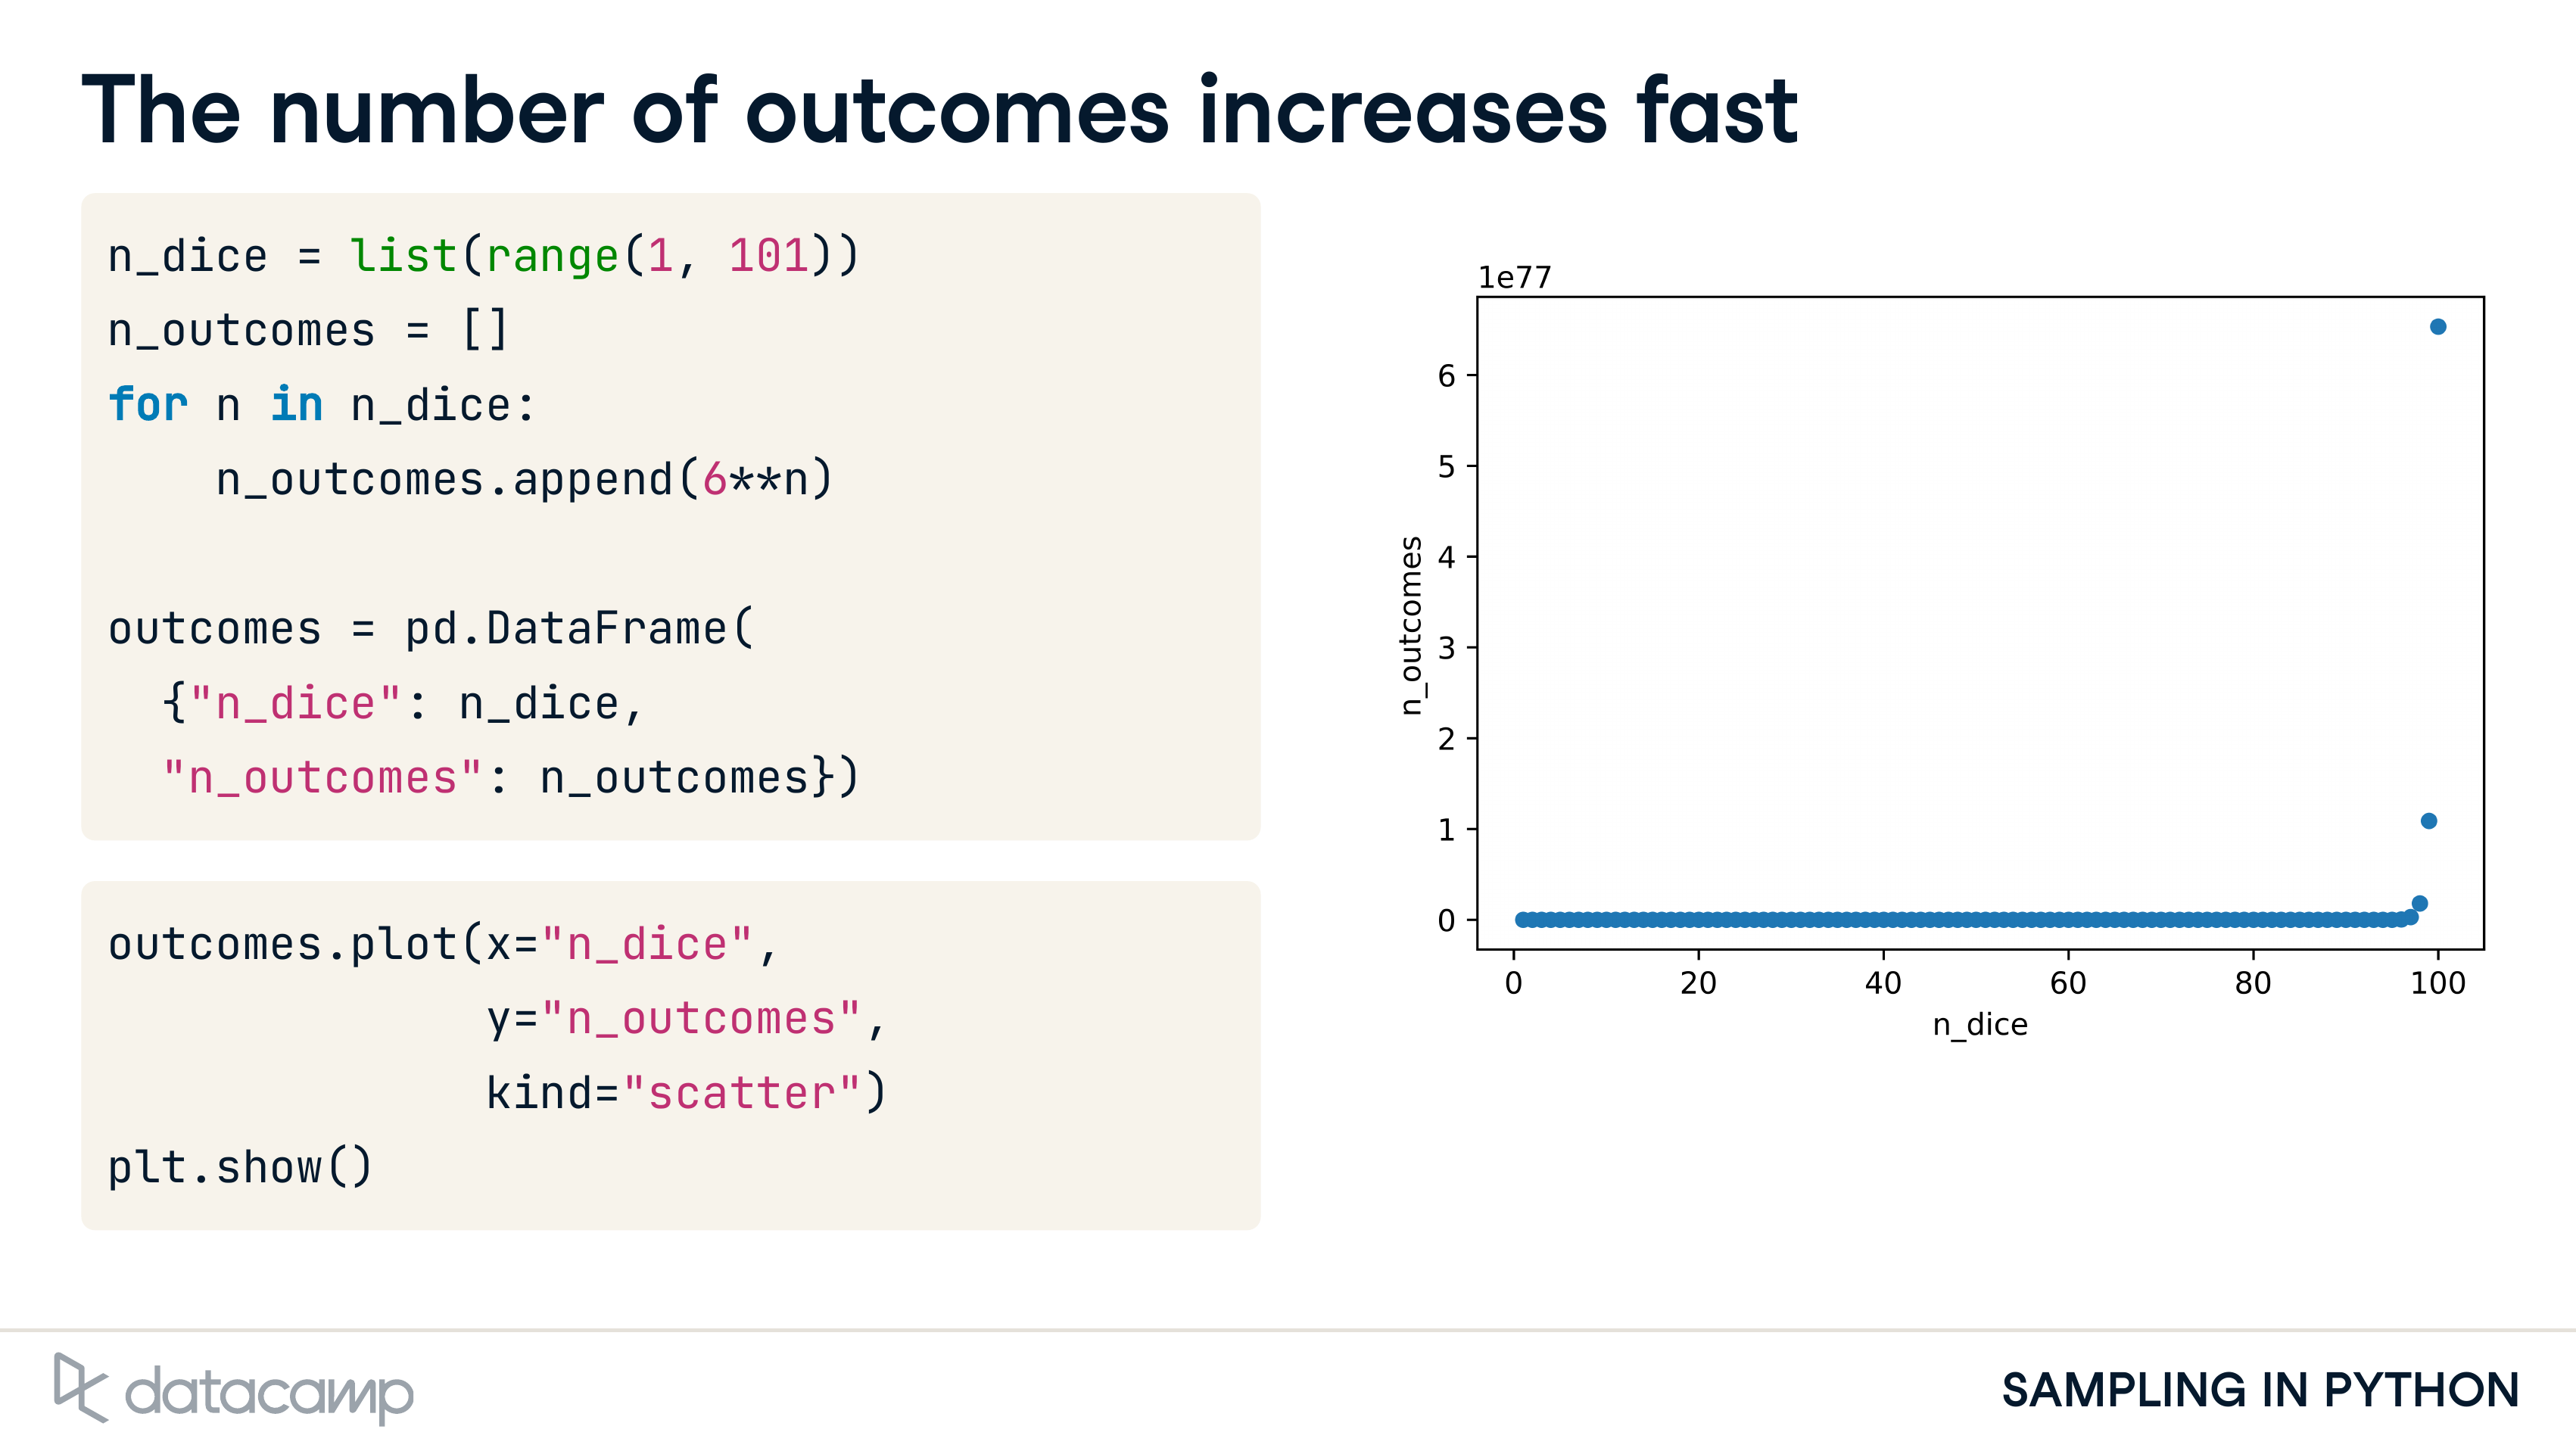
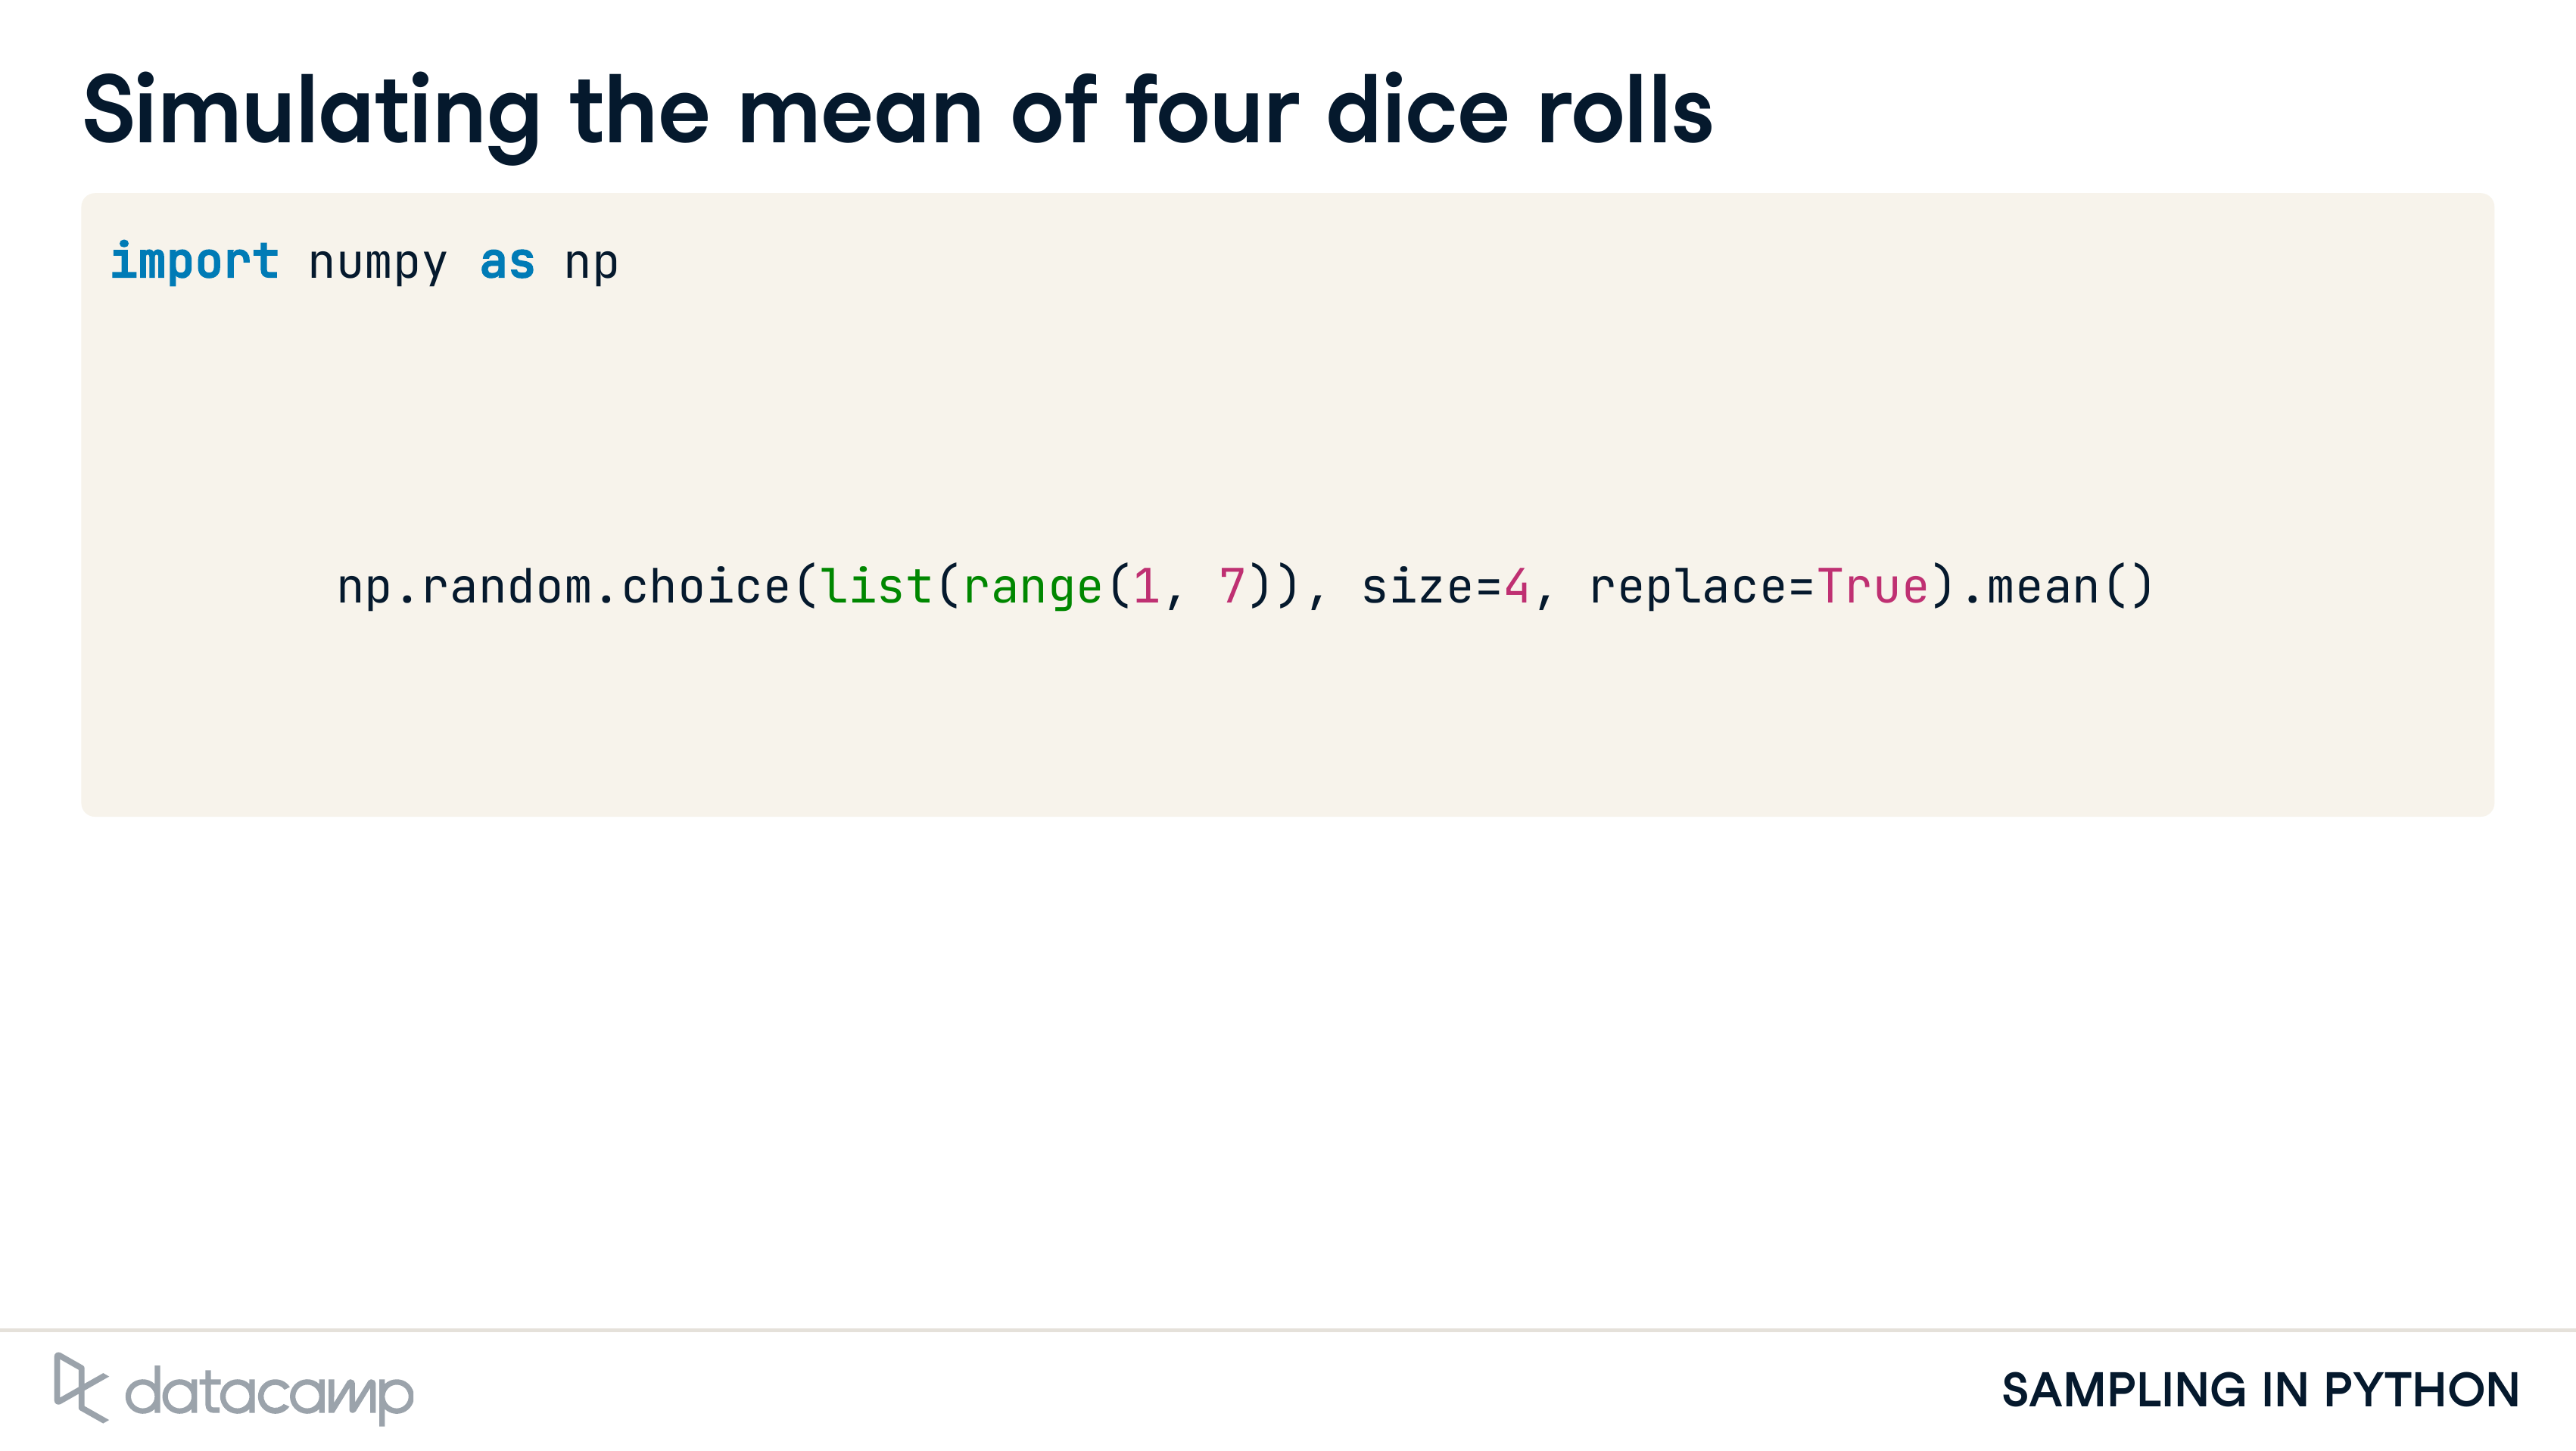
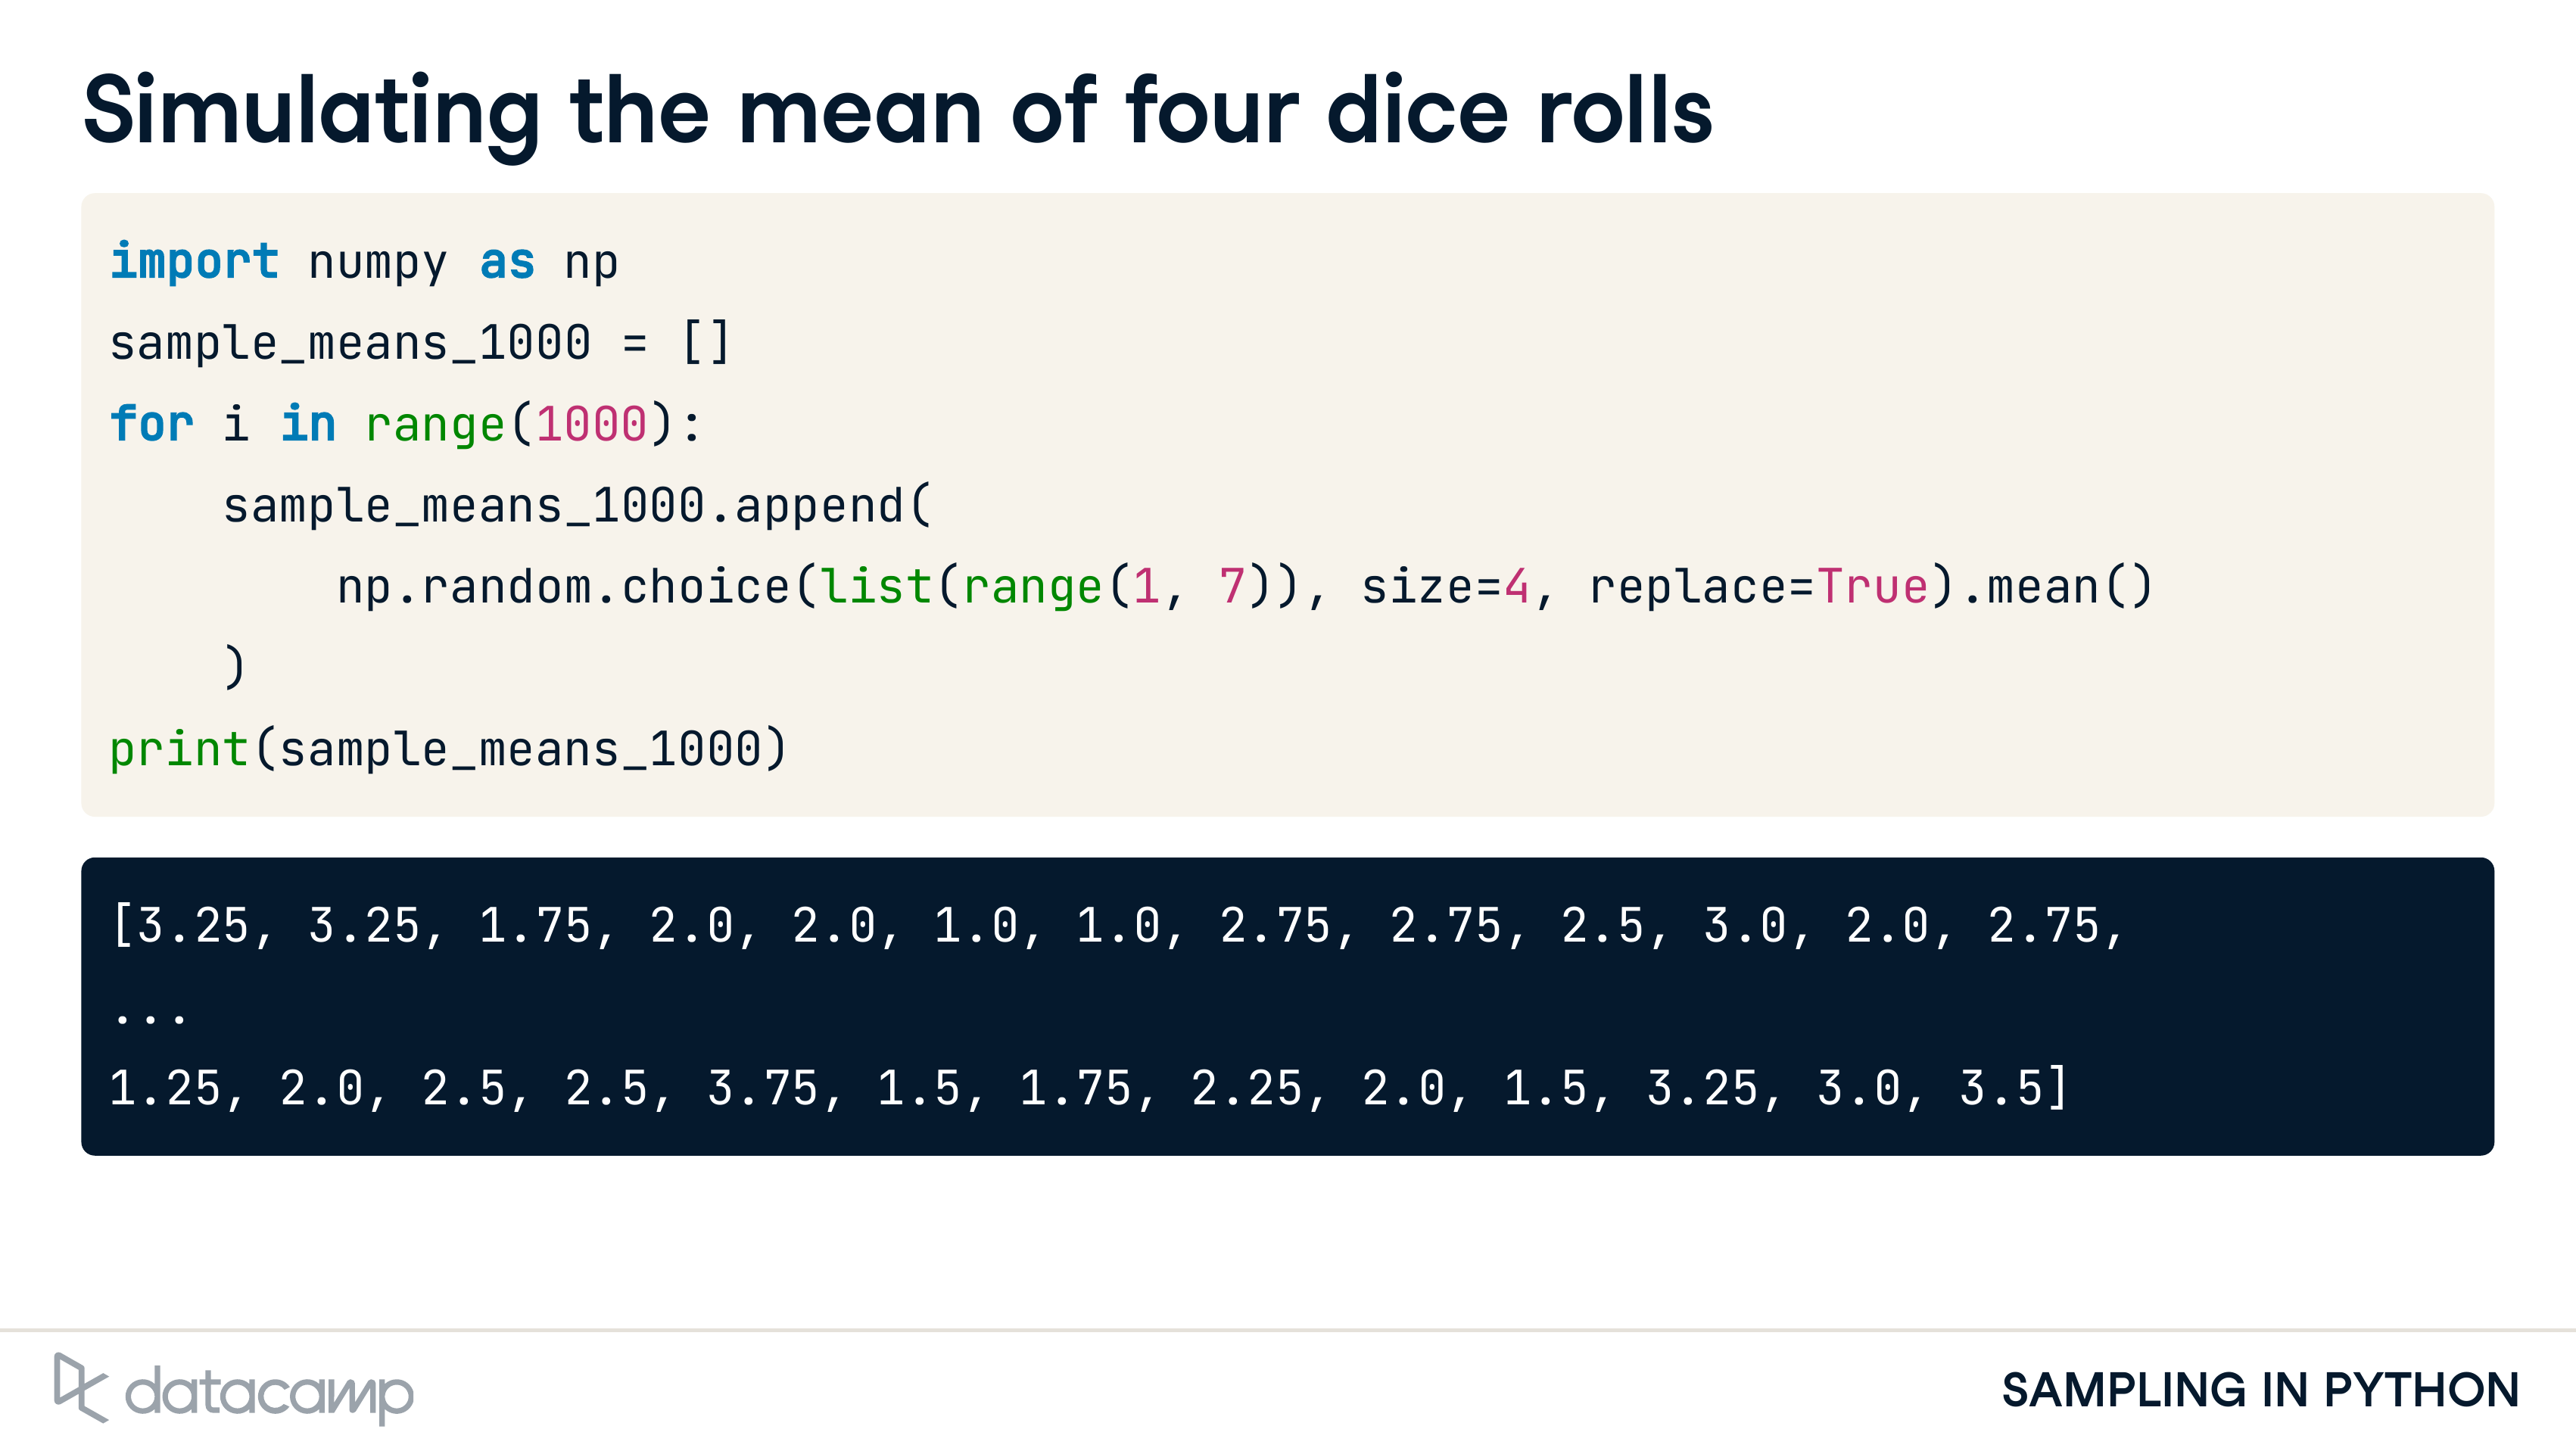
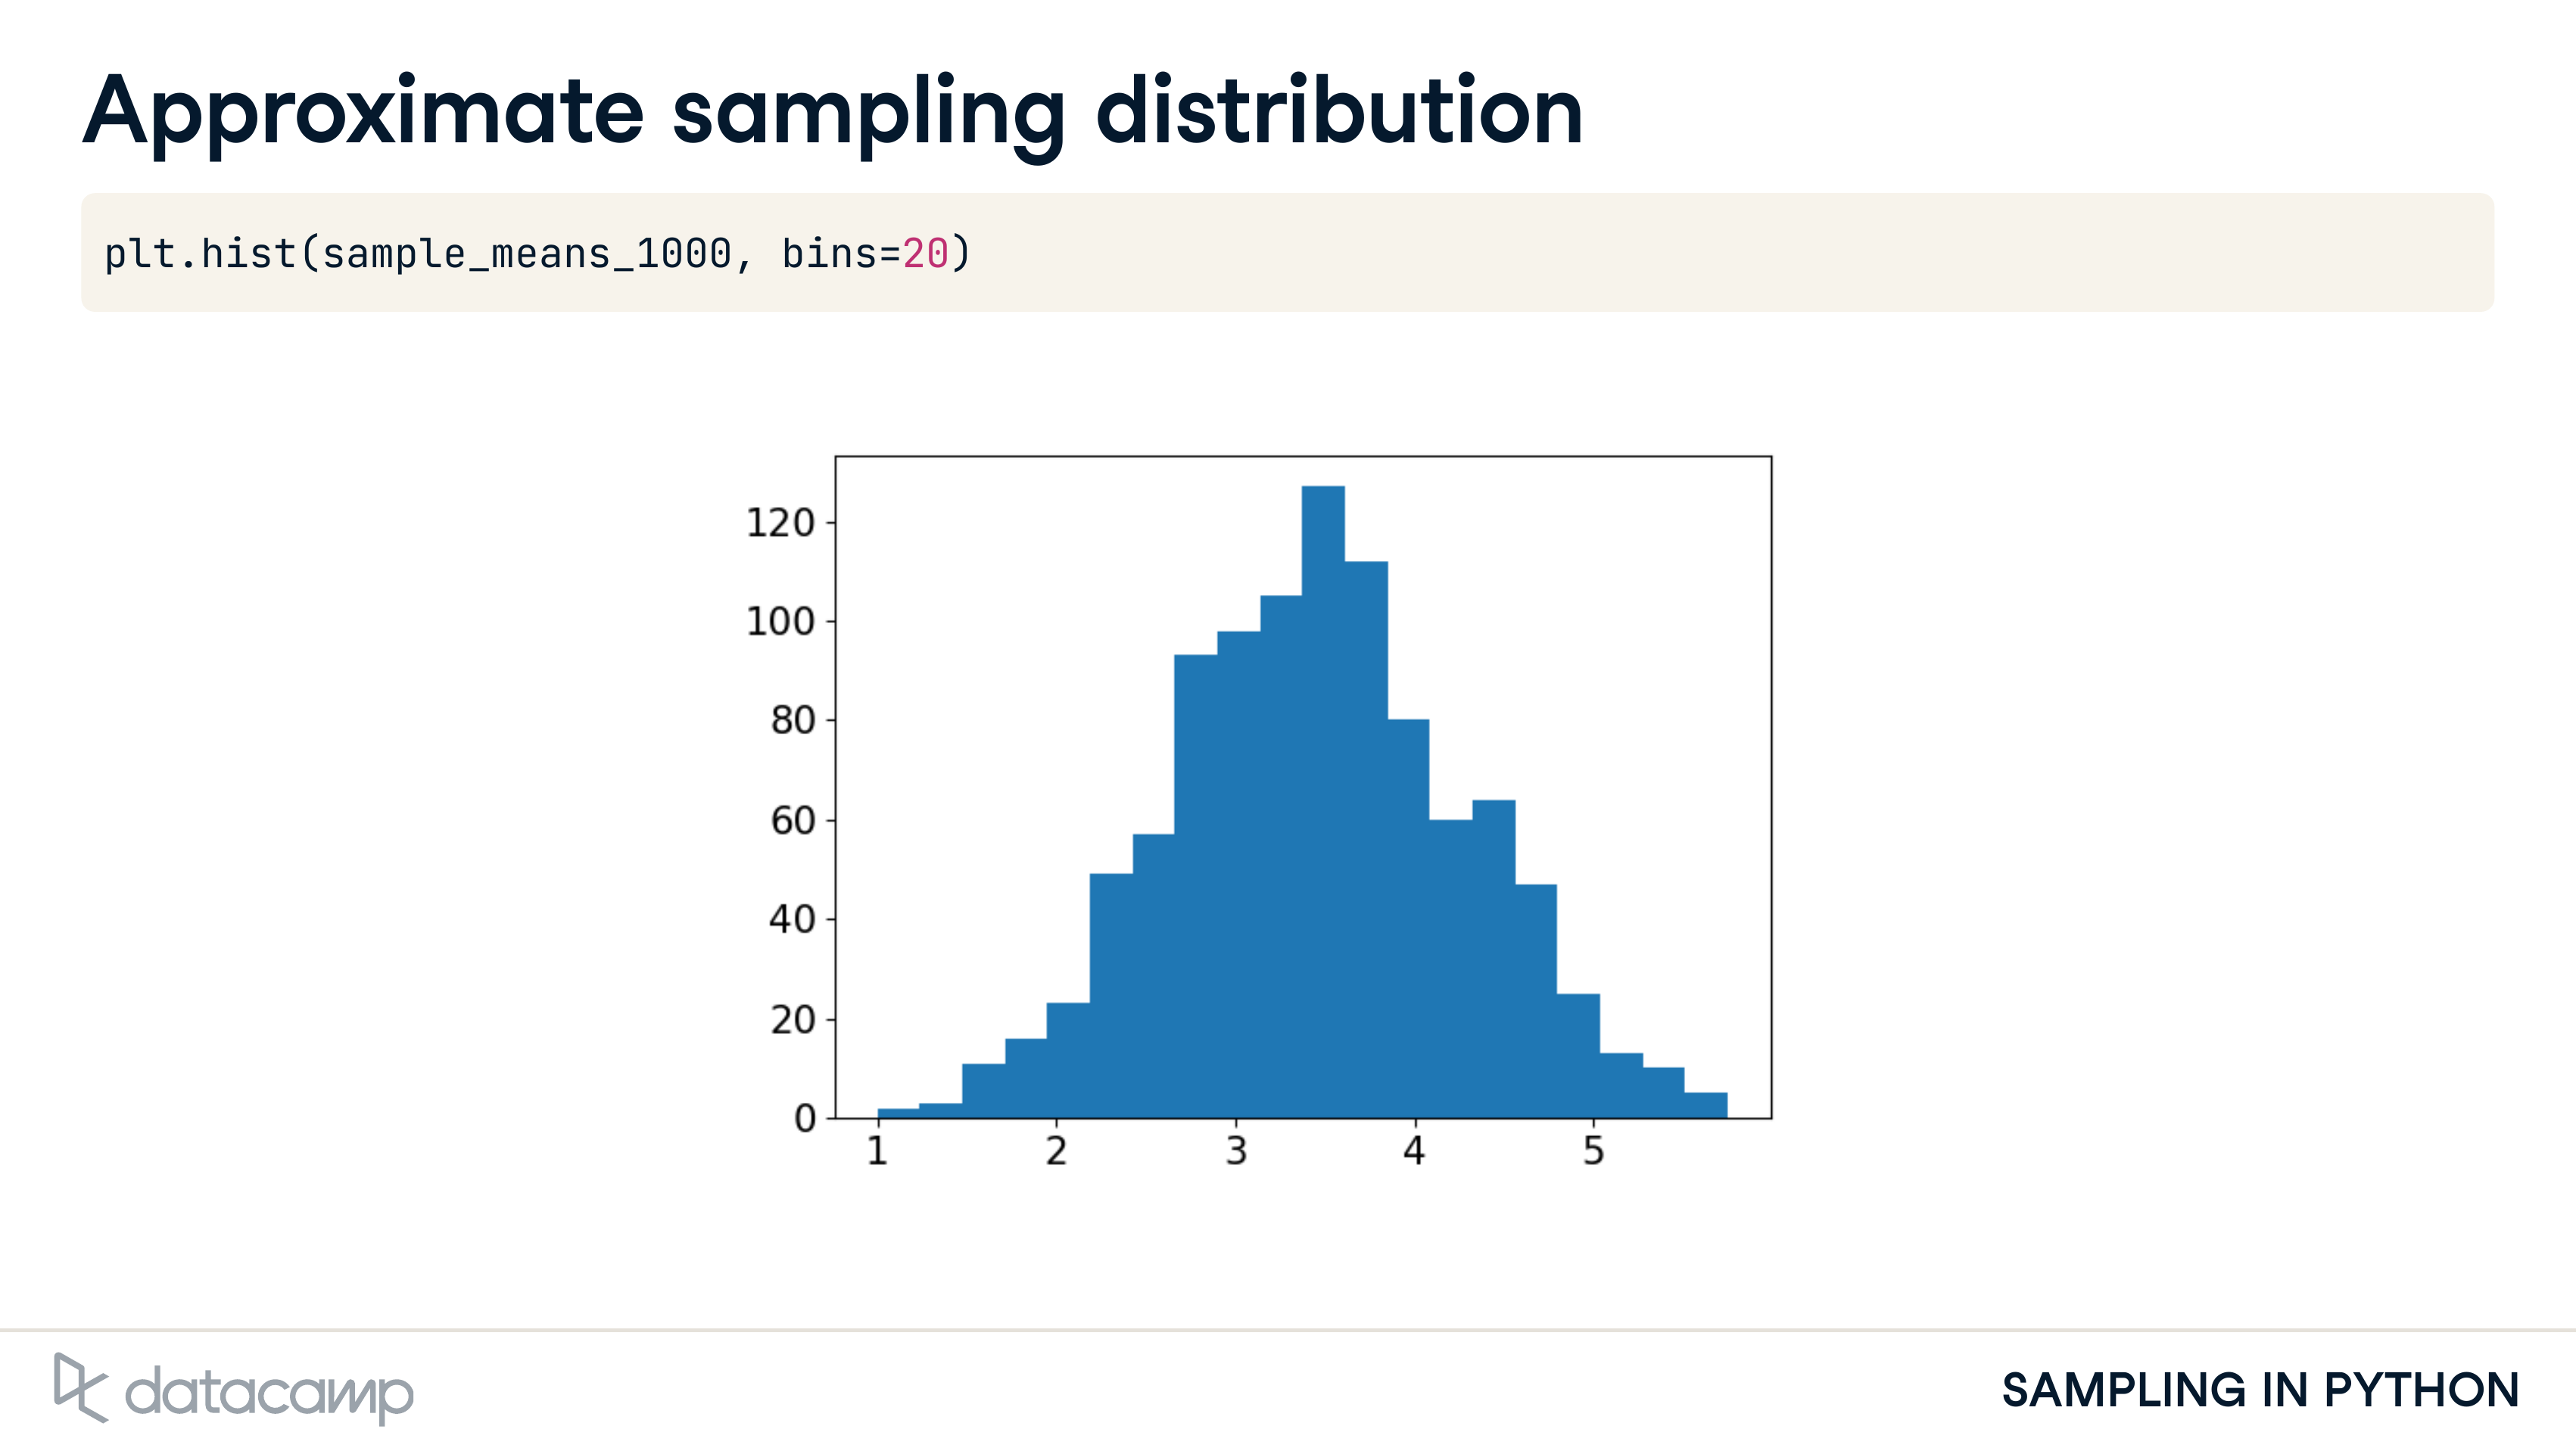
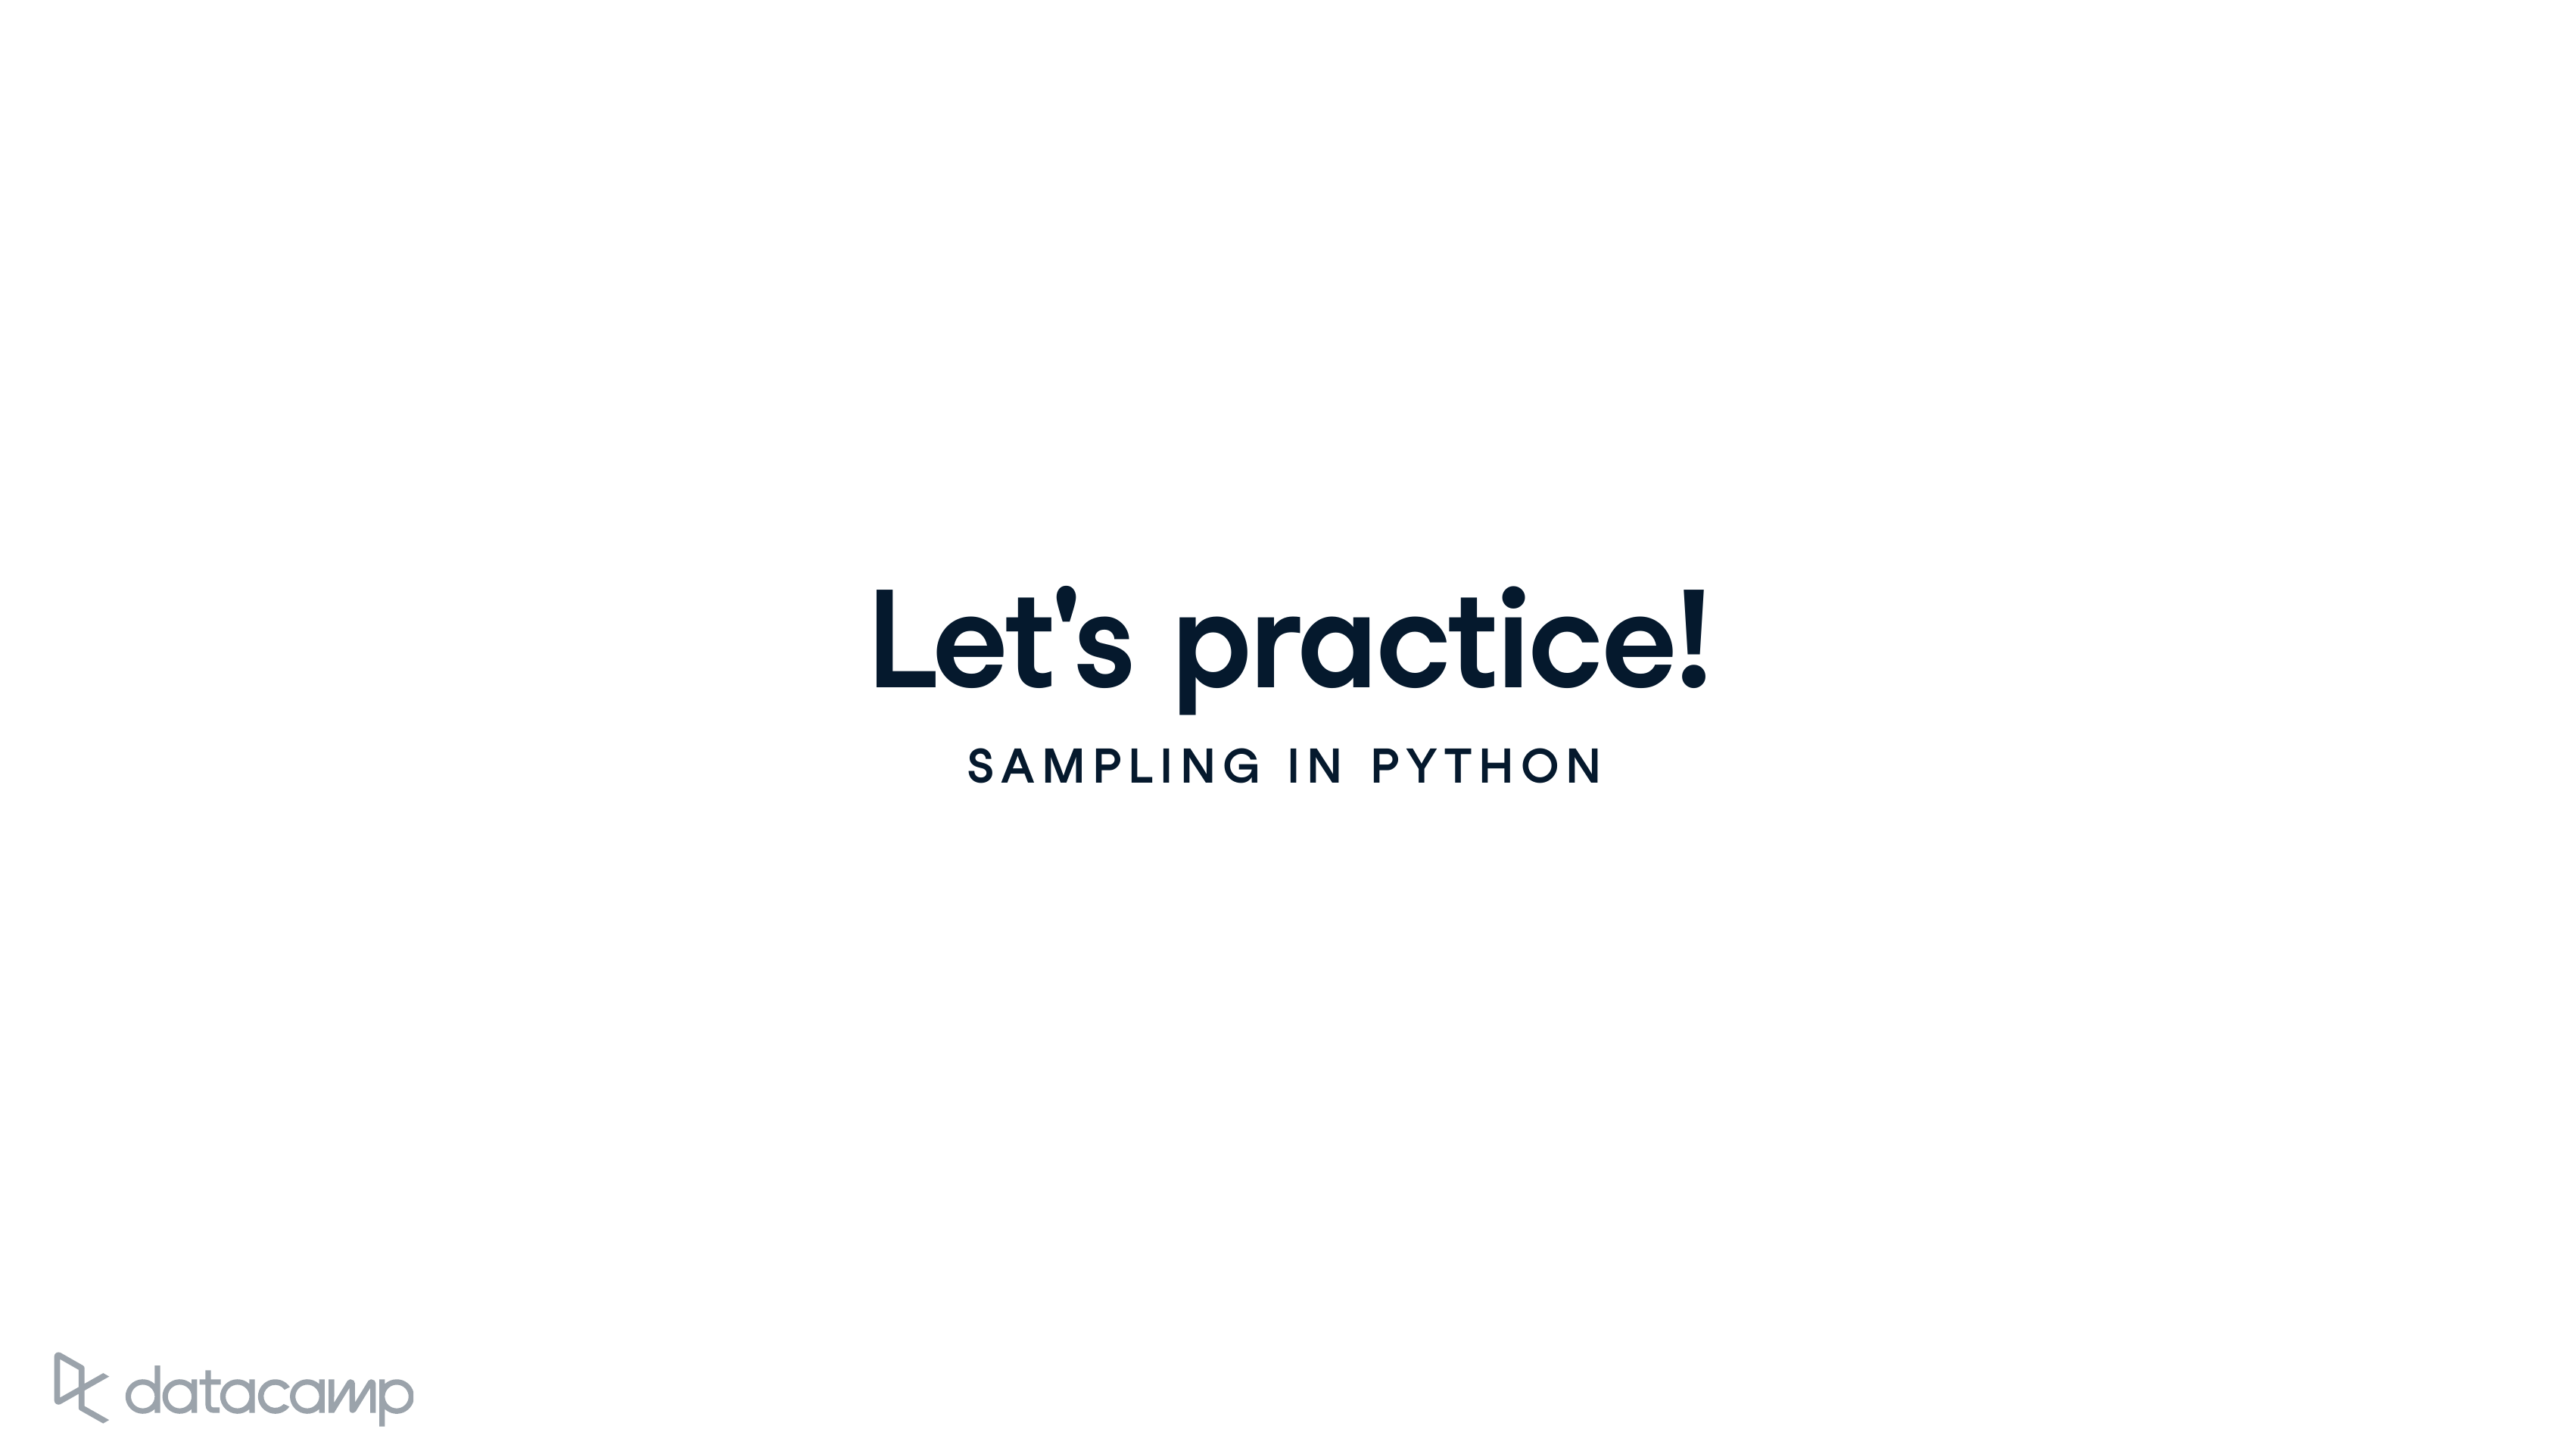
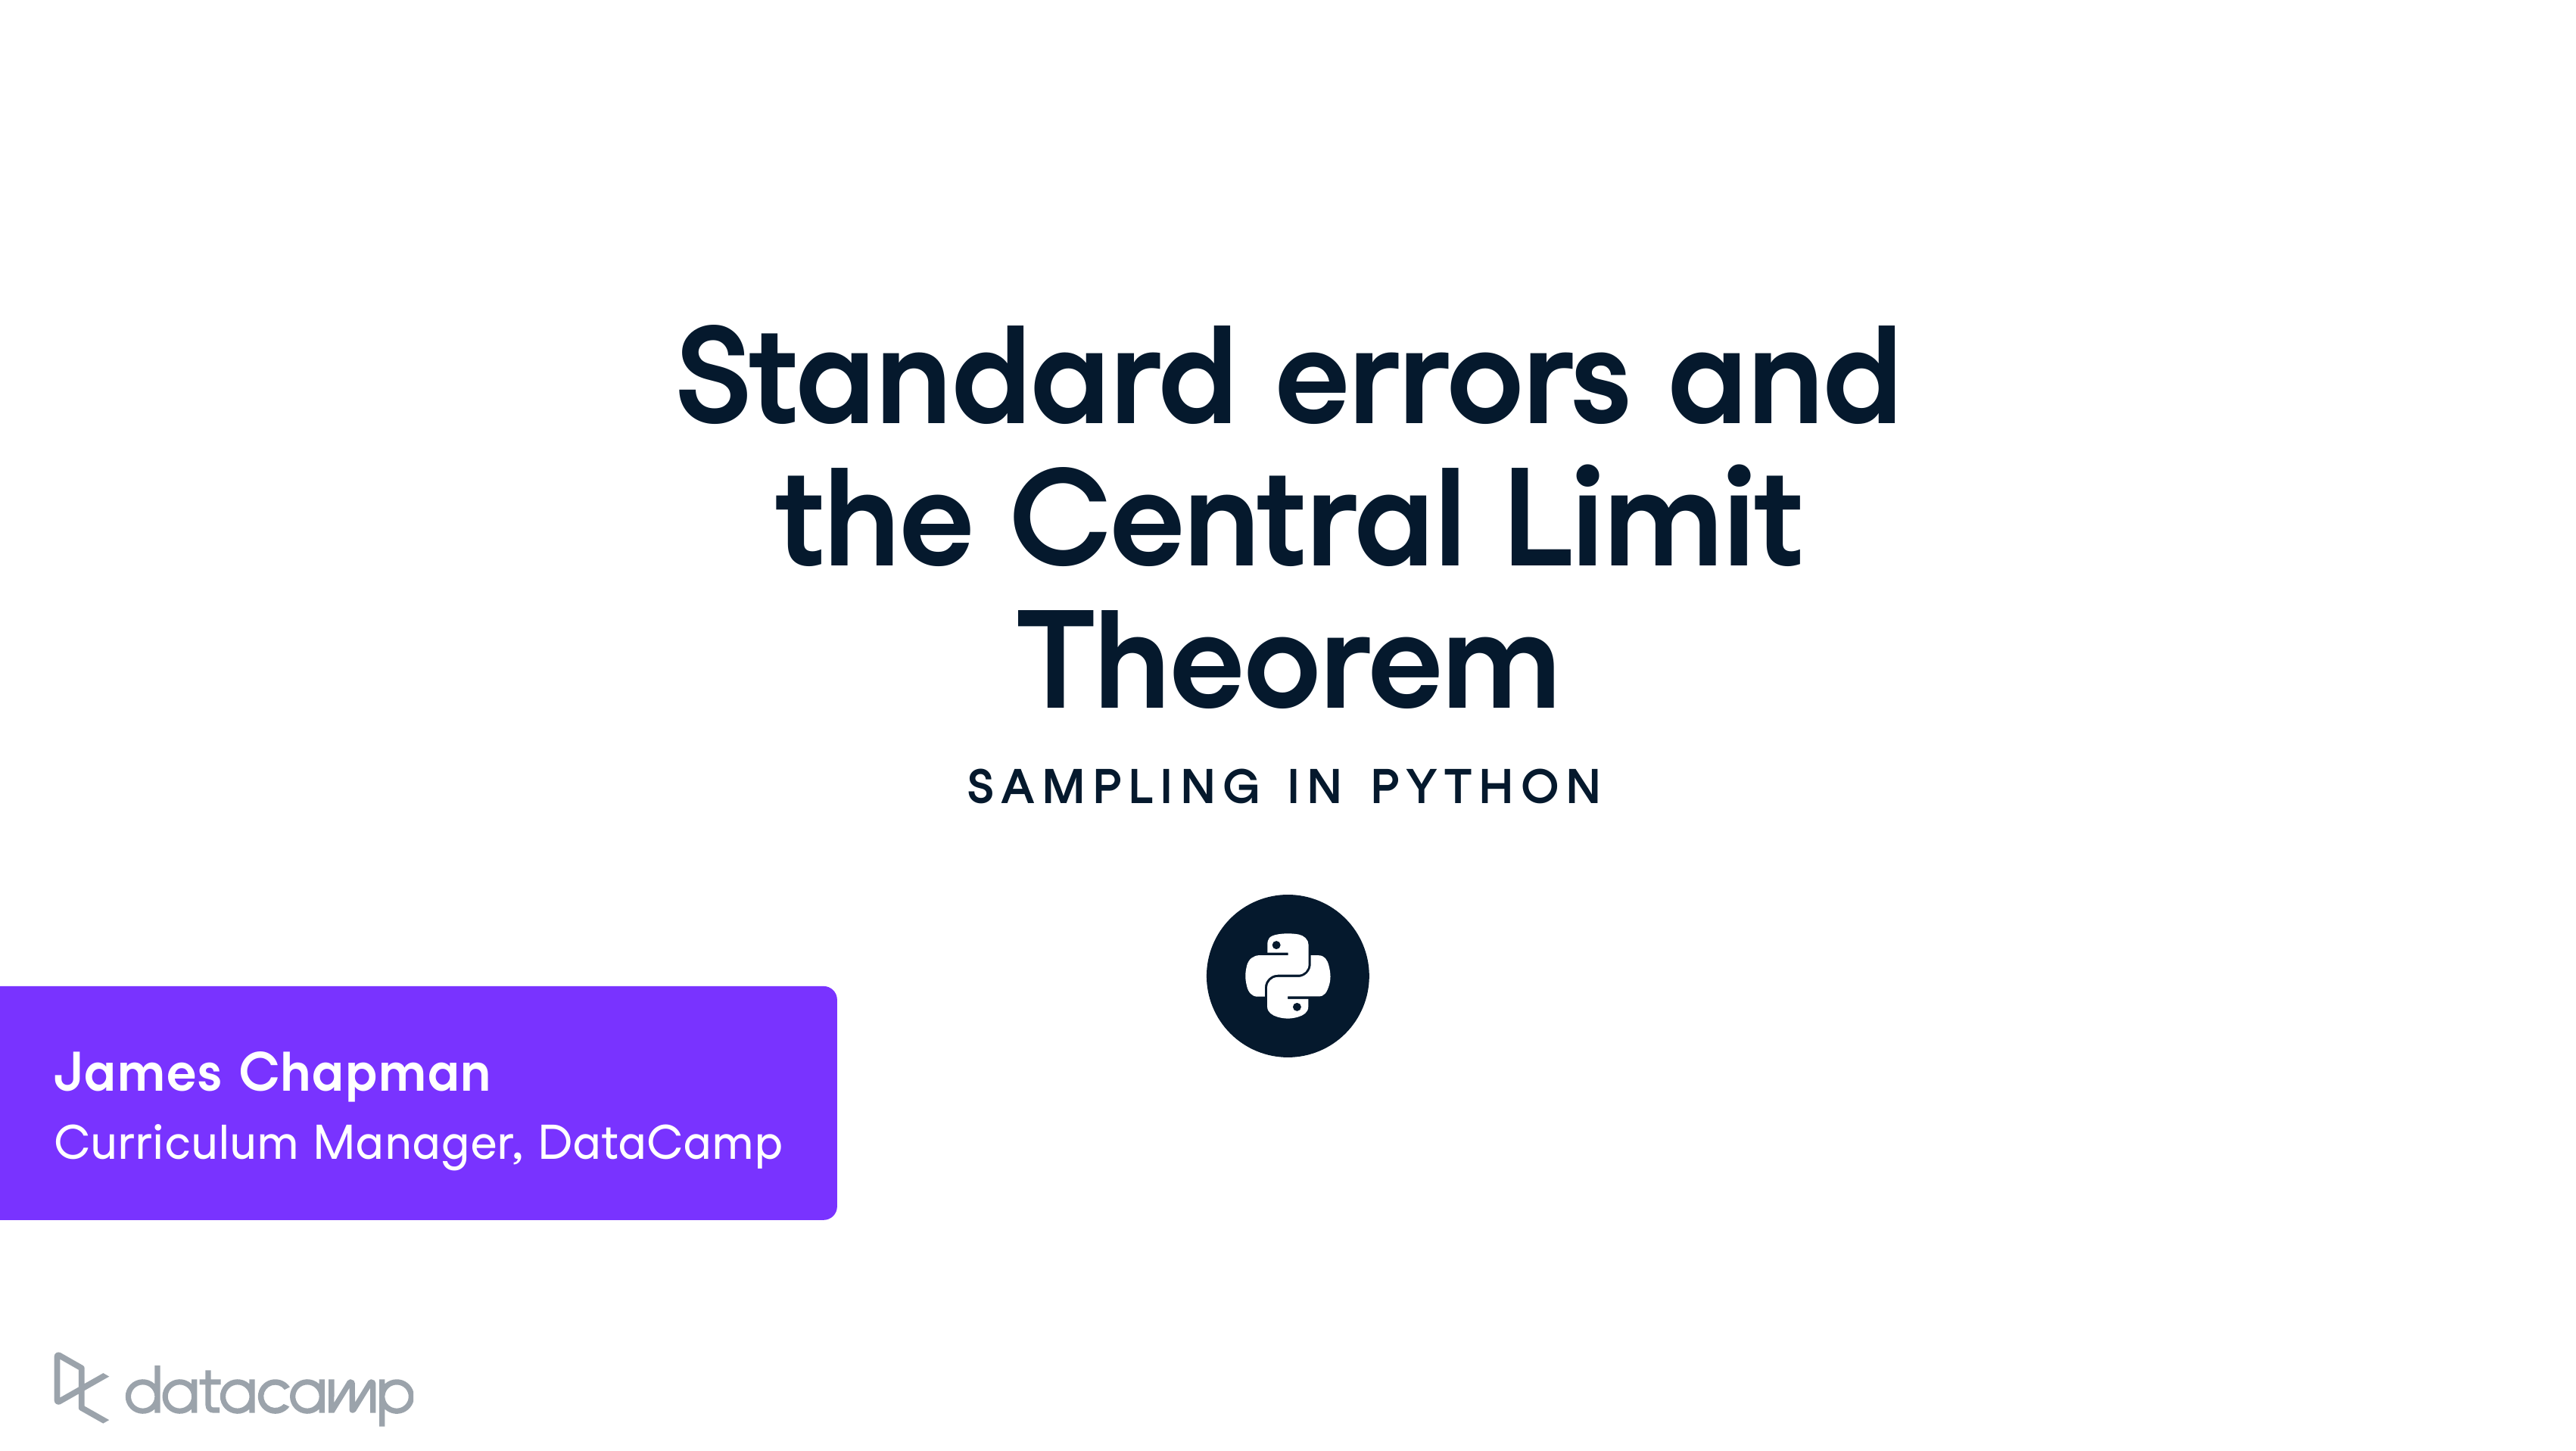
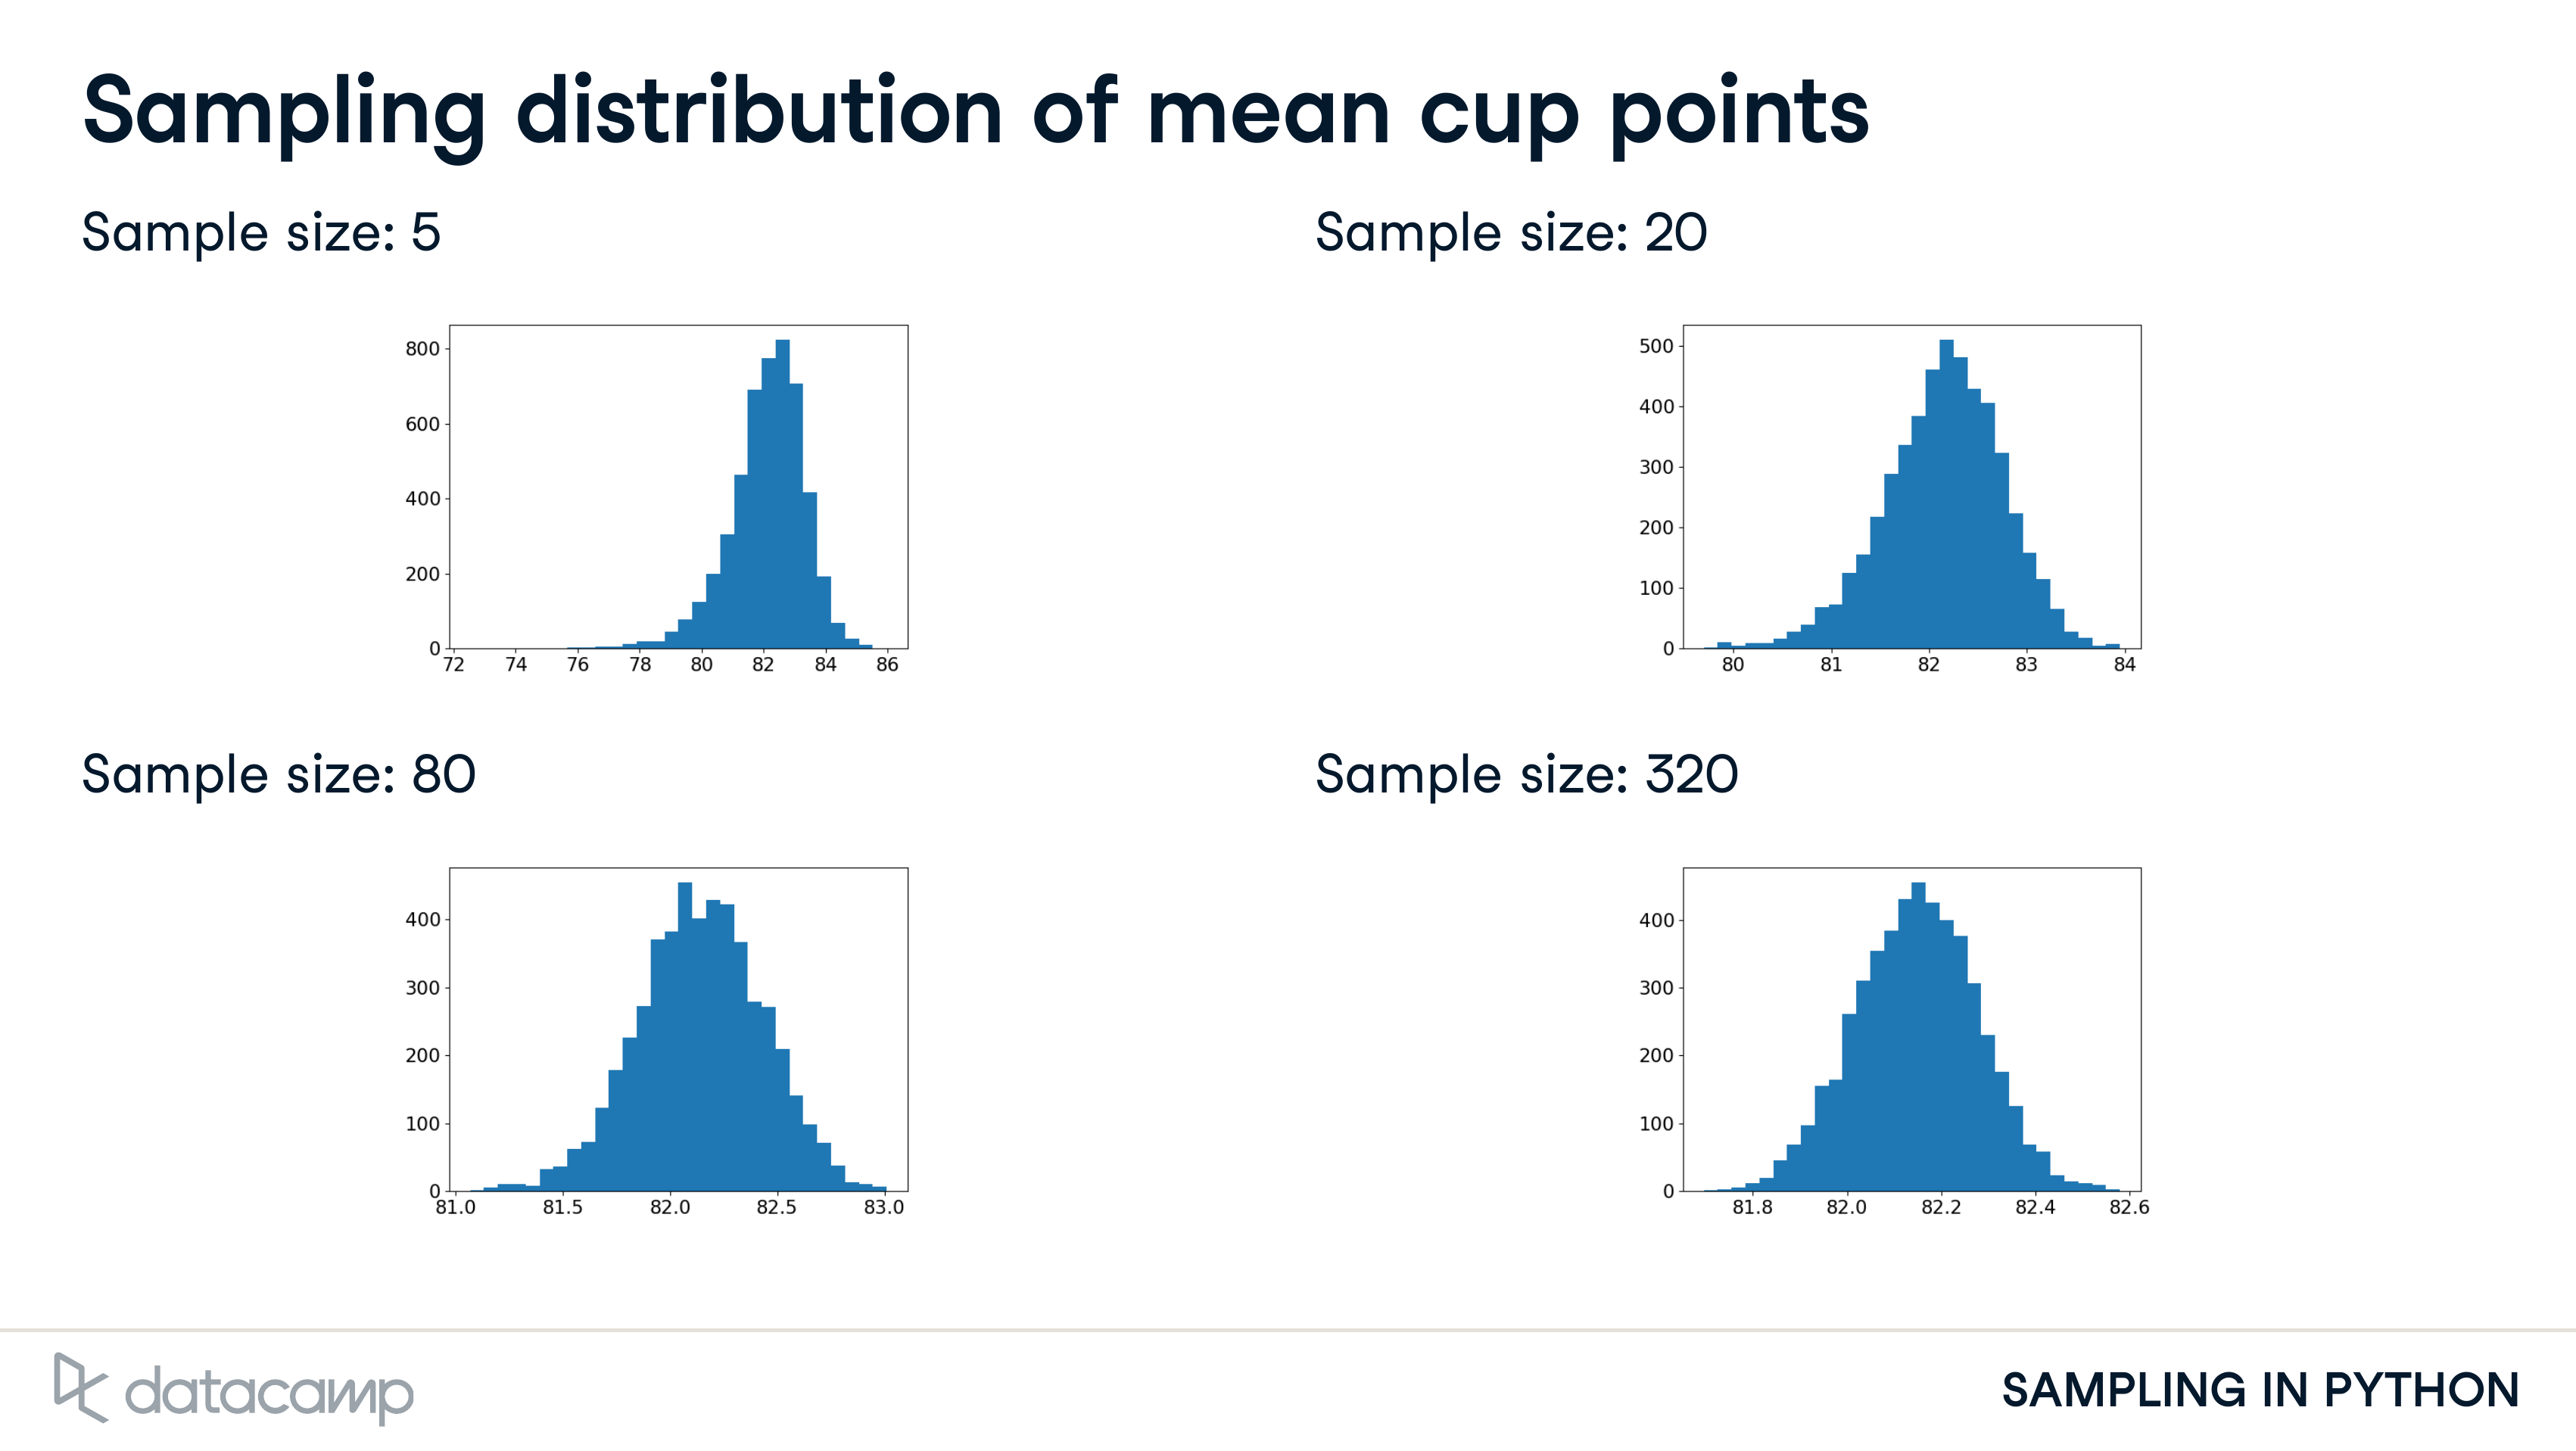
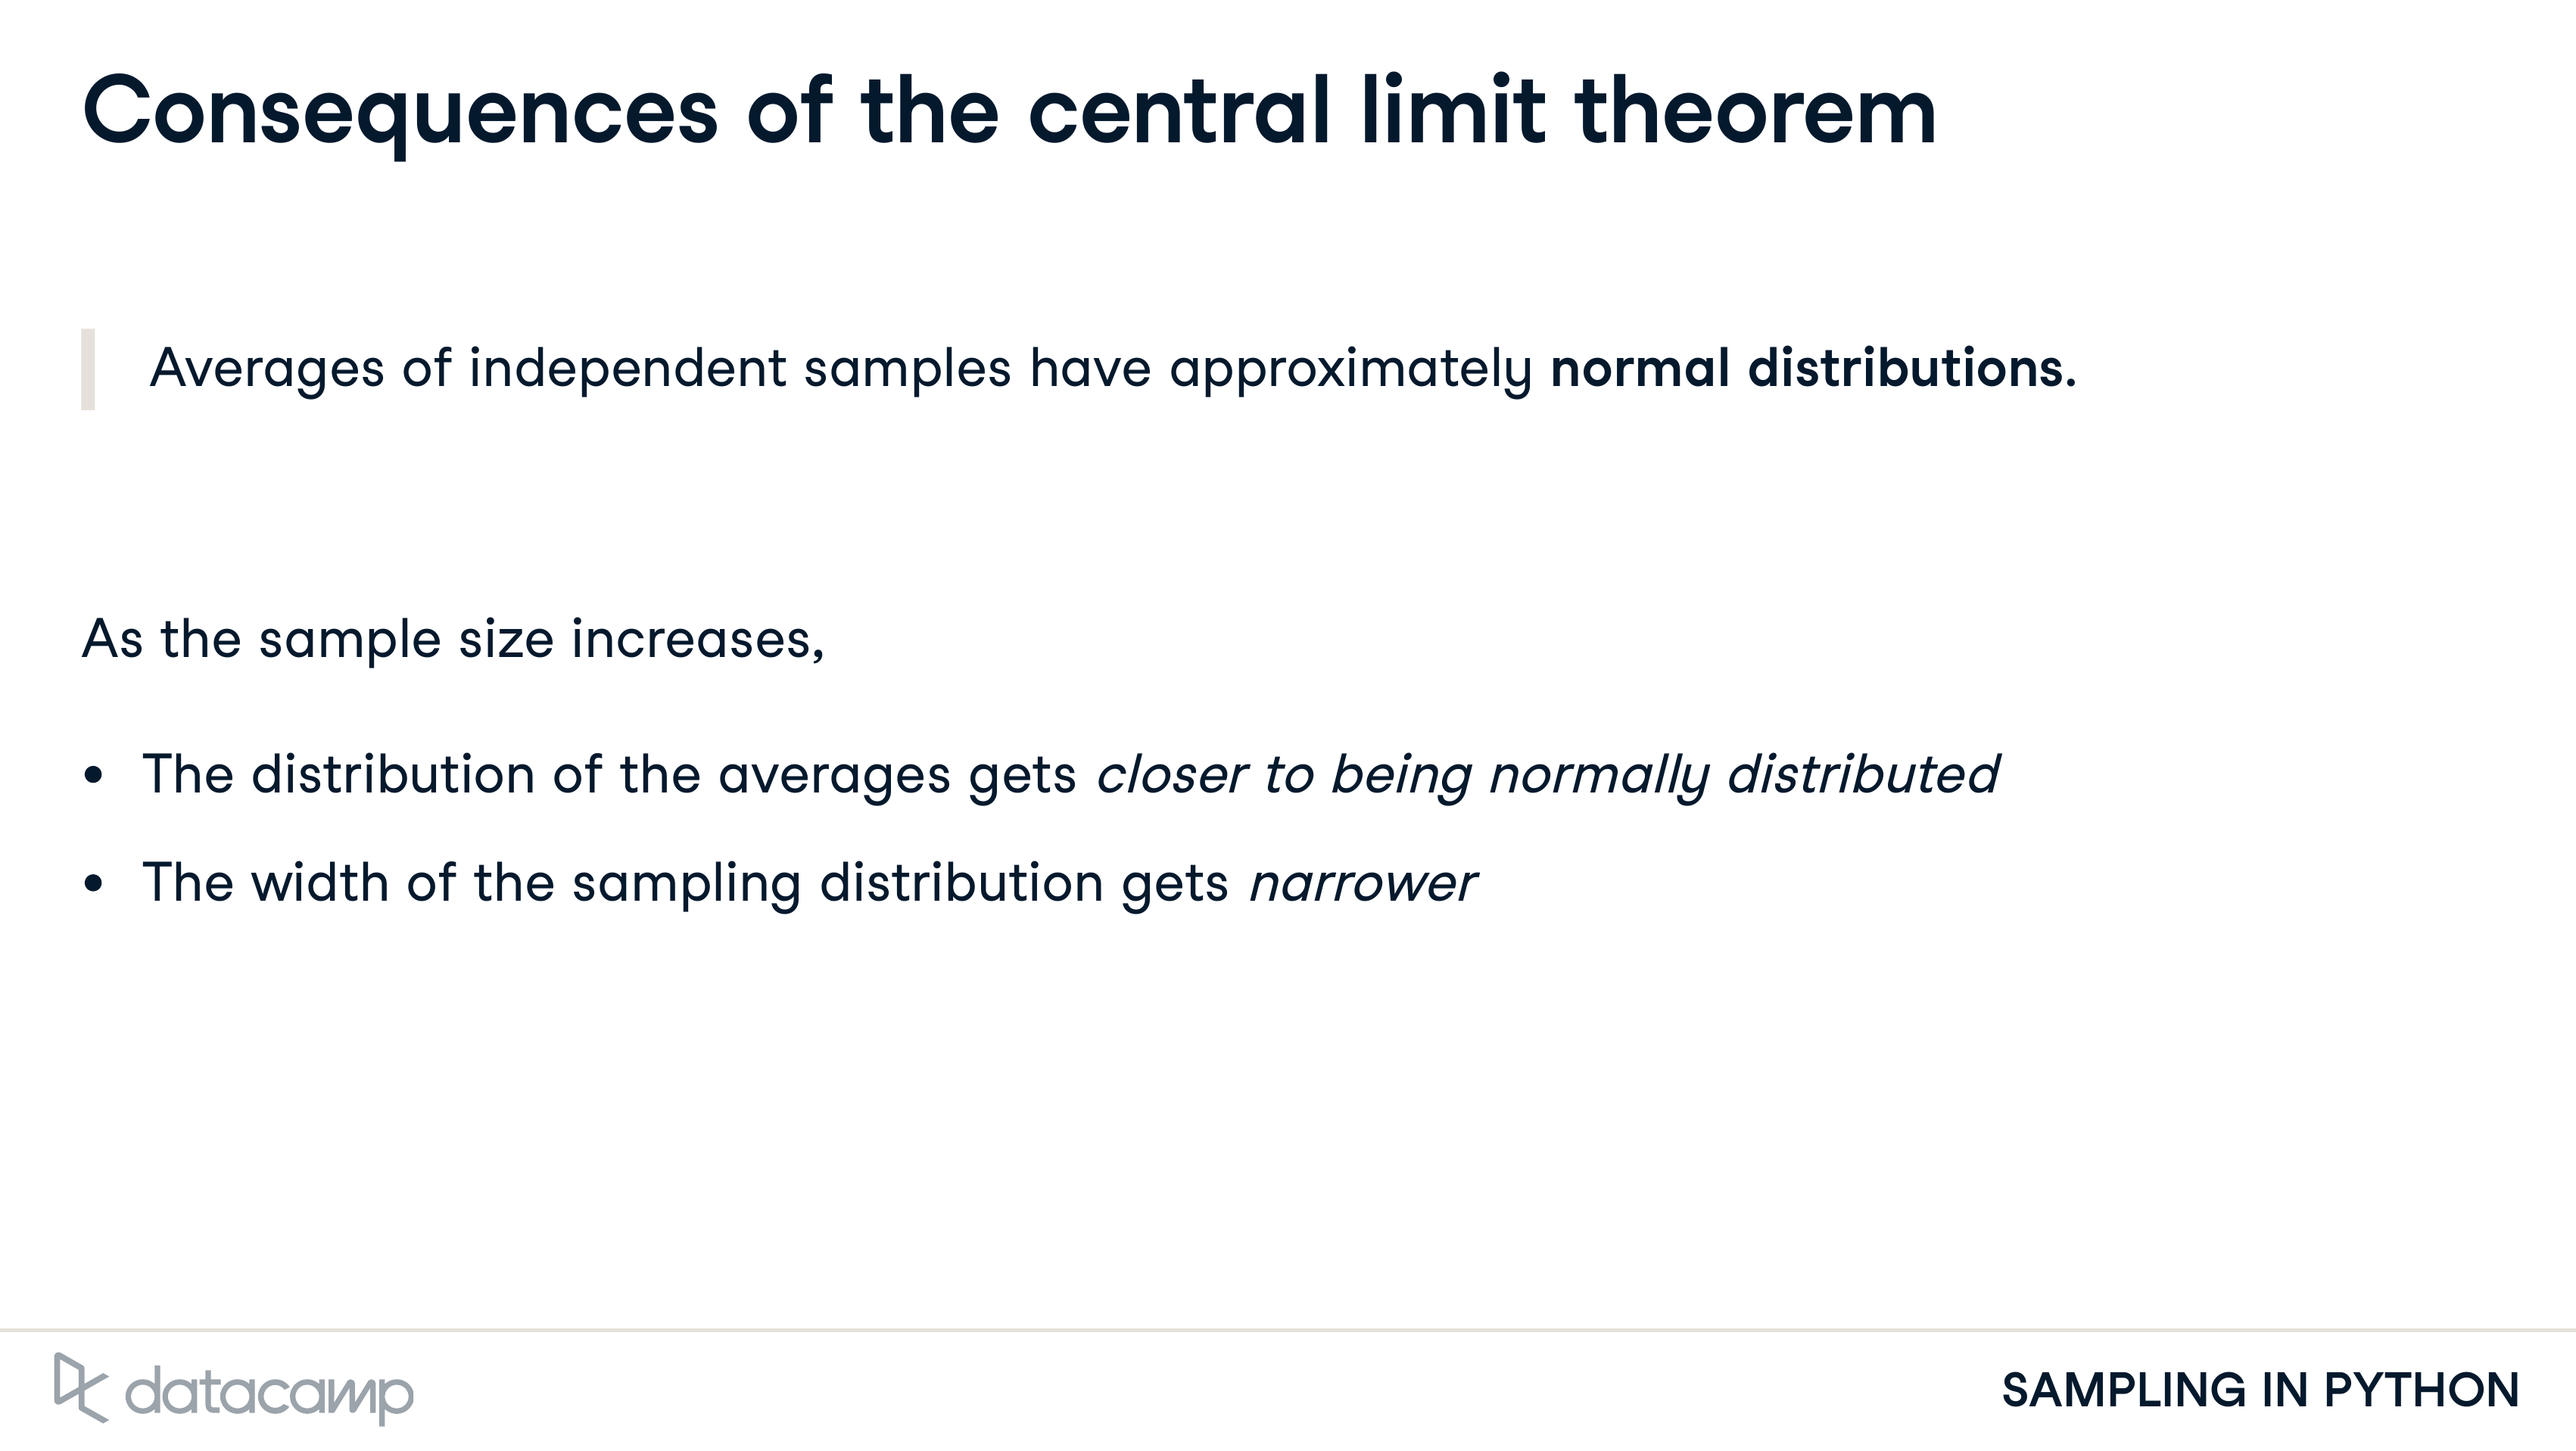
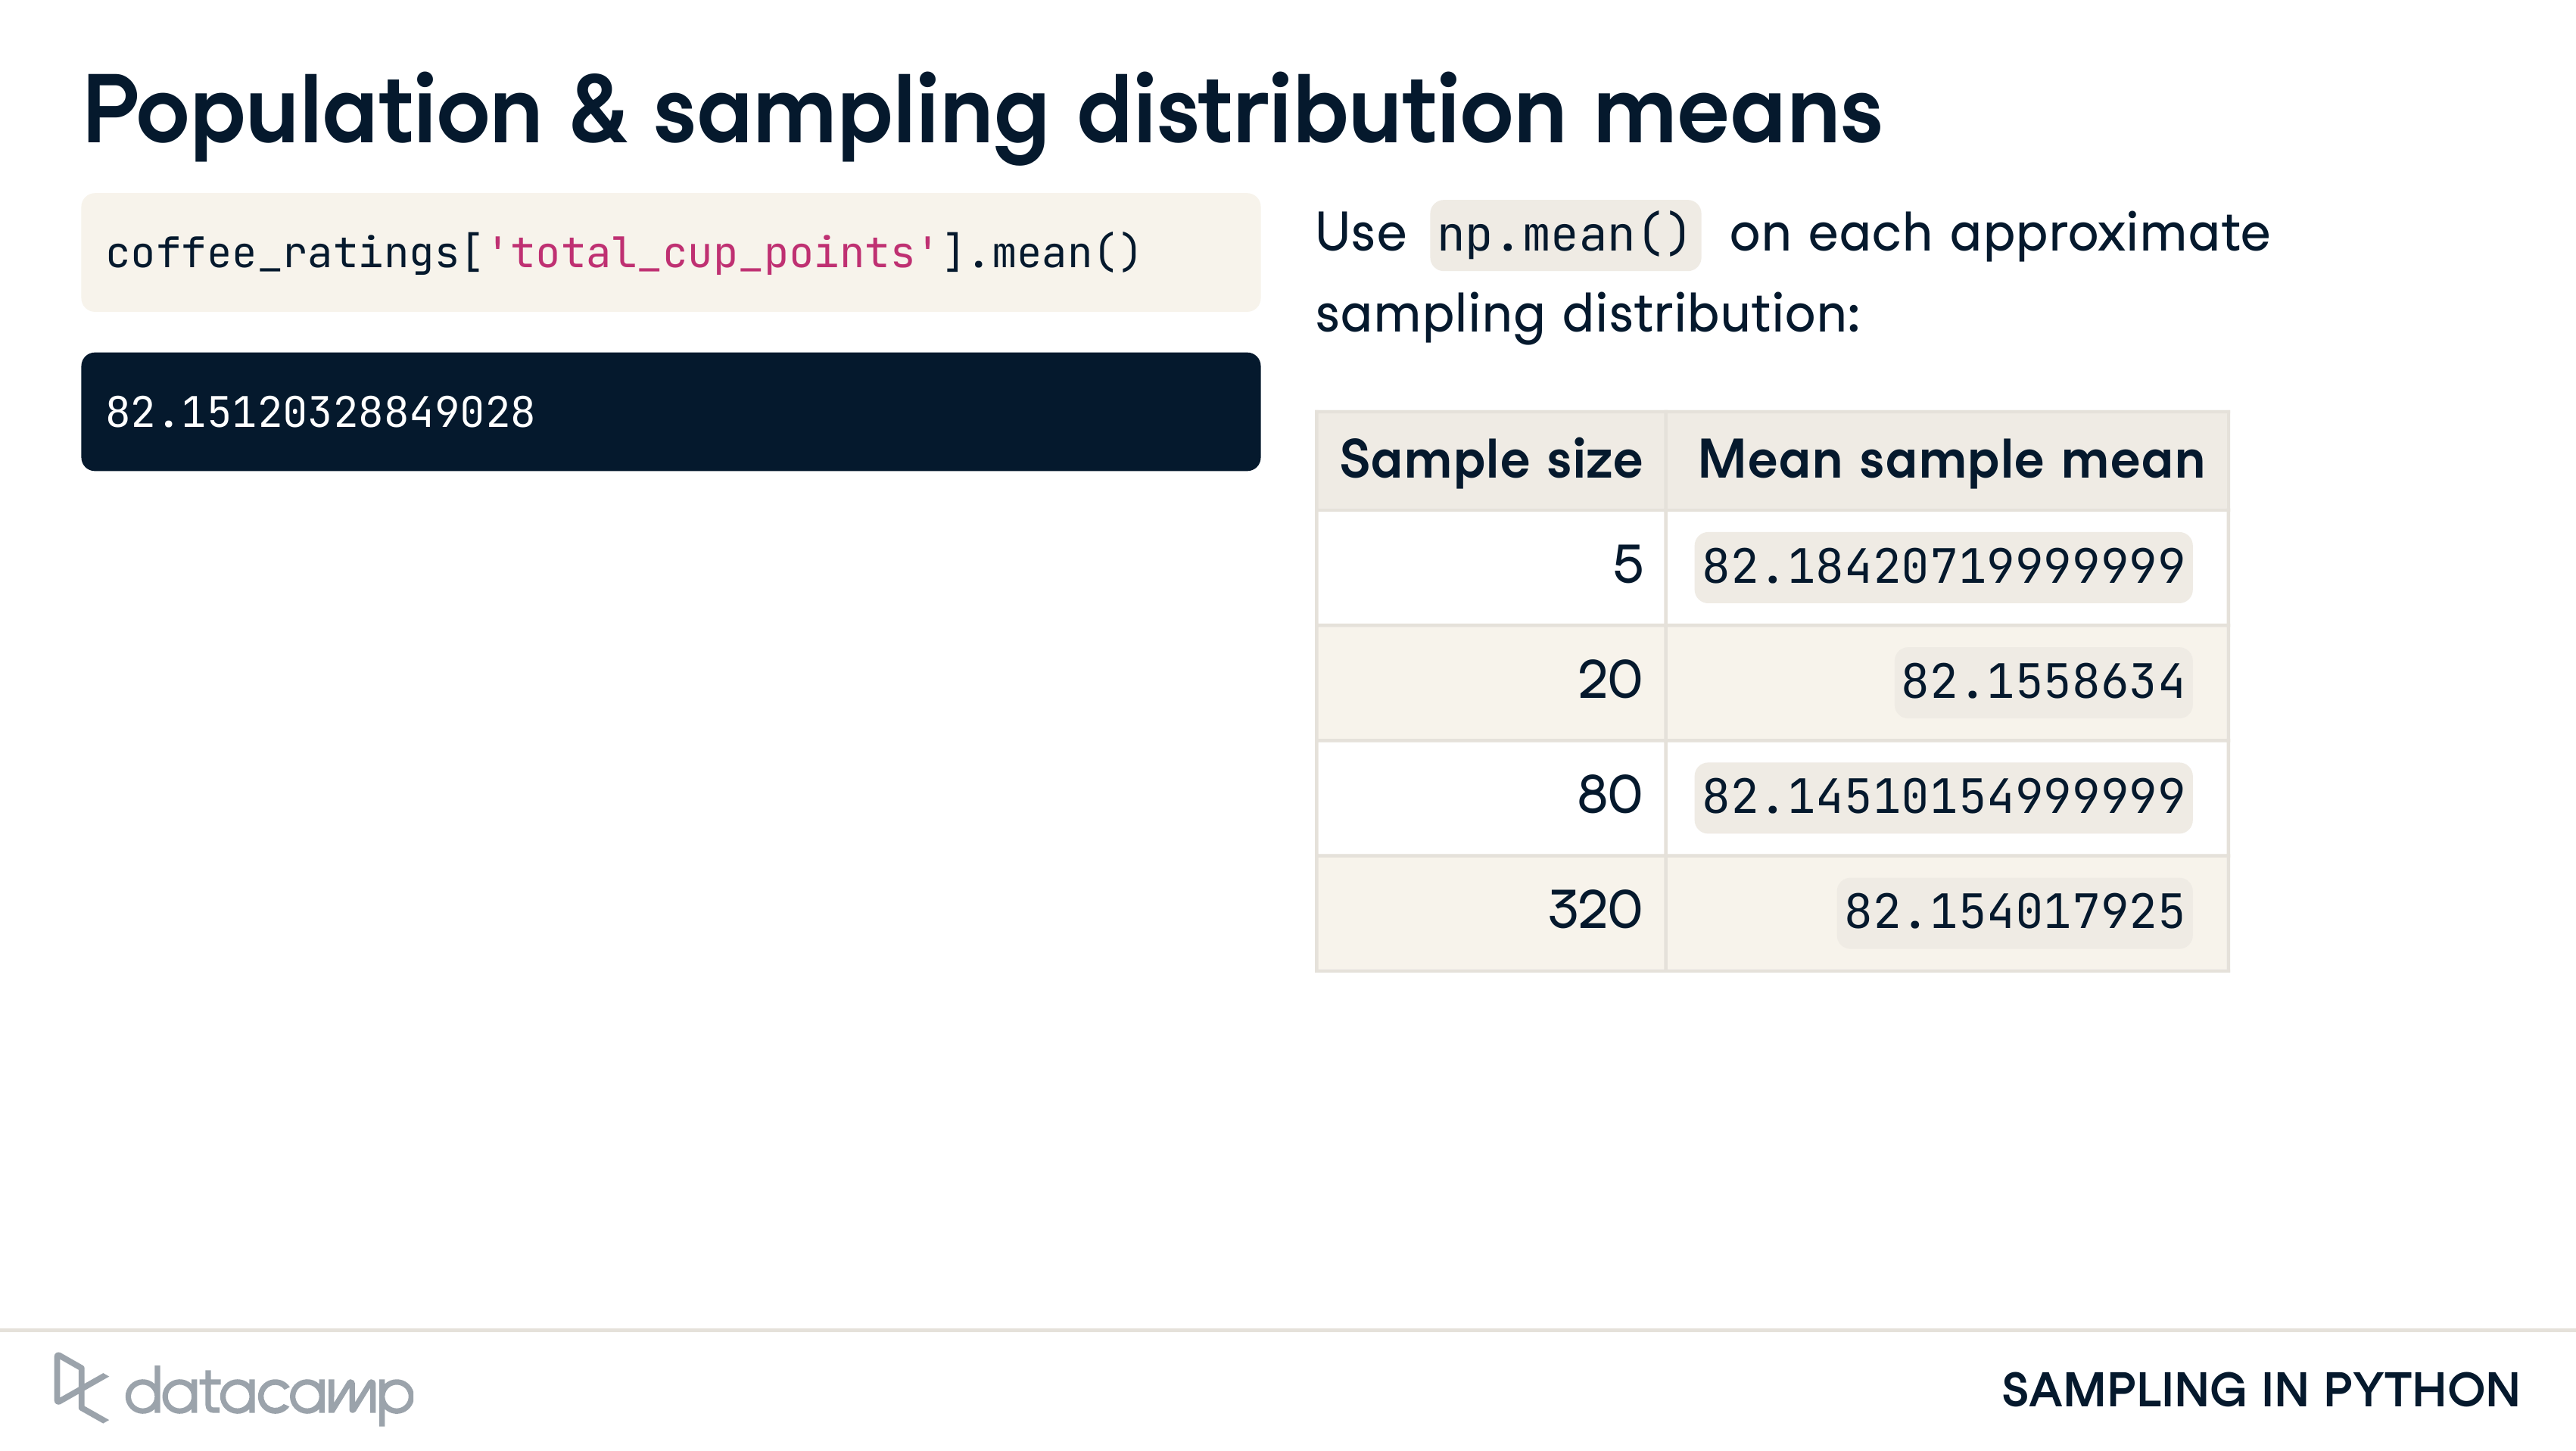
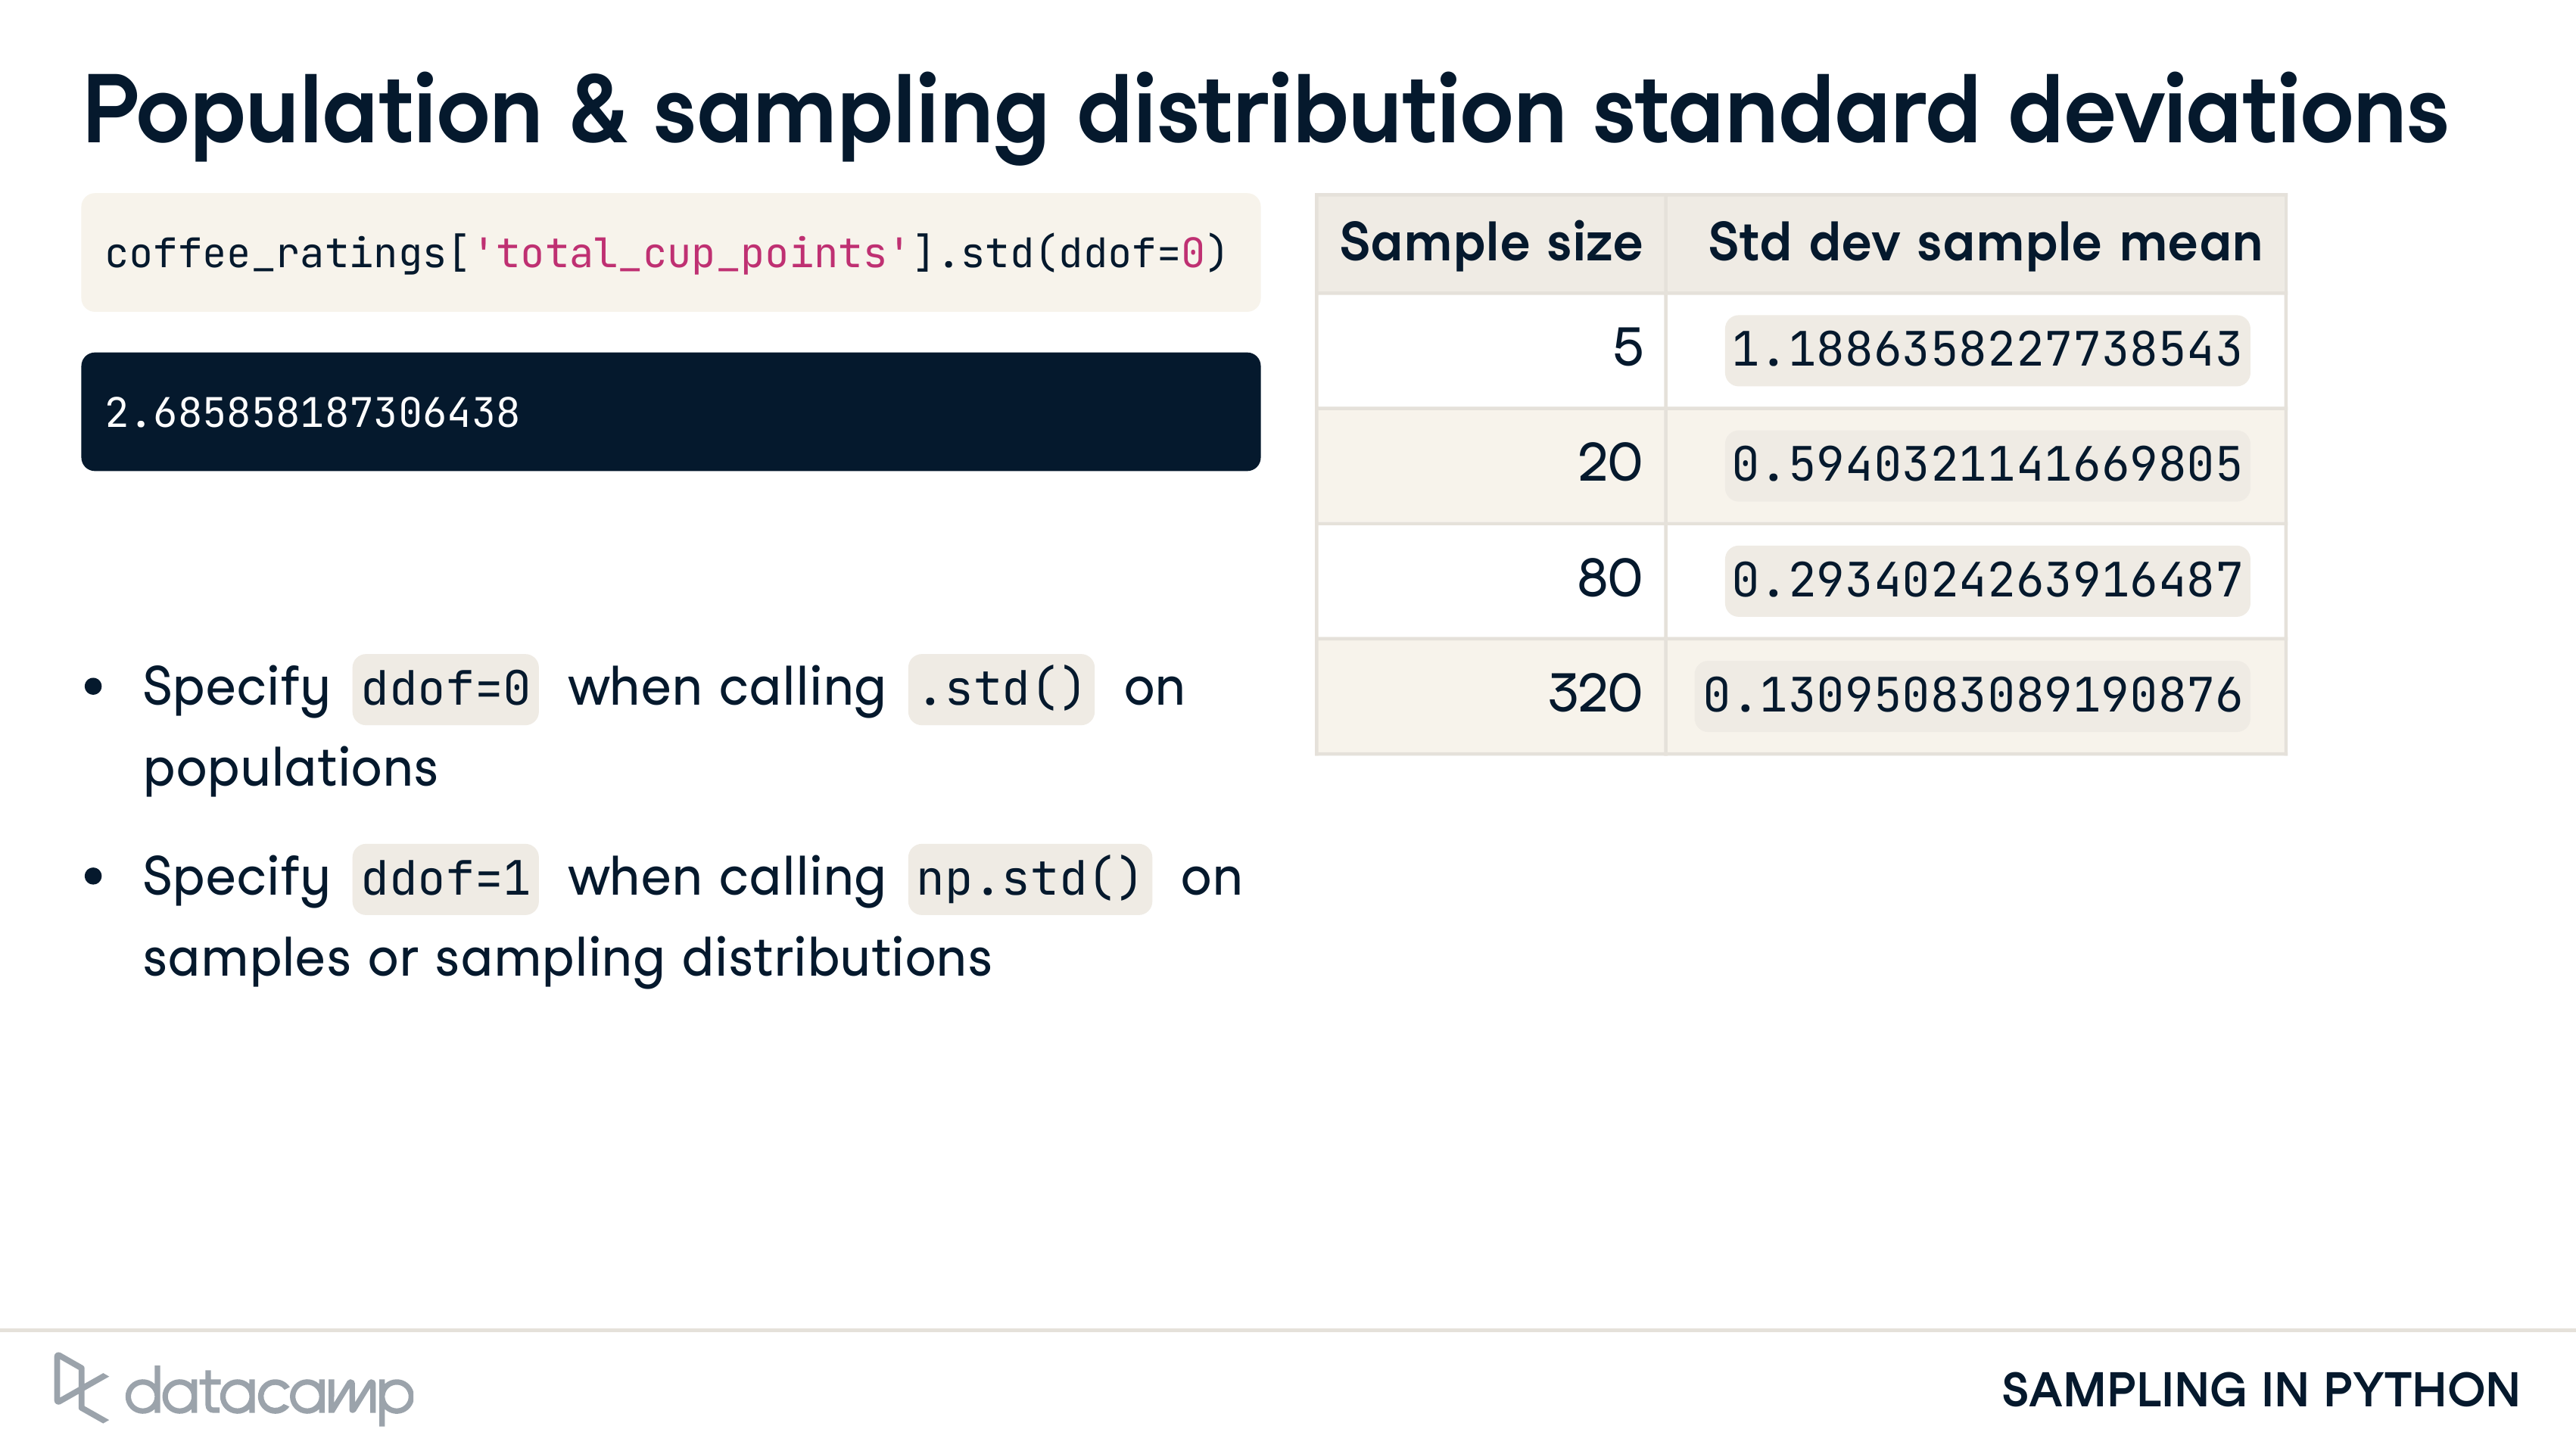
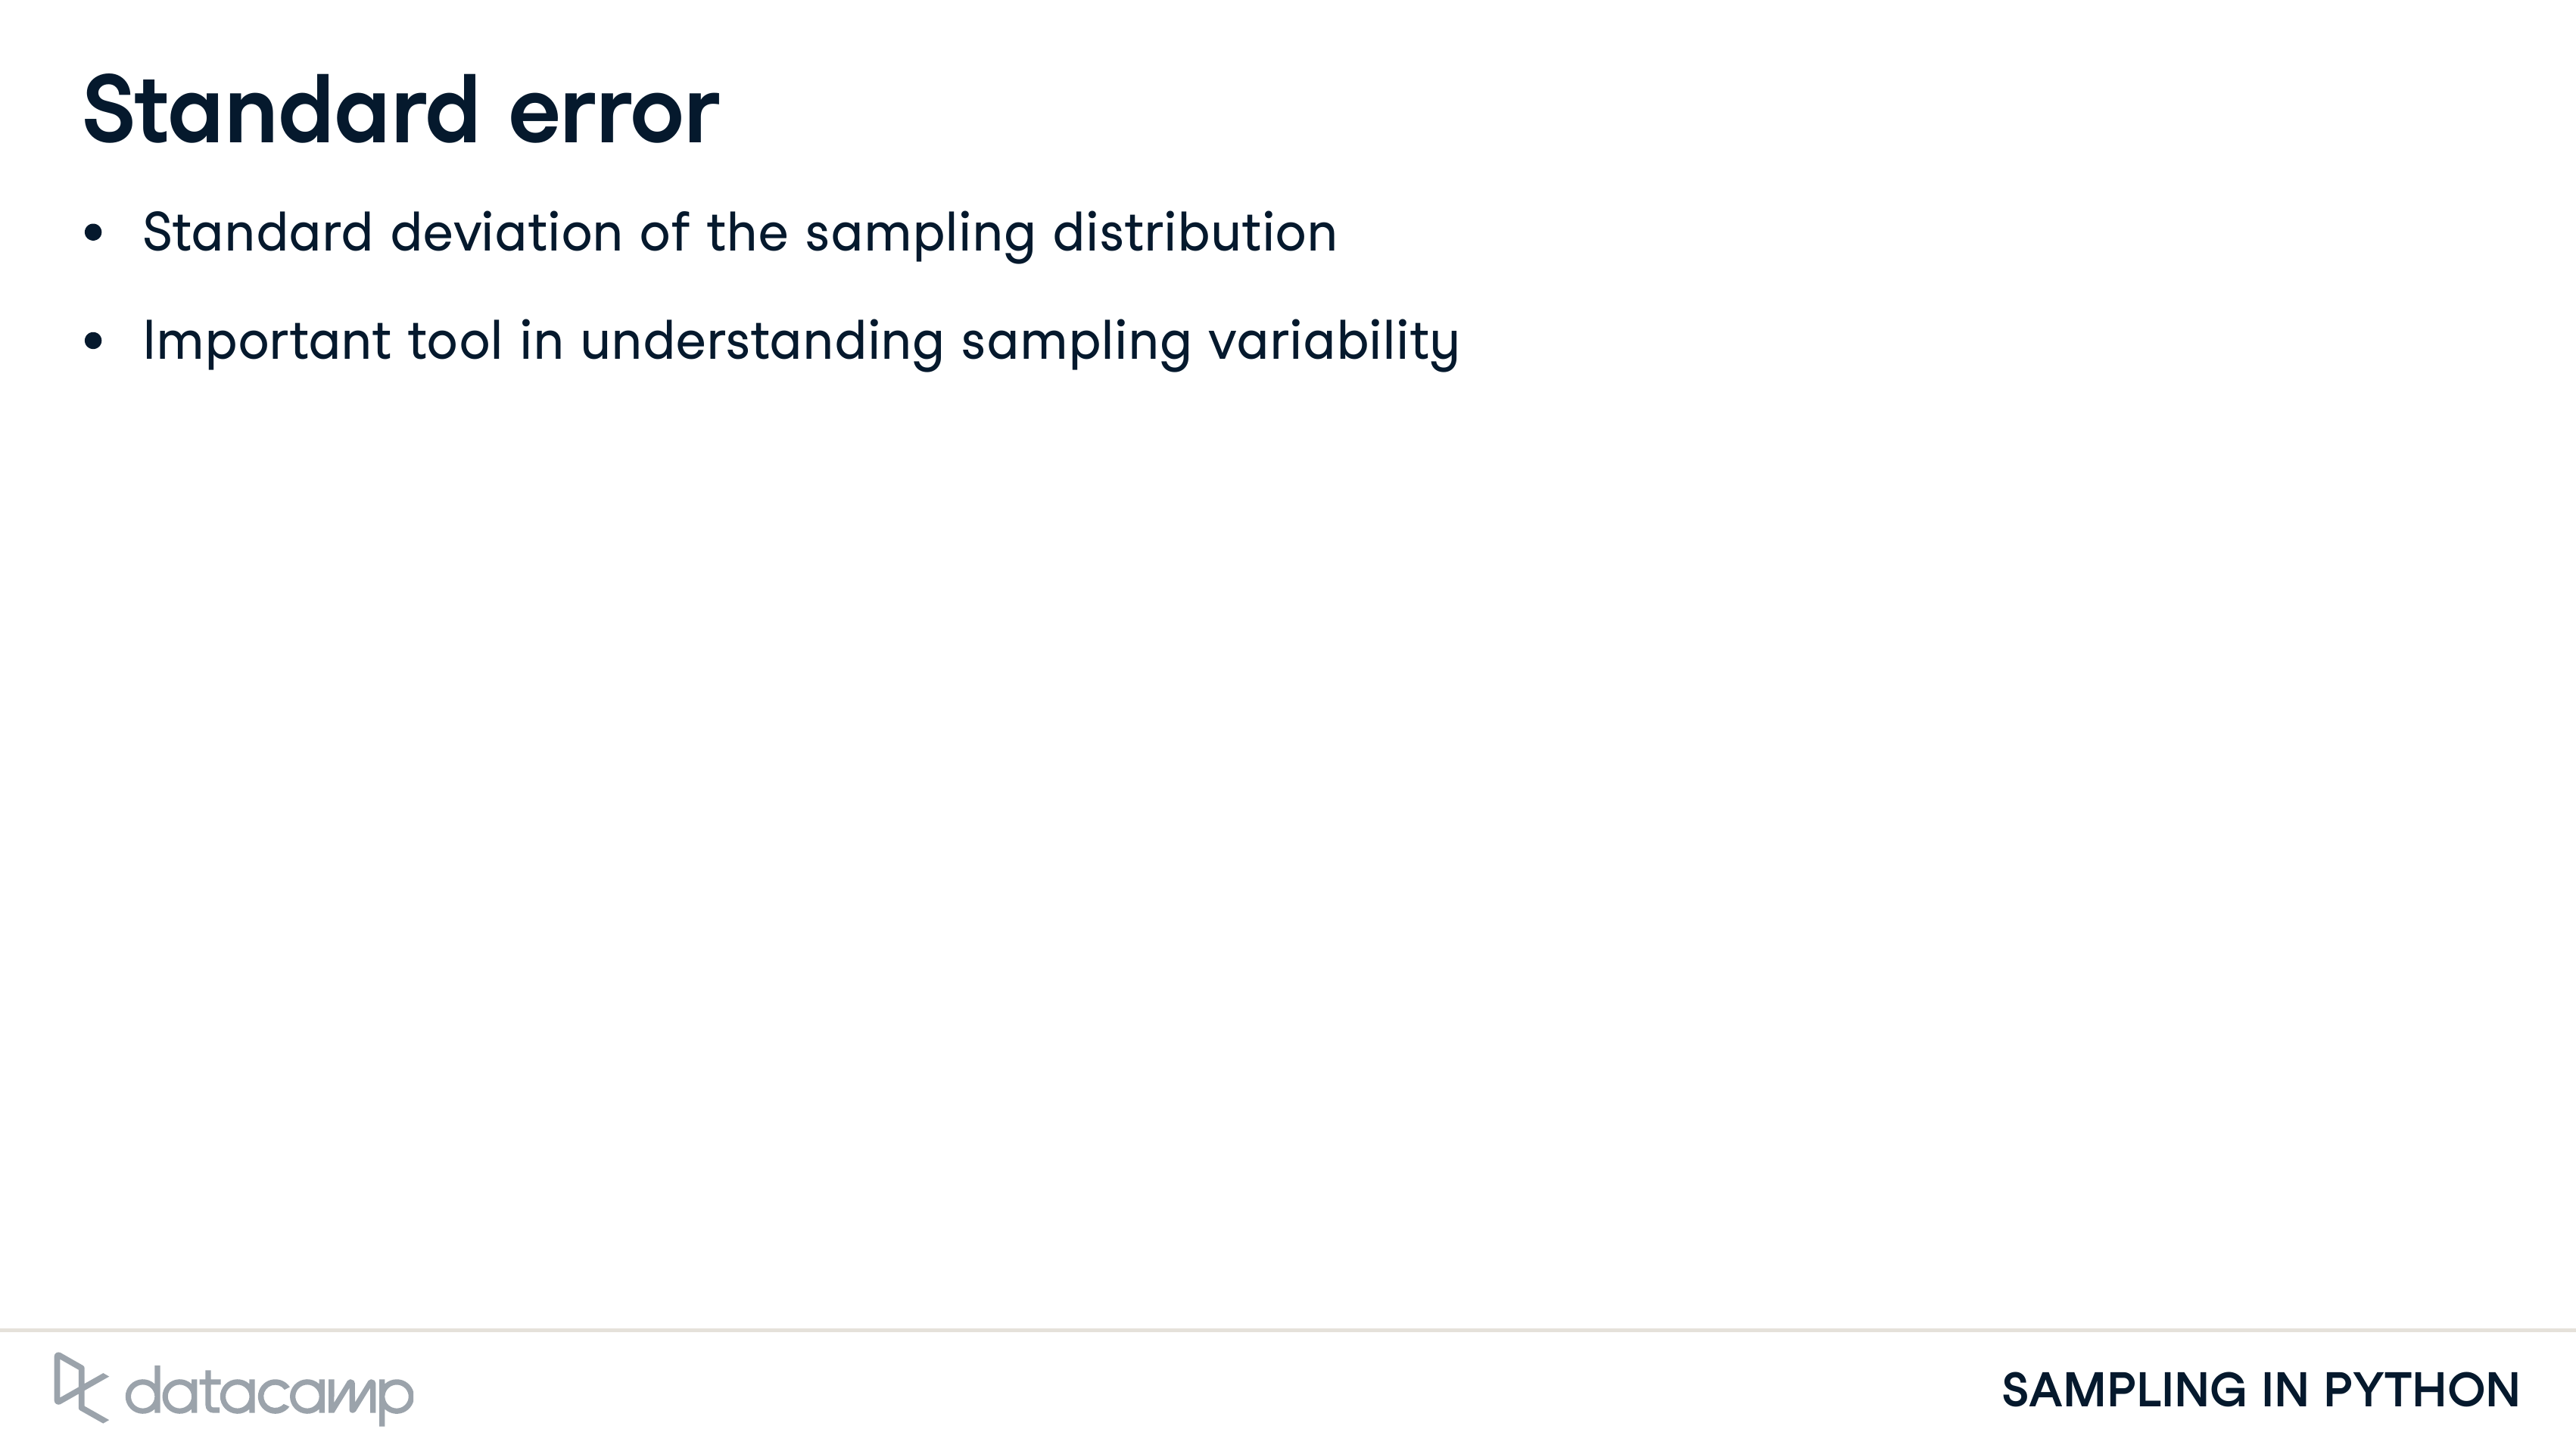
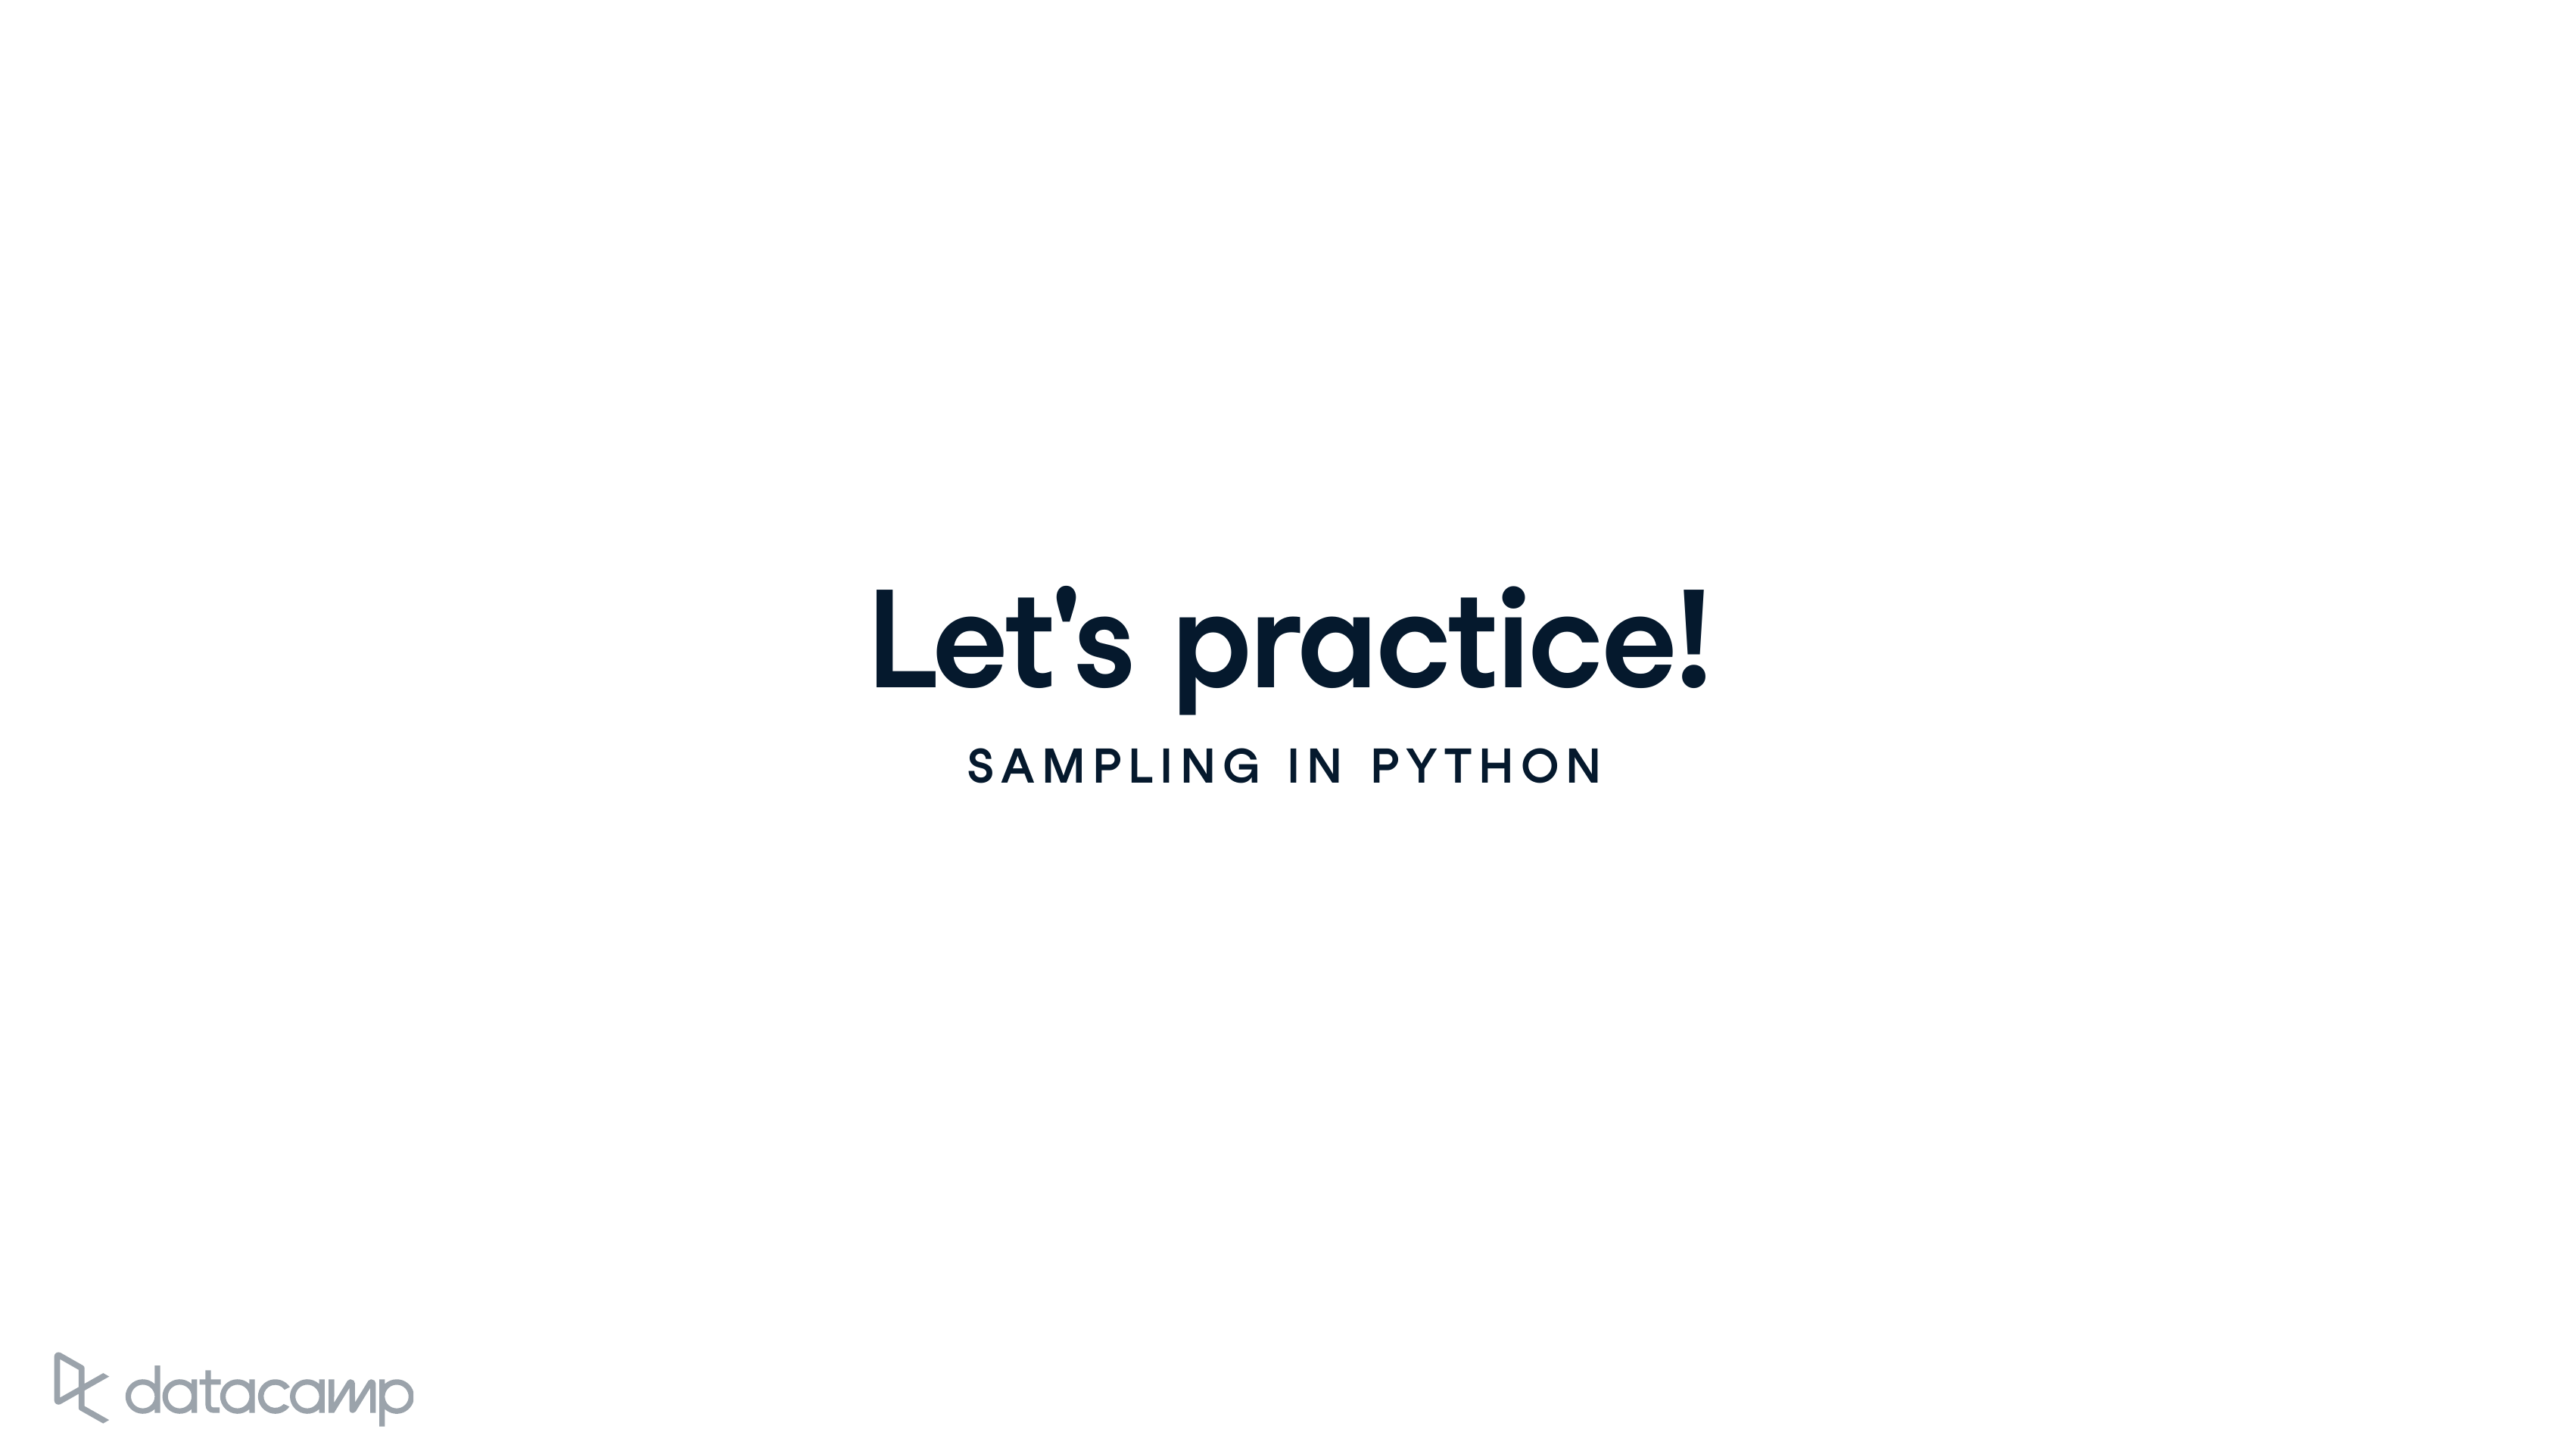

In [ ]:
display_scrollable_pdf_from_url("https://raw.githubusercontent.com/Marc86316/DataCamp/main/Courses/Sampling_in_Python/ch3_Relative_error_of_point_estimates.pdf",width=800,height=450)

## chapter 3 - Sampling Distributions Outline


1. Relative error of point estimates
  - Calculating relative errors  
  - Relative error vs. sample size

2. Creating a sampling distribution
  - Replicating samples  
  - Replication parameters

3. Approximate sampling distributions
  - Exact sampling distribution  
  - Generating an approximate sampling distribution  
  - Exact vs. approximate

4. Standard errors and the Central Limit Theorem
  - Population & sampling distribution means  
  - Population & sampling distribution variation

## Install dependencies, import libraries & dataset

In [ ]:
# Install dependencies
!apt-get update -y # check updation
!apt-get -y install poppler-utils
!pip install colab-pdf-viewer

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
^C
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.7).
0 upgraded, 0 newly installed, 0 to remove and 44 not upgraded.


In [ ]:
# Use the viewer
from pdf_viewer import display_scrollable_pdf_from_url
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

attrition_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/Courses/Sampling_in_Python/dataset/attrition.csv"
coffee_ratings_full_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/Courses/Sampling_in_Python/dataset/coffee_ratings_full.csv"
spotify_2000_2020_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/Courses/Sampling_in_Python/dataset/spotify_2000_2020.csv"

attrition_pop = pd.read_csv(attrition_url)
coffee_ratings_full = pd.read_csv(coffee_ratings_full_url)
spotify_2000_2020 = pd.read_csv(spotify_2000_2020_url)

In [ ]:
attrition_pop

Age  Attrition     BusinessTravel  DailyRate            Department  \
0      21        0.0      Travel_Rarely        391  Research_Development   
1      19        1.0      Travel_Rarely        528                 Sales   
2      18        1.0      Travel_Rarely        230  Research_Development   
3      18        0.0      Travel_Rarely        812                 Sales   
4      18        1.0  Travel_Frequently       1306                 Sales   
...   ...        ...                ...        ...                   ...   
1465   55        0.0      Travel_Rarely       1117                 Sales   
1466   58        0.0         Non-Travel        350                 Sales   
1467   58        0.0      Travel_Rarely        682                 Sales   
1468   58        1.0      Travel_Rarely        147  Research_Development   
1469   58        1.0      Travel_Rarely        286  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sciences                    High   
1                   22  Below_College      Marketing               Very_High   
2                    3       Bachelor  Life_Sciences                    High   
3                   10       Bachelor        Medical               Very_High   
4                    5       Bachelor      Marketing                  Medium   
...                ...            ...            ...                     ...   
1465                18         Doctor  Life_Sciences                     Low   
1466                 2       Bachelor        Medical                  Medium   
1467                10         Master        Medical               Very_High   
1468                23         Master        Medical               Very_High   
1469                 2         Master  Life_Sciences               Very_High   

      Gender  ...  PerformanceRating RelationshipSatisfaction  \
0       Male  ...          Excellent                Very_High   
1       Male  ...          Excellent                Very_High   
2       Male  ...          Excellent                     High   
3     Female  ...          Excellent                      Low   
4       Male  ...          Excellent                Very_High   
...      ...  ...                ...                      ...   
1465  Female  ...        Outstanding                Very_High   
1466    Male  ...        Outstanding                Very_High   
1467    Male  ...          Excellent                     High   
1468  Female  ...          Excellent                Very_High   
1469    Male  ...          Excellent                Very_High   

      StockOptionLevel TotalWorkingYears TrainingTimesLastYear  \
0                    0                 0                     6   
1                    0                 0                     2   
2                    0                 0                     2   
3                    0                 0                     2   
4                    0                 0                     3   
...                ...               ...                   ...   
1465                 0                37                     2   
1466                 1                37                     0   
1467                 0                38                     1   
1468                 1                40                     3   
1469                 0                40                     2   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0             Better               0                   0   
1               Good               0                   0   
2             Better               0                   0   
3             Better               0                   0   
4             Better               0                   0   
...              ...             ...                 ...   
1465          Better              10                   9   
1466            Good              16                   9   
1467            Go

# Lesson - Relative error of point estimates

## Big Question:

### 🔍 what do we expect to learn from this chapter

---

In this chapter you will learn :

1. **What's Relative Error** )
  * A metric that measures how far off a sample mean is from the population mean, expressed as a proportion as
  ```python
  rel_error_pct = 100 * abs(population_mean - sample_mean) / population_mean
  ```
2.   **How sample size affects point estimate accuracy**
  * he larger the sample, the more accurate the estimate tends to be.
  * In ML, a properly sample can reduce **overfitting**
3. **How to compute relative error** and visualize the changes with different sample sizes.




### 💡 Why we need to learn this ?

---

* In statistics, it's **impossible** to know entire population data, we estimate population parameters from samples.
* Understanding **how sample size impacts estimate accuracy** helps you choose a reasonable sample size when resources are limited.
* Calculating **relative error** helps assess whether your sample-based estimate is reliable — a crucial step for making **trustworthy inferences**.

### 🛠️ How (How is it done? What skills did you learn?)

---

1. Calculating population and sample means:
```python
population_mean = coffee_ratings['total_cup_points'].mean()
sample_mean = coffee_ratings.sample(n=sample_size)['total_cup_points'].mean()
```
2. Compute the relative error as a percentage:
```python
rel_error_pct = 100 * abs(population_mean - sample_mean) / population_mean
```
3. Visualize relative error vs. sample size
```python
errors.plot(x="sample_size", y="relative_error", kind="line")
plt.show()
```


## Exercise - Calculating Relative Errors

When estimating population parameters like the mean, the **size of your sample** plays a significant role in the **accuracy** of your estimates. A small sample might lead to inaccurate estimates, whereas larger samples tend to yield more reliable results.

One way to measure the accuracy of your estimate is through **relative error**, calculated as:

```
rel_error_pct = 100 * abs(population_mean - sample_mean) / population_mean
```

In this exercise, you’ll explore how sample size affects relative error using the `attrition_pop` dataset.


### Arguments:
- `attrition_pop`: The population dataset
- `mean_attrition_pop`: The population mean of the `Attrition` column

### Instructions 1/2

1. Generate a simple random sample of **50 rows** from `attrition_pop`, setting the random seed to `2022`.
2. Calculate the sample mean `Attrition`.
3. Compute the **relative error** between this sample mean and `mean_attrition_pop`, expressed as a **percentage**.

In [ ]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the population
mean_attrition_pop = attrition_pop['Attrition'].mean()

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(mean_attrition_pop - mean_attrition_srs50) / mean_attrition_pop

print(rel_error_pct50)


62.78481012658227


### Instructions 2/2

Repeat the steps above, but this time:

1. Generate a simple random sample of **100 rows** from `attrition_pop`.
2. Calculate the sample mean.
3. Compute and compare the new relative error percentage to see the impact of increasing the sample size.

In [ ]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_pop - mean_attrition_srs100) / mean_attrition_pop


# Print rel_error_pct100
print(rel_error_pct100)

6.962025316455695


### Result :

Samply the best! As you increase the sample size, the sample mean generally gets closer to the population mean, and the relative error decreases.


## Exercise - Relative Error vs. Sample Size

The plot displays how **relative error** changes with **sample size**, using simple random sampling to estimate the proportion of employee attritions. Sample sizes range from **2 to 1470** (the size of the full population).

Clicking **"Regenerate plot"** draws new random samples for each size and recalculates the relative errors.

---

### Instructions

**Which of the following statements is TRUE?**

- For any given sample size, the relative error between the sample mean and the population mean is fixed at a specific value.  
- When the sample is as large as the whole population, the relative error is small, but never zero.  
- If the sample mean is greater than the population mean, the relative error can be less than zero.  
- The relative error can never be greater than 100%.  
- ✅ For small sample sizes, each additional entry in a sample can result in substantial decreases to the relative error.

---

**Correct Answer**:  
✅ *For small sample sizes, each additional entry in a sample can result in substantial decreases to the relative error.*

This highlights how early increases in sample size significantly improve estimate accuracy.


You're relatively great at this! As you increase the sample size, the relative error decreases quickly at first, then more slowly as it drops to zero.

In [ ]:
# If you're in Colab, uncomment the next line to install ipywidgets if needed:
# !pip install ipywidgets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Button, Output
from IPython.display import display, clear_output

# Load your data
df =  pd.read_csv(attrition_url)

# Suppose the column indicating attrition is named "Attrition"
# and uses something like 'Yes'/'No', we convert it to 1 and 0.
df['Attrition_flag'] = (df['Attrition'] == 'Yes').astype(int)

# True proportion of attrition in the full dataset
true_prop = df['Attrition_flag'].mean()

# We define a function to sample from the data and compute relative errors
def sample_and_plot():
    # Range of sample sizes
    sample_sizes = range(2, len(df)+1)  # up to full population size, e.g. 1470

    relative_errors = []

    # Draw random samples for each size and compute sample proportion
    for size in sample_sizes:
        sample = df.sample(n=size, replace=False)
        sample_prop = sample['Attrition_flag'].mean()

        # Relative error: (|estimated - true| / true) * 100%
        # If true_prop = 0, it has special meaning, but presumably
        # you have some attrition so it won't be zero.
        rel_err = abs(sample_prop - true_prop) / true_prop * 100
        relative_errors.append(rel_err)

    # Plot the results
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(sample_sizes, relative_errors, 'k-', alpha=0.8, label="Relative Error")

    # Optional: Add a smooth line (e.g., polynomial fit)
    # We'll do a low-order polynomial fit for demonstration:
    poly_coeff = np.polyfit(sample_sizes, relative_errors, deg=3)
    poly_func = np.poly1d(poly_coeff)
    smoothed = poly_func(sample_sizes)
    ax.plot(sample_sizes, smoothed, 'b-', label="Smoothed Fit")

    ax.set_title("Relative Error vs. Sample Size")
    ax.set_xlabel("Sample Size")
    ax.set_ylabel("Relative Error (%)")
    ax.set_ylim(bottom=0)  # Force y-axis to start at 0
    ax.legend()
    plt.show()

# Create a button and output widget
button = Button(description="Regenerate plot", button_style='info')
output = Output()

# When the button is clicked, clear the output and re-generate the plot
def on_button_clicked(b):
    with output:
        clear_output(wait=True)
        sample_and_plot()

button.on_click(on_button_clicked)

# Display the button and output
display(button, output)

# Optionally call once to show the initial plot
with output:
    sample_and_plot()

Button(button_style='info', description='Regenerate plot', style=ButtonStyle())

Output()

# Lesson - Creating a sampling distribution

## Big Question:

### 🔍 What (What is this lesson about?)

This lesson introduces the concept of a **sampling distribution**, which is:

- A distribution of repeated point estimates (e.g., sample means)
- Created by repeatedly sampling from the same population
- Visualized to understand the **variability of estimates** due to random sampling


### 💡 Why (Why is this important?)

Because:

- Even when using the **same code**, different random samples give **slightly different results**.
- By **repeating the sampling process many times**, we can:
  - Visualize how much sample estimates vary
  - Understand the **stability** and **reliability** of a sample size
  - Quantify uncertainty in our estimates
- This helps us understand concepts like **sampling variability** and **standard error**, which are essential for statistical inference and ML model evaluation.


### 🛠️ How (How is it done? What techniques did you learn?)

1. Repeated sampling using a `for` loop
```python
mean_cup_points_1000 = []
for i in range(1000):
    mean = coffee_ratings.sample(n=30)['total_cup_points'].mean()
    mean_cup_points_1000.append(mean)
```
2. Visualizing the sampling distribution
```
plt.hist(mean_cup_points_1000, bins=30)
plt.show()
```

  This histogram shows the distribution of 1000 sample means, centered around the population mean, forming a bell-shaped curve.

## Exercise - Replicating samples

When you compute a point estimate like the sample mean, the result depends on the specific data rows included in the sample. This introduces an element of randomness into the estimate. To measure how much variation this randomness introduces, you can generate many samples and compute the sample mean (or other statistic) for each one.

In this exercise, you’ll replicate the process of sampling multiple times to observe the variability of sample means.

The dataset `attrition_pop` is already available, and both `pandas` and `matplotlib.pyplot` are preloaded using their standard aliases.

---




### **Instructions (1/2)**  

Replicate the provided sampling code to run **500 times**.  
Assign the list of resulting sample means to the variable `mean_attritions`.

In [ ]:
# get random state from DataCamp
np.random.get_state()[1][0]

# Set a random seed for reproducibility
np.random.seed(123)

In [ ]:
attrition_pop['Attrition'].value_counts(normalize=True)

Attrition
0.0    0.838776
1.0    0.161224
Name: proportion, dtype: float64

In [ ]:
# Create an empty list
mean_attritions = []

# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60, random_state=i)['Attrition'].mean()
	)

# Print out the first few entries of the list
mean_attritions = [float(val) for val in mean_attritions] # just to show float without np.float() format
print(mean_attritions[0:5])

[0.11666666666666667, 0.08333333333333333, 0.18333333333333332, 0.21666666666666667, 0.15]


### **Instructions 2/2**

* Draw a histogram of the mean_attritions list with 16 bins.

In [ ]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)
plt.show()

Resplendent replicating! By generating the sample statistic many times with different samples, you can quantify the amount of variation in those statistics.